# <b><center><span style='color:darkblue'> CREDIT EDA CASE STUDY </span></center>


### Problem statement

Basic understanding of risk analytics in banking and financial services and to understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough)

## <span style='color:darkblue'> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
%matplotlib inline

import warnings # Supress warnings
warnings.filterwarnings("ignore")

##### <span style='color:darkred'> To display maximum columns, rows in dataframe, modfying display options of pandas. </span>


In [2]:
pd.set_option("display.max_columns", None) #pd.set_option('display.max_rows', 100)

## <span style='color:darkblue'> Task 1: Analysis on Application Data </span>

### <p> <span style="color : darkred"> <i> Subtask 1.1: Read the Application Data. </i> </span> 
<span style="color : purple"> Reading the current loan application data file i.e., 'application_data.csv' and storing it in a dataframe "app_data".</span> </p>

In [3]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### <p><span style='color:darkred'> <i>Subtask 1.2: Inspect the Dataframe</i></span>
<span style="color : purple"> Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.</span></p>

In [4]:
#Querying to identify information of the data
app_data.info(verbose = True) # verbose set to true to view all columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
def printCyan(message): print("\033[1m \033[36m {}\033[00m".format(message))

printCyan("Shape of DataFrame: {}".format(app_data.shape))
printCyan("**"*120)
printCyan("Information of Dataframe: " )

print(app_data.info(verbose = True, null_counts= True)) # As data size large, option arguments to be passed to display the each column information


  Shape of DataFrame: (307511, 122)
  ************************************************************************************************************************************************************************************************************************************************
  Information of Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL         

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
    <ol>   <li>From info() method we could clearly observe difference in columns record count which is due to Null entries. </li>
        <li>Data type of CNT_FAM_MEMBERS is float but count of family will always results a integer value. </li>
        <li>Days_yyy specific columns are int except Days_registered which to be observerd further.</li>
        <li> Flag variables are in categorical ie yes /no in 1/0 except 2. </li> </ol> </b> 
</span>  


In [8]:
printCyan("Description of Dataframe: " )
app_data.describe()

  Description of Dataframe: 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### <p> <span style='color:darkred'> <i> Subtask 1.3: Identifying Missing Values</i>  </p> </span>

In [9]:
# creating Null Frame to hold columns Null percentage

nullFrame  = app_data.isnull().sum().to_frame("Count").query('Count>0').rename_axis("Column name")
nullFrame["Percentage"] = round((100 * nullFrame["Count"])/len(app_data),4)
nullFrame.sort_values(by='Count', ascending=False, inplace = True)
printCyan("Details of Null Dataframe: " )
nullFrame

  Details of Null Dataframe: 


,Count,Percentage
Column name,,
COMMONAREA_MEDI,214865,69.8723
COMMONAREA_AVG,214865,69.8723
COMMONAREA_MODE,214865,69.8723
NONLIVINGAPARTMENTS_MEDI,213514,69.4330
NONLIVINGAPARTMENTS_MODE,213514,69.4330
...,...,...
EXT_SOURCE_2,660,0.2146
AMT_GOODS_PRICE,278,0.0904
AMT_ANNUITY,12,0.0039


In [ ]:
printCyan("Misiing columns count: {}".format(len(nullFrame)))
printCyan("Count of Missing columns with Null percentage above 40: {}".format((sum(nullFrame["Percentage"] > 40))))

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
   We could see there are around 49 columns with missing records percentage above 40%, among these columns we see most of columns specific mode, median, avg of client location details(aprtment size, no of elvators, floors etc).
Since these have most of missing records either from client side or data sourcing issue which is unknown,so we shall drop these columns at this point to avoid additional features. </b> </span>  


In [10]:
# creating null40 Frame to filter null columns with percentage >40

null40 =list(nullFrame[nullFrame["Percentage"]>40 ].index)
colstodrops = [x for x in null40 if x not in 'OCCUPATION_TYPE']
app_data = app_data.drop(colstodrops, axis =1)
printCyan("Shape of Dataframe after drop: {}".format(app_data.shape))

  Shape of Dataframe after drop: (307511, 73)


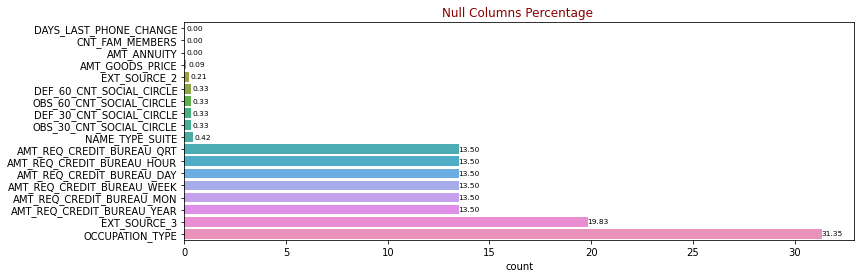

In [11]:
#Verifying Missing values after drop

plt.figure(figsize= (12,4))
df = round(100 * app_data.isnull().sum().to_frame("count").query('count>0')/len(app_data),4).sort_values(by= 'count', ascending=True)
p1 = sns.barplot(y= df.index, x =df["count"])
for p in p1.patches:
    plt.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width()+0.5 , p.get_y()+p.get_height()),size =7.5 ,ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')
plt.title("Null Columns Percentage ", color ="darkred")

plt.show()

## <span style='color:darkblue'> Task 2: Data Cleansing </span>

### <p> <span style="color : darkred"> <i> Subtask 2.1 Handling Missing Values </i> </span>

In [12]:
printCyan("Information of Application Frame columns datatype :")
app_data[df.index].dtypes

  Information of Application Frame columns datatype :


DAYS_LAST_PHONE_CHANGE        float64
CNT_FAM_MEMBERS               float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
EXT_SOURCE_2                  float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
NAME_TYPE_SUITE                object
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
EXT_SOURCE_3                  float64
OCCUPATION_TYPE                object
dtype: object

##### <p> <span style="color : purple"> Replacing Nulls in Categorical columns </span></p>

##### <p> <span style="color : purple"> <i> NAME_TYPE_SUITE </i></span> </p>

In [13]:
printCyan("Null count : {}".format(app_data["NAME_TYPE_SUITE"].isnull().sum()))

  Null count : 1292


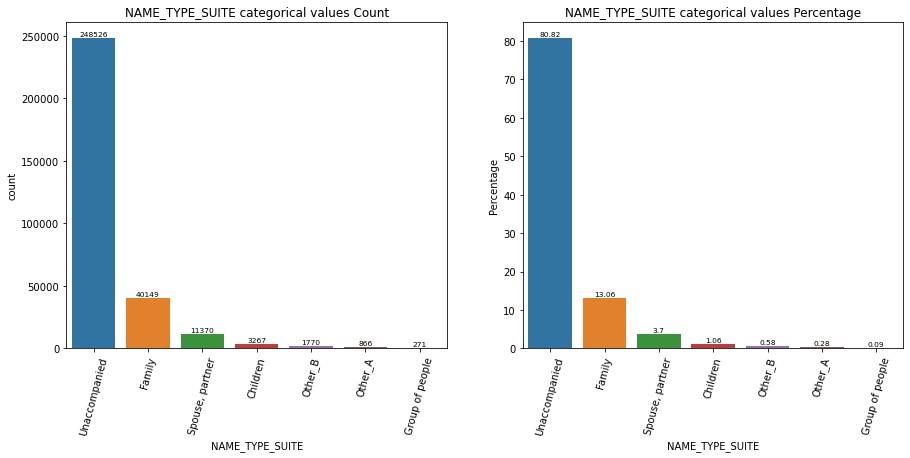

In [14]:
#Function to print barcharts with Count and Percentage
def catcountandperc(i):
    plt.figure(figsize= (15,6))
    plt.subplot(1,2,1)

    p1 = sns.countplot(x = i,data = app_data,order = app_data[i].value_counts().index)

    for p in p1.patches:
        plt.annotate(f'{p.get_height():0}', (p.get_x() + p.get_width() / 2., p.get_height()),size =7.5 ,ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
    #app_data[i].value_counts().plot.bar(color ="purple")

    plt.xticks(rotation=75)
    plt.title(i+" categorical values Count")
    plt.subplot(1,2,2)
    df = round(100*app_data[i].value_counts()/len(app_data),2).to_frame("Percentage").rename_axis(i)
    p1 = sns.barplot(x = df.index, y = "Percentage",data = df)

    for p in p1.patches:
        plt.annotate(f'{p.get_height():0}', (p.get_x() + p.get_width() / 2., p.get_height()),size =7.5 ,ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

    #round(100*app_data[i].value_counts()/len(app_data),2).plot.bar()
    plt.xticks(rotation=75)
    plt.title(i+" categorical values Percentage")

    plt.show()
    
catcountandperc("NAME_TYPE_SUITE")

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
Here the Null count in the Column is significantly lesser so we shall replace values with the mode of distribution.</b></span>

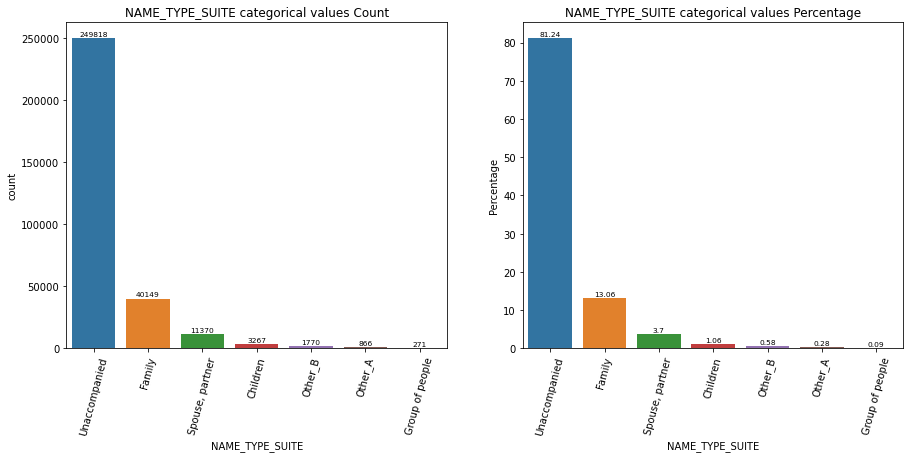

In [15]:
app_data.loc[app_data["NAME_TYPE_SUITE"].isnull(),"NAME_TYPE_SUITE"] =app_data["NAME_TYPE_SUITE"].mode()[0]

### Graph after Replacement of Null values
catcountandperc("NAME_TYPE_SUITE")

##### <p> <span style="color : purple"> <i>Occupation Type </i></span></p>

In [16]:
printCyan("Null count : {}".format(app_data["OCCUPATION_TYPE"].isnull().sum()))

  Null count : 96391


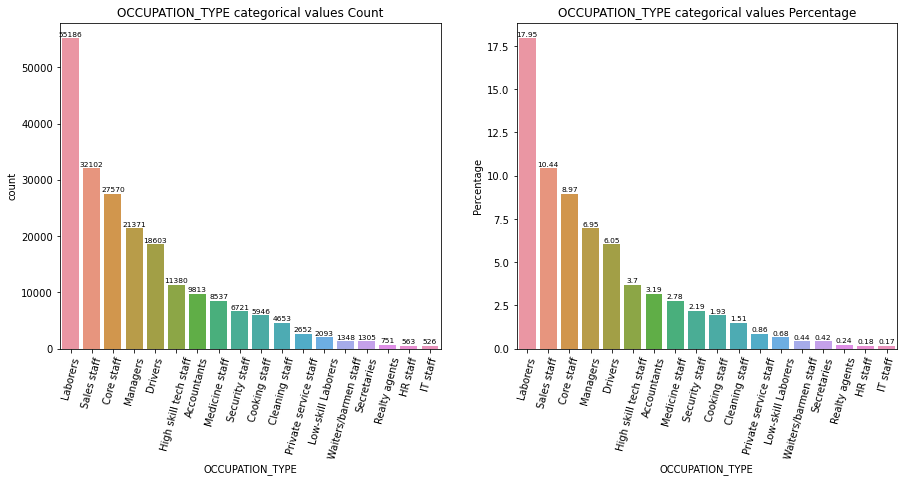

In [17]:
# Function to plot Count and Percentage of categories in Occupation Type column
catcountandperc("OCCUPATION_TYPE")

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
Here the Null count in the Column is significantly higher than mode of distribution, to avoid skewedness and imbalance dataset within categories we shall create new category currently as "Unknown" </b></span>

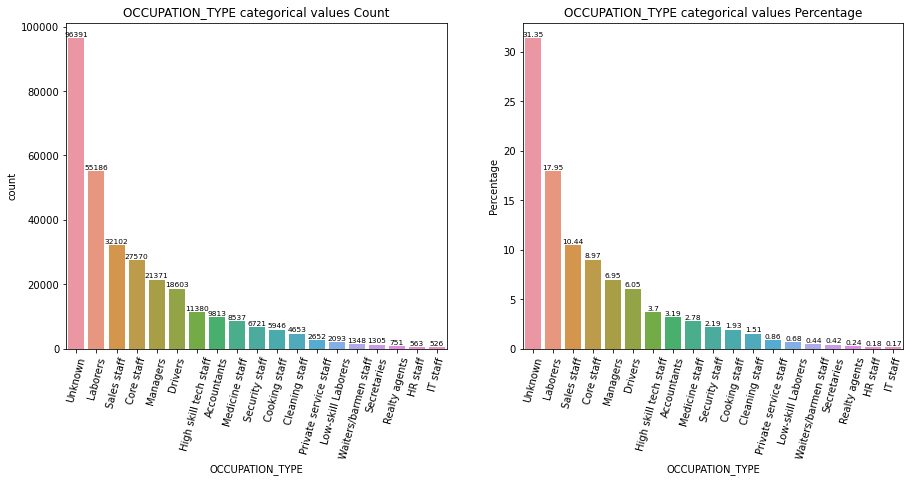

In [18]:
app_data.loc[app_data["OCCUPATION_TYPE"].isnull(),"OCCUPATION_TYPE"] ="Unknown"

## Graph after null replacement
catcountandperc("OCCUPATION_TYPE")


##### <p> <span style="color : purple"> <i> Replacing Nulls in Numerical columns </i> </span></p>

In [19]:
# Understanding Numerical Columns Uniueq values count
numcols = app_data[app_data.isnull().sum().to_frame("count").query('count>0').index].select_dtypes(exclude= 'object').columns
app_data[numcols].nunique()

AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
CNT_FAM_MEMBERS                   17
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
DAYS_LAST_PHONE_CHANGE          3773
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
dtype: int64

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b> 
As the columns distribution seems to be continuous we shall plot Box, Dist to understand skewedness of data. </b></span>

In [20]:
# Function to analyze columns distribution for Null replacement through BOx plot and Distplot

def numboxdist(i):
    
    fig = plt.figure(figsize=(15,4))
    fig.suptitle("Distribution Analysis of "+i, fontsize=10)   
    plt.subplot(1,2,1)
    sns.boxplot(x = app_data[i],notch = True )
    plt.subplot(1,2,2)
    p1 = sns.distplot( app_data[i] )

    plt.show()

def wholenumchk(i):
    flag = 0
    for x in app_data[i].value_counts().index:
        if x.is_integer():
            continue
        else:
            flag = 1
            break
    return flag


def NumericalDistr(i, plot):
    nullcount = app_data[i].isnull().sum()
   
    w = wholenumchk(i)
    if plot ==1:
        print("--"*120)
        numboxdist(i)
        
    meanv = app_data[i].mean()
    medianv = app_data[i].median()
    s = skew(app_data[i], bias= False,nan_policy='omit')
    k = kurtosis(app_data[i], bias=False,nan_policy='omit')
    dfnum.loc[len(dfnum.index)] = [i,nullcount,meanv, medianv, w,s,k]
    

    

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


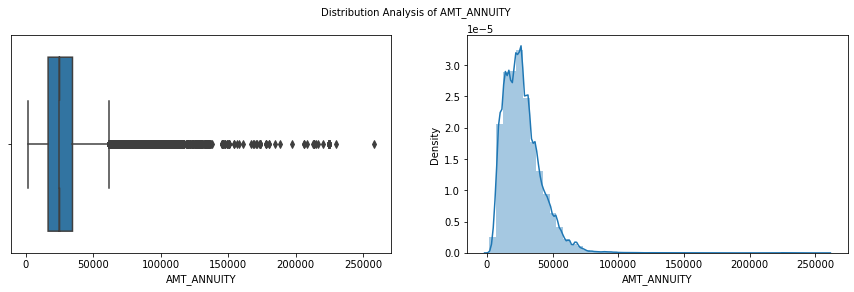

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


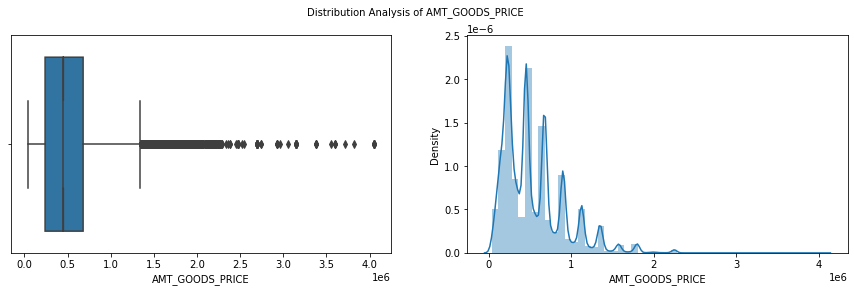

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


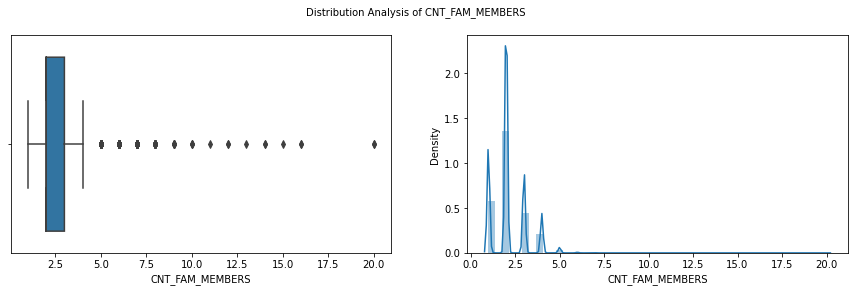

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


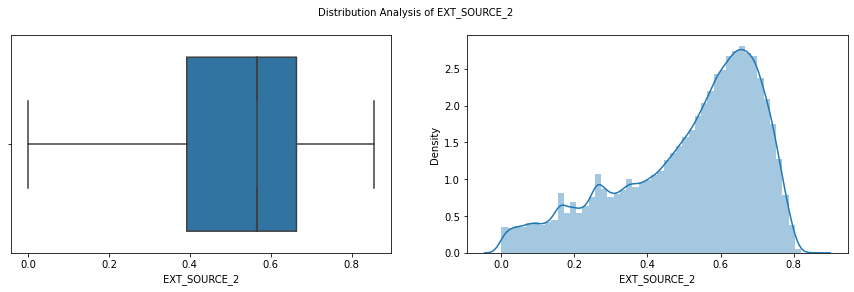

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


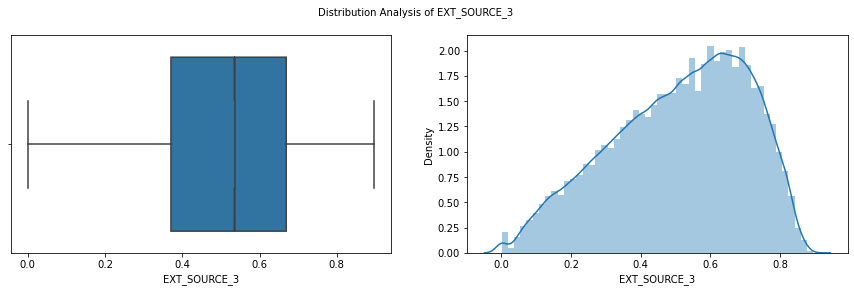

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


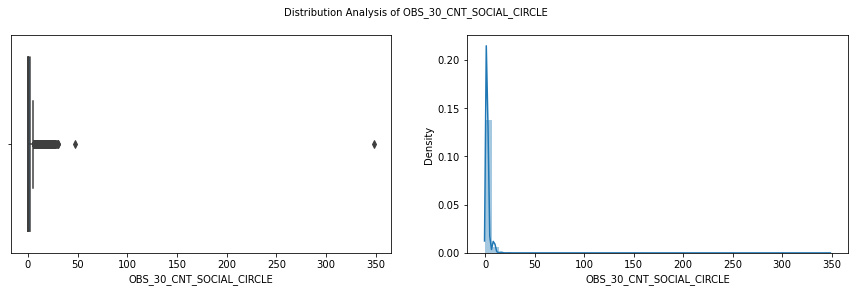

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


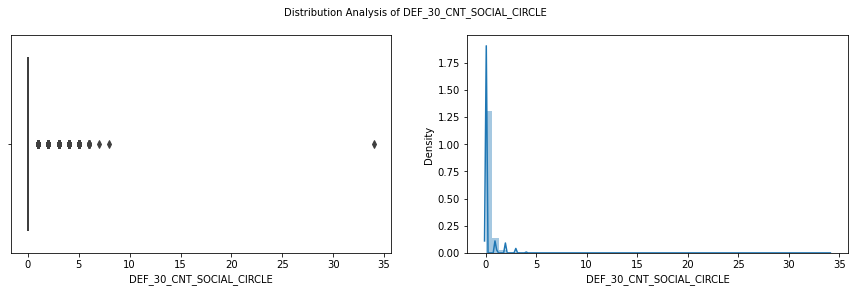

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


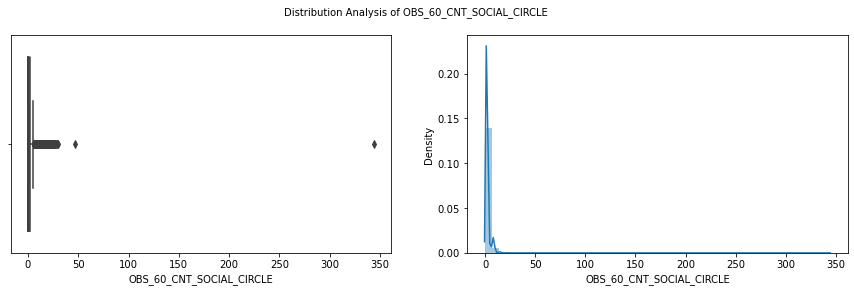

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


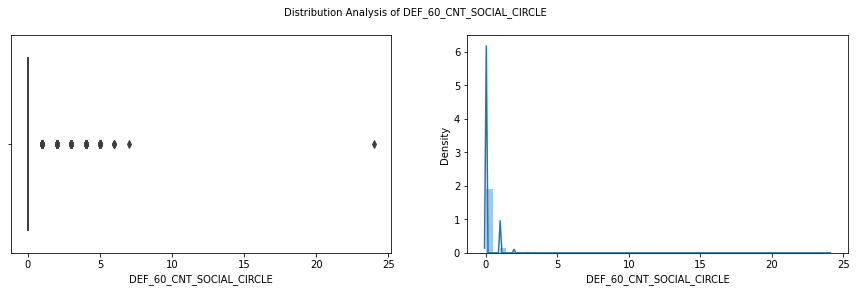

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


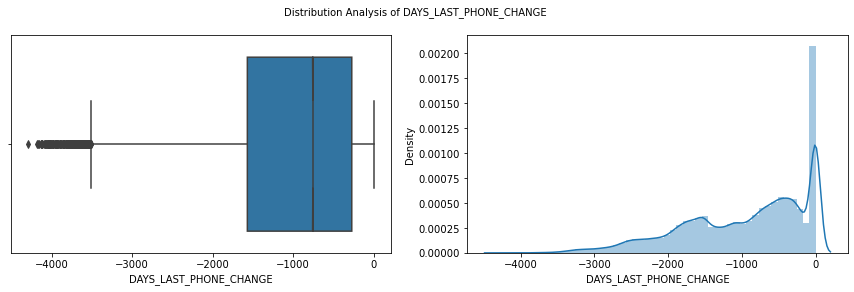

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


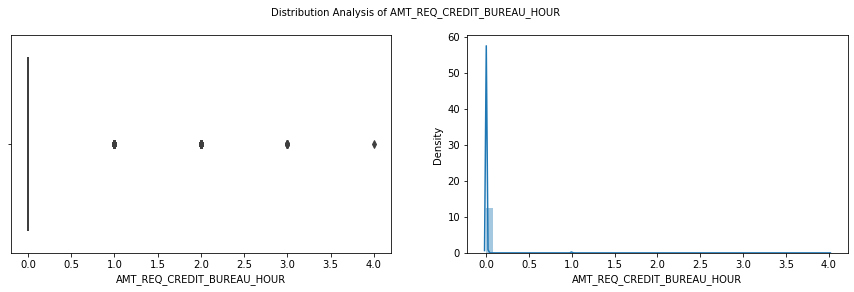

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


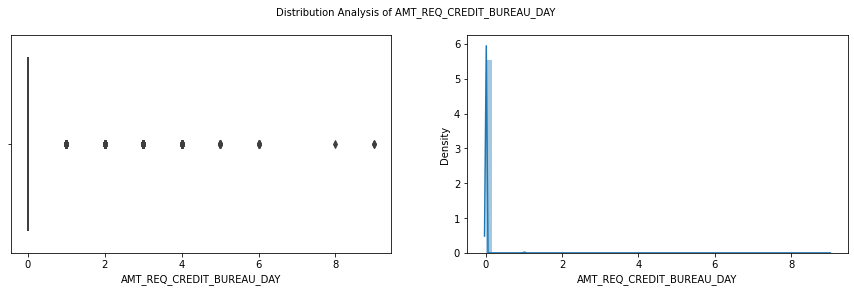

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


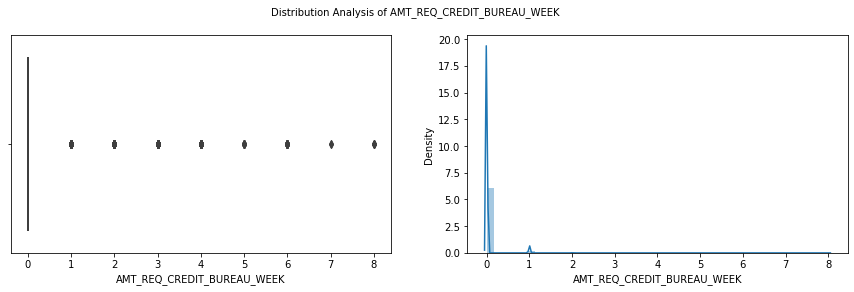

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


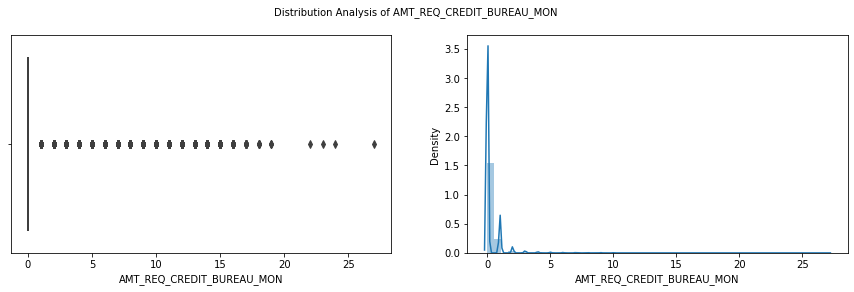

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


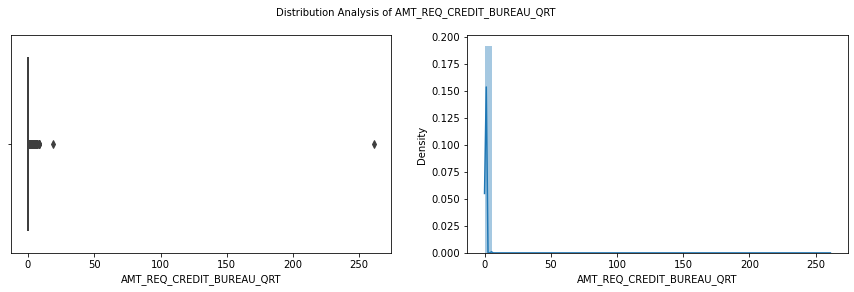

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


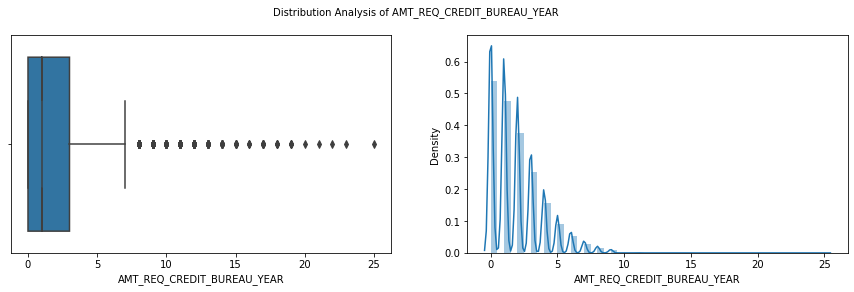

In [21]:

dfnum = pd.DataFrame(columns=("columnname","Nullcount","Mean","Median","wholchk","skew","kurtosis"))
for i in numcols:
    NumericalDistr(i,1)

In [22]:
printCyan("Null Columns Distribution Details")
dfnum

  Null Columns Distribution Details


,columnname,Nullcount,Mean,Median,wholchk,skew,kurtosis
0,AMT_ANNUITY,12,27108.573909,24903.000000,1,1.5797773638612504,7.707320
1,AMT_GOODS_PRICE,278,538396.207429,450000.000000,1,1.3490003414747445,2.431916
2,CNT_FAM_MEMBERS,2,2.152665,2.000000,0,0.9875428137192185,2.801977
3,EXT_SOURCE_2,660,0.514393,0.565961,1,-0.7935760449636996,-0.269131
4,EXT_SOURCE_3,60965,0.510853,0.535276,1,-0.4093904596160266,-0.663463
5,OBS_30_CNT_SOCIAL_CIRCLE,1021,1.422245,0.000000,0,12.139597764869439,1424.815552
6,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.143421,0.000000,0,5.183517952420263,126.312445
7,OBS_60_CNT_SOCIAL_CIRCLE,1021,1.405292,0.000000,0,12.070828697697412,1409.704557
8,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.100049,0.000000,0,5.27787829269804,86.562856
9,DAYS_LAST_PHONE_CHANGE,1,-962.858788,-757.000000,0,-0.7136056678591625,-0.308580


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
<ol> 
    <li>From graphs and stats(dfnum) values, AMT_ANNUITY, AMT_GOODS_PRICE graphs tend to be left skewed so better we take median to replace Null values. </li>
    <li>CNT_FAM_MEMBERS tend to be right skewed, we shall take median.</li>
    
<li> EXT_SOURCE_2/3 and DAYS_LAST_PHONE_CHANGE have right skewed distribution so we shall consider median. </li>
    <li> AMT and Social Circle columns shows left skewed therefore we shall consider median. </li></ol>
    </b></span>


In [24]:
# Replacing Null values in above numerical columsn with respective to median

for i in numcols:
    app_data.loc[app_data[i].isnull(),i] = app_data[i].median()


In [25]:
dfnum = pd.DataFrame(columns=("columnname","Nullcount","Mean","Median","wholchk","skew","kurtosis"))
#app_data.isnull().sum().to_frame("count").query("count>0")
for i in numcols:
    NumericalDistr(i,0)
printCyan("Null Columns Details after Treatment")
dfnum


  Null Columns Details after Treatment


,columnname,Nullcount,Mean,Median,wholchk,skew,kurtosis
0,AMT_ANNUITY,0,27108.487841,24903.000000,1,1.579824,7.707756
1,AMT_GOODS_PRICE,0,538316.294367,450000.000000,1,1.350143,2.437440
2,CNT_FAM_MEMBERS,0,2.152664,2.000000,0,0.987549,2.802017
3,EXT_SOURCE_2,0,0.514503,0.565961,1,-0.795940,-0.262257
4,EXT_SOURCE_3,0,0.515695,0.535276,1,-0.537697,-0.048692
5,OBS_30_CNT_SOCIAL_CIRCLE,0,1.417523,0.000000,0,12.143796,1426.335795
6,DEF_30_CNT_SOCIAL_CIRCLE,0,0.142944,0.000000,0,5.192572,126.676648
7,OBS_60_CNT_SOCIAL_CIRCLE,0,1.400626,0.000000,0,12.075153,1411.229416
8,DEF_60_CNT_SOCIAL_CIRCLE,0,0.099717,0.000000,0,5.287339,86.835155
9,DAYS_LAST_PHONE_CHANGE,0,-962.858119,-757.000000,0,-0.713609,-0.308570


### <p> <span style="color : darkred"> <i> Subtask 2.2 Verifying Duplicate records </i></span></p>


In [26]:
printCyan("Duplicate Records count in Application Dataframe : {}".format(len(app_data[app_data.duplicated()])))
# zero records

  Duplicate Records count in Application Dataframe : 0


### <p> <span style="color : darkred"> <i> Subtask 2.3 Data Types Validation </i></span></p>

In [27]:
app_data.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

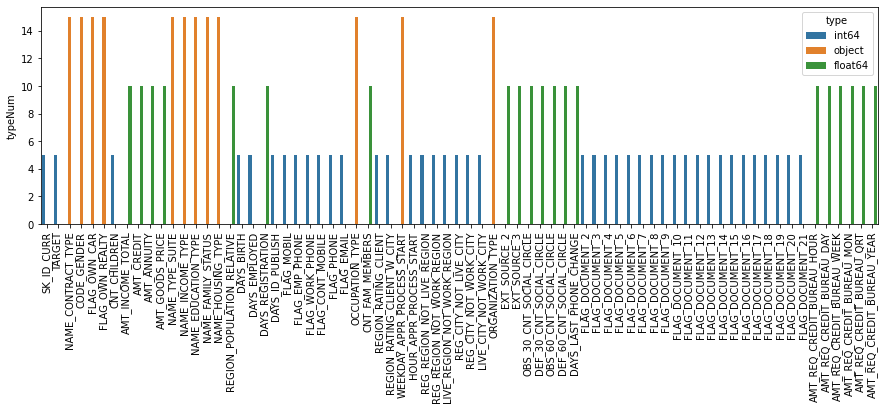

In [28]:
# Function to plot columns datatypes in graph
df = app_data.dtypes.to_frame("type")
plt.figure(figsize=(15,4))
def encode(x):
    if(x == 'int64'):
        return 5
    elif(x == 'float64'):
        return 10
    elif(x=='object'):
        return 15
    else:
        return 0
    
df["typeNum"] = df["type"].apply(lambda x : encode(x))
sns.barplot(x= df.index, y = df["typeNum"], hue=df["type"])
plt.xticks(rotation = 90)
plt.show()

In [29]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Columns specific to Flag are found to be discrete numerical values as 0/1 pairs to N/Y, but FLAG_OWN_CAR, FLAG_OWN_REALTY tends to follow N/Y only so let us change to type to discrete numerical
2. Columns specific to Days present in Integer as these are whole values summarising count of days, except DAYS_REGISTRATION ,DAYS_LAST_PHONE_CHANGE whihc exist in float.
3. CNT_FAM_MEMBERS Column found to be in float though it is set of whole values defining count of family members.
    4. Days column are in negative which to be modified by absolute representation of them. </b></span>

In [30]:
def encoder(x):
    if x.lower() == 'y':
        return 1
    else:
        return 0


In [31]:
flgcols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Function to convert object type to discrete numbers

def catconversion(i):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    col1 = app_data[i].value_counts().index
    col2 = app_data[i].value_counts().values
    p1 = sns.barplot(y= col1,x = col2,orient ='h', palette="viridis",order = app_data[i].value_counts().index)
    for p in p1.patches:
        plt.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width()+10 , p.get_y()+p.get_height()),size =10 ,ha = 'center', va = 'center', xytext = (5,20), textcoords = 'offset points')
    plt.title(i+" before Data Type update")
    
    app_data[i] = app_data[i].apply(lambda x: encoder(x))
    
    plt.subplot(1,2,2)
    col1 = app_data[i].value_counts().index
    col2 = app_data[i].value_counts().values
    p1 = sns.barplot(y= col1,x = col2,orient ='h', palette="coolwarm",order = app_data[i].value_counts().index)
    for p in p1.patches:
        plt.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width()+10 , p.get_y()+p.get_height()),size =10 ,ha = 'center', va = 'center', xytext = (5,20), textcoords = 'offset points')
    plt.title(i+" after Data Type update")
    
    plt.show()
    


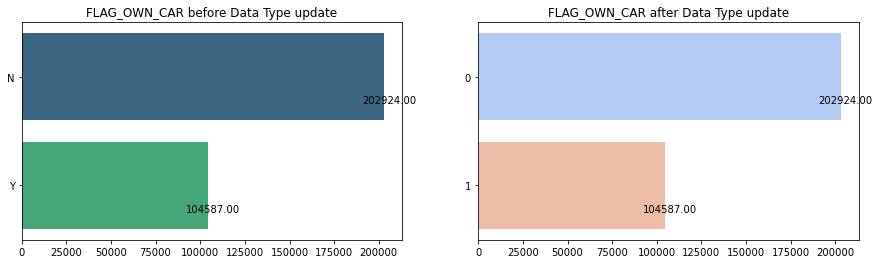

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


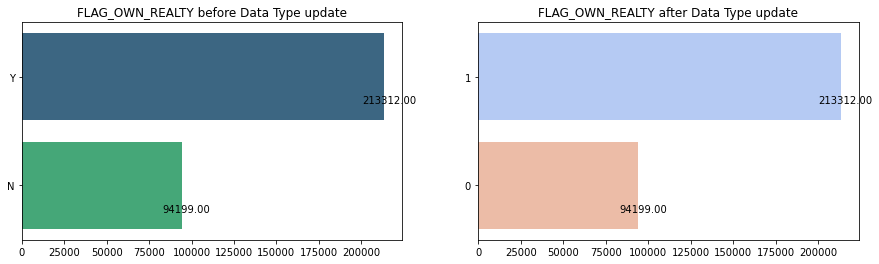

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [32]:
for i in flgcols:  
    catconversion(i)
    print("--"*120)

In [33]:
# converting cnt family members to int
floatint= ['DAYS_REGISTRATION' ,'DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS']
for i in floatint:
    app_data[i]= app_data[i].astype("int64")

In [34]:
app_data[floatint].head()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS
0,-3648,-1134,1
1,-1186,-828,2
2,-4260,-815,1
3,-9833,-617,2
4,-4311,-1106,1


In [35]:
#  Changing Days Column values to Absolute values

dayscols= [x for x in app_data.columns if 'DAYS' in x]
for col in dayscols:
    app_data[col] = abs(app_data[col])

In [36]:
app_data[dayscols].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648,2120,1134
1,16765,1188,1186,291,828
2,19046,225,4260,2531,815
3,19005,3039,9833,2437,617
4,19932,3038,4311,3458,1106


In [90]:

extcols = [x for x in app_data.columns if 'EXT' in x]
extcols
print(app_data[extcols].head())
# conversion of External Source columnss to 2 decimals
app_data[extcols] = round(app_data[extcols],2)
app_data[extcols].head()

   EXT_SOURCE_2  EXT_SOURCE_3
0          0.26          0.14
1          0.62          0.54
2          0.56          0.73
3          0.65          0.54
4          0.32          0.54


,EXT_SOURCE_2,EXT_SOURCE_3
0,0.26,0.14
1,0.62,0.54
2,0.56,0.73
3,0.65,0.54
4,0.32,0.54


### <p> <span style="color : darkred"> <i> Subtask 2.4 Outlier Ananalysis </i></span></p>

#####  <span style="color : darkred"> <i> Ananlysis on Numerical Columns </i></span>

In [37]:
# Retrieving Numerical columns Details

numcols = list(app_data.select_dtypes(exclude= 'object').columns)
l =  ['SK_ID_CURR','TARGET']
numcols = [x for x in numcols if x not in l]
numcols = list(app_data[numcols].nunique().to_frame('count').query('count>10').index ) # Excluding Numerical discrete variables
numcols


['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [38]:
#Function retreives outlier analysis data in outlierframe

outlierframe = pd.DataFrame(columns=("columnname","max","mean","median","std", "Outcnt","Outperc","Outcnt2","Outperc2","Outcnt3","Outperc3","skew","kurtosis"))

def outlieranalysis(i):
    quant25,quant75 = np.percentile(sorted(app_data[i]) , [25,75])
    Iqr = quant75 - quant25
    bound = Iqr * 1.5
    
    me = app_data[i].mean()
    med = app_data[i].median()
    ma = app_data[i].max()
    st = app_data[i].std()
    
    lowerb, upperb = quant25 - bound, quant75 + bound
    outierscnt = len(app_data[(app_data[i] < lowerb) | (app_data[i] > upperb)])
    outiersperc  =  (100*(outierscnt/len(app_data)))
    
    bound = Iqr * 1.5*2
    lowerb, upperb = quant25 - bound, quant75 + bound
    outierscnt2 = len(app_data[(app_data[i] < lowerb) | (app_data[i] > upperb)])
    outiersperc2  =  (100*(outierscnt2/len(app_data)))
    
    bound = Iqr * 1.5*3
    lowerb, upperb = quant25 - bound, quant75 + bound
    outierscnt3 = len(app_data[(app_data[i] < lowerb) | (app_data[i] > upperb)])
    outiersperc3  =  (100*(outierscnt3/len(app_data)))
    
    
    s = skew(app_data[i], bias= False,nan_policy='omit')
    k = kurtosis(app_data[i], bias=False,nan_policy='omit')
    outlierframe.loc[len(outlierframe.index)] = [i,ma,me,med,st,outierscnt,outiersperc,outierscnt2,outiersperc2,outierscnt3,outiersperc3,s,k]
   

In [39]:
for i in numcols:
    outlieranalysis(i)
outlierframe

,columnname,max,mean,median,std,Outcnt,Outperc,Outcnt2,Outperc2,Outcnt3,Outperc3,skew,kurtosis
0,CNT_CHILDREN,19,0.417052,0.000000,0.722121,4272,1.389219,126,0.040974,42,0.013658,1.974604,7.904106
1,AMT_INCOME_TOTAL,117000000.0,168797.919297,147150.000000,237123.146279,14035,4.564064,3014,0.980128,1579,0.513478,391.559654,191786.554381
2,AMT_CREDIT,4050000.0,599025.999706,513531.000000,402490.776996,6562,2.133907,444,0.144385,20,0.006504,1.234778,1.934041
3,AMT_ANNUITY,258025.5,27108.487841,24903.000000,14493.461065,7504,2.440238,1024,0.332996,218,0.070892,1.579824,7.707756
4,AMT_GOODS_PRICE,4050000.0,538316.294367,450000.000000,369288.982246,14728,4.789422,1090,0.354459,53,0.017235,1.350143,2.437440
5,REGION_POPULATION_RELATIVE,0.072508,0.020868,0.018850,0.013831,8412,2.735512,0,0.000000,0,0.000000,1.488009,3.260065
6,DAYS_BIRTH,25229,16036.995067,15750.000000,4363.988632,0,0.000000,0,0.000000,0,0.000000,0.115673,-1.049126
7,DAYS_EMPLOYED,365243,67724.742149,2219.000000,139443.751806,56357,18.326824,55374,18.007161,55374,18.007161,1.664338,0.771547
8,DAYS_REGISTRATION,24672,4986.120327,4504.000000,3522.886321,659,0.214301,1,0.000325,0,0.000000,0.590872,-0.321347
9,DAYS_ID_PUBLISH,7197,2994.202373,3254.000000,1509.450419,0,0.000000,0,0.000000,0,0.000000,-0.349327,-1.106808


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

Let us avoid columns specific to CNT, AMT, Ext source, Days as these are to be analysed further before actioning on items.

Also Skew(must be between -1 and 1) and k factor/whisker width multipled of 2, 3 defines extreme values/outliers.These columns contain high outlierpercent at 3 std and high skew value, either due to data issue or junk, therefore we shall drop the columns to avoid further analysis
    </b></span>

In [40]:
# droping columns 

colsdrop = list(outlierframe[(outlierframe["skew"]>1) & (outlierframe["Outperc3"]>1  )].columnname)
colsdrop =  [x for x in colsdrop if 'DAYS' not in x]
printCyan("Shape of Datframe after Drop: {}".format(app_data.shape))
app_data.drop(colsdrop, axis=1, inplace = True)
printCyan("Columns Dropped due to High Skew and Extreme Outlier Percentage : {}".format(colsdrop))
printCyan("Shape of Datframe after Drop: {}".format(app_data.shape))

  Shape of Datframe after Drop: (307511, 73)
  Columns Dropped due to High Skew and Extreme Outlier Percentage : ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']
  Shape of Datframe after Drop: (307511, 71)


In [41]:
# Analysis of outliers in CNT_CHILDREN , count greater than 10

print(app_data.loc[app_data['CNT_CHILDREN']>10,["CNT_CHILDREN","CNT_FAM_MEMBERS"]].value_counts())
#app_data[app_data['CNT_CHILDREN']== 0]
printCyan("Percentage of children count greater than 10 : {}".format(100* (len(app_data[app_data['CNT_CHILDREN']>10])/len(app_data))))

#As percentage is less 0.002 we have dropped the columns

app_data= app_data[~(app_data['CNT_CHILDREN']>10)]
printCyan("Shape of Datframe after Drop: {}".format(app_data.shape))

CNT_CHILDREN  CNT_FAM_MEMBERS
12            14                 2
14            16                 2
19            20                 2
11            13                 1
14            15                 1
dtype: int64
  Percentage of children count greater than 10 : 0.0026015329532927275
  Shape of Datframe after Drop: (307503, 71)


In [44]:
# Analysis of outliers in CNT_FAM_MEMBERS , count greater than 10

app_data[["CNT_FAM_MEMBERS","CNT_CHILDREN"]].value_counts()

print(app_data.loc[app_data['CNT_FAM_MEMBERS']>10,["CNT_CHILDREN","CNT_FAM_MEMBERS"]].value_counts())
#app_data[app_data['CNT_CHILDREN']== 0]
printCyan("Percentage of children count greater than 10 : {}".format(100* (len(app_data[app_data['CNT_FAM_MEMBERS']>10])/len(app_data))))

#As percentage is less near to 0 we have dropped the columns

app_data= app_data[~(app_data['CNT_FAM_MEMBERS']>10)]
printCyan("Shape of Datframe after Drop: {}".format(app_data.shape))

Series([], dtype: int64)
  Percentage of children count greater than 10 : 0.0
  Shape of Datframe after Drop: (307500, 71)


In [48]:
# Retreving columns of Extreme outliers with outlier k factor of 3 percentage more than 1

outlierframe = pd.DataFrame(columns=("columnname","max","mean","median","std", "Outcnt","Outperc","Outcnt2","Outperc2","Outcnt3","Outperc3","skew","kurtosis"))
numcols = [x for x in numcols if x not in ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']]

for i in numcols:
    outlieranalysis(i)
    
outlierframe[outlierframe.Outcnt3>1]

numcols = [x for x in outlierframe[outlierframe.Outcnt3>1]["columnname"] if ('CNT' not in x) & ('DAYS' not in x)]
numcols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [49]:
app_data[numcols].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075000e+05,3.075000e+05,307500.000000,3.075000e+05,307500.000000
mean,1.687980e+05,5.990292e+05,27108.561717,5.383192e+05,1.778472
std,2.371266e+05,4.024921e+05,14493.329473,3.692905e+05,1.765541
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,1.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25.000000


3014  extreme outliers removed from Column  AMT_INCOME_TOTAL


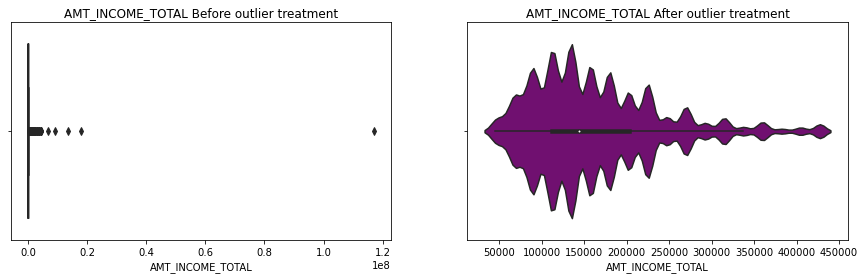

366  extreme outliers removed from Column  AMT_CREDIT


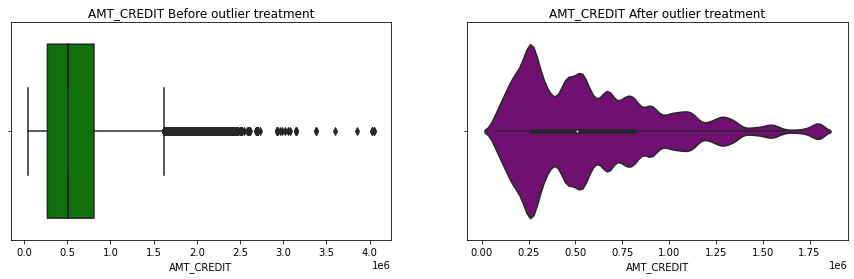

831  extreme outliers removed from Column  AMT_ANNUITY


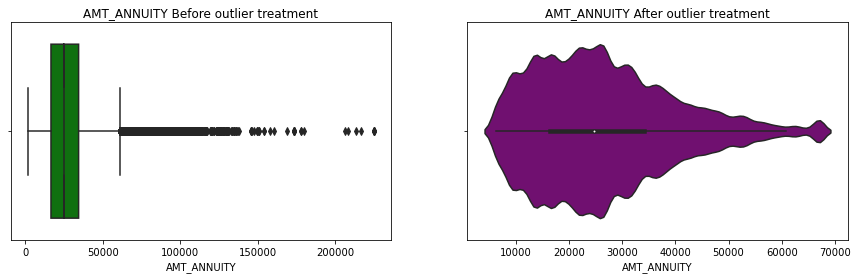

446  extreme outliers removed from Column  AMT_GOODS_PRICE


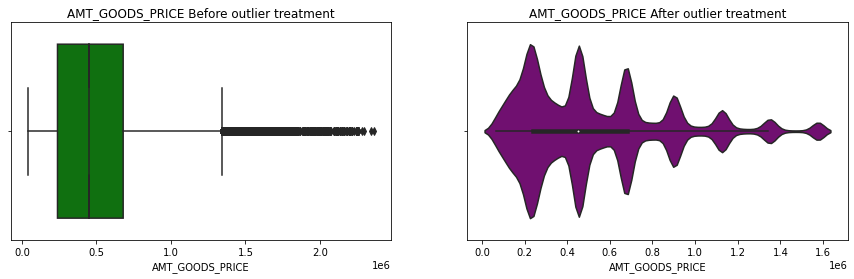

140  extreme outliers removed from Column  AMT_REQ_CREDIT_BUREAU_YEAR


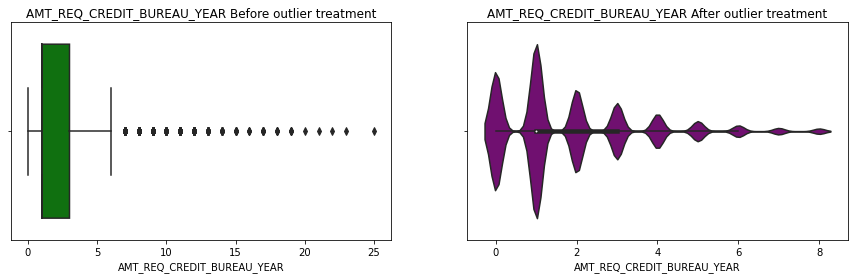

In [50]:
#From above we could see AMT and OBS columns excluding cnt and days , contain extreme outliers/far outs with less percentage ,so let us remove these records as this might effect our analysis


for i in numcols:
    fig = plt.figure(figsize=(15,4))  
    plt.subplot(1,2,1)
    #print(df)
    sns.boxplot(x = app_data[i], notch = True,color ="green"  )
    plt.title(i+" Before outlier treatment")  
    
    #Dropping records iwth extrem outliers from k factor 2
    quant25,quant75 = np.percentile(sorted(app_data[i]) , [25,75])
    Iqr = quant75 - quant25    
    bound = Iqr *1.5*2
    lowerb, upperb = quant25 - bound, quant75 + bound
    length = len(app_data[((app_data[i] < lowerb) | (app_data[i] > upperb))])
    
    print(length, " extreme outliers removed from Column ",i)
    
    #capping and flooring other outliers to avoid highdeviation in data, so we replace extreme left outliers less than 1percentile with 1% value, similarly values extrem on right to 99% percentle with 99% value
    app_data = app_data[~((app_data[i] < lowerb) | (app_data[i] > upperb))]
    
    lowerb = app_data[i].quantile(0.01)
    upperb = app_data[i].quantile(0.99)
    
    #val = wholenumchk(i)
    
    #if val:
    app_data[i].clip(lower = round(lowerb,0), upper =round(upperb,0), axis =0, inplace =True)
    #print()
    

    plt.subplot(1,2,2)
    df = app_data[i]
    sns.violinplot(x = df,notch = True, color="purple" )
    
    plt.title(i+" After outlier treatment")  
    
    
    plt.show()


In [53]:
# Verfung outliers post outlier treatment
outlierframe = pd.DataFrame(columns=("columnname","max","mean","median","std", "Outcnt","Outperc","Outcnt2","Outperc2","Outcnt3","Outperc3","skew","kurtosis"))

#numcols = [x for x in numcols if x not in ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']]
for i in numcols:
    outlieranalysis(i)
outlierframe

,columnname,max,mean,median,std,Outcnt,Outperc,Outcnt2,Outperc2,Outcnt3,Outperc3,skew,kurtosis
0,AMT_INCOME_TOTAL,427500.0,162079.140539,144000.0,76120.391723,10437,3.447934,0,0.0,0,0.0,1.121440,1.292512
1,AMT_CREDIT,1800000.0,585999.982572,508495.5,379494.719690,4963,1.639561,0,0.0,0,0.0,0.981858,0.496255
2,AMT_ANNUITY,67046.0,26508.079761,24705.0,13104.403608,5691,1.880061,0,0.0,0,0.0,0.774401,0.293122
3,AMT_GOODS_PRICE,1579500.0,524801.137932,450000.0,343298.144040,12633,4.173398,0,0.0,0,0.0,1.025005,0.554120
4,AMT_REQ_CREDIT_BUREAU_YEAR,8.0,1.774218,1.0,1.735530,7020,2.319105,0,0.0,0,0.0,1.315599,1.529797


#####  <span style="color : darkred"> <i>   Normalisation/binning of columns </i> </span>


In [54]:
amtcols = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]

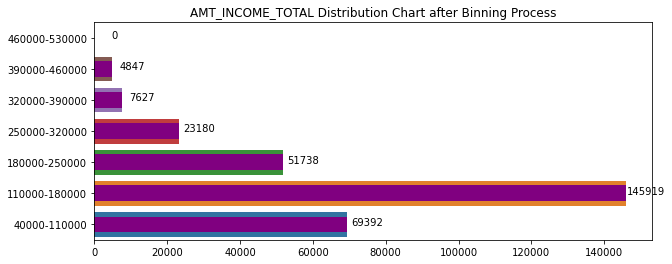

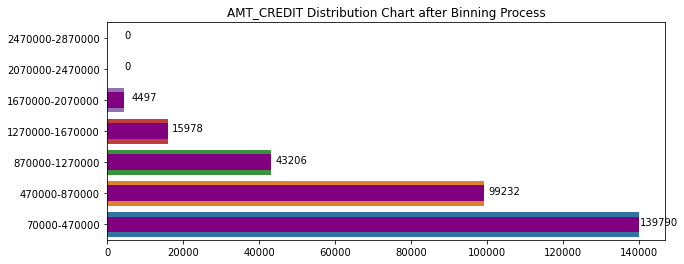

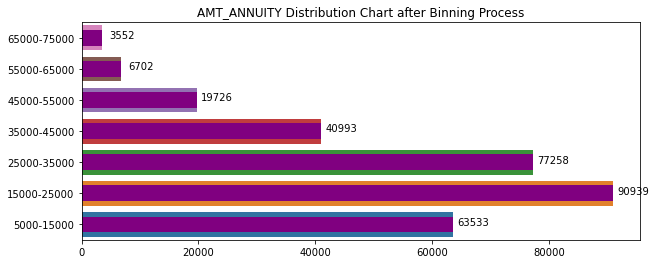

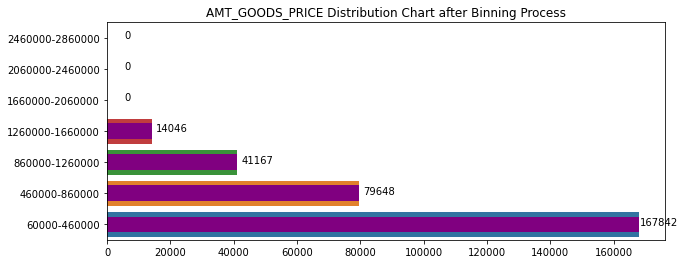

In [55]:
#Bining AMount counts by Equal Distance

for i in amtcols:
    plt.figure(figsize=(10,4))

    #plt.subplot(4,2,j)
    min_len = app_data[i].min()
    max_len = app_data[i].max()
    val = 10**((len(str(round(min_len)))-1))
    min_len = val*round((min_len/val ) -1 )
    val = 10**((len(str(round(max_len)))-1))
    max_len = val*round((max_len/val )+1)
    #print(min_len, max_len)
    quantity = 8
    width = ((min_len+ max_len)/quantity)
    val= 10**((len(str(round(width)))-1))
    width = val*round((width/val))
    
    bins =[]
    lables = []
    for low in range(min_len,min_len + quantity*width, width):
        bins.append(low)
    labels = [f'{i:d}-{j:d}' for i, j in zip(bins[:-1], bins[1:])]
        
    #print(labels)
    app_data[i+"_BIN"] = pd.cut(app_data[i], bins = bins,labels = labels , include_lowest = True, precision= 0)
    col1 = app_data[i+"_BIN"].value_counts().index
    col2 =app_data[i+"_BIN"].value_counts().values
    p1 = sns.barplot(y = col1, x= col2, order= app_data[i+"_BIN"].value_counts().sort_index().index, orient ="h")
    
    for p in p1.patches:
        plt.annotate("%d" % p.get_width(), (p.get_x() + p.get_width() , p.get_y()+p.get_height()),size =10 ,ha = 'center', va = 'center', xytext = (20,-10), textcoords = 'offset points')
    app_data[i+"_BIN"].value_counts().sort_index().plot.barh(color ="purple")
    plt.title(i+" Distribution Chart after Binning Process")
    
    plt.show()                

In [56]:
printCyan("Shape of Datframe after Binning: {}".format(app_data.shape))

  Shape of Datframe after Binning: (302703, 75)


In [57]:
numcols = [x for x in app_data.columns if 'AMT' in x]
app_data[numcols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AMT_ANNUITY_BIN,AMT_GOODS_PRICE_BIN
0,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,1.0,180000-250000,70000-470000,15000-25000,60000-460000
1,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,250000-320000,1270000-1670000,35000-45000,860000-1260000
2,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,40000-110000,70000-470000,5000-15000,60000-460000
3,135000.0,312682.5,29686.5,297000.0,0.0,0.0,0.0,1.0,110000-180000,70000-470000,25000-35000,60000-460000
4,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,110000-180000,470000-870000,15000-25000,460000-860000
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.0,0.0,0.0,1.0,110000-180000,70000-470000,25000-35000,60000-460000
307507,72000.0,269550.0,12001.5,225000.0,0.0,0.0,0.0,1.0,40000-110000,70000-470000,5000-15000,60000-460000
307508,153000.0,677664.0,29979.0,585000.0,1.0,0.0,0.0,1.0,110000-180000,470000-870000,25000-35000,460000-860000
307509,171000.0,370107.0,20205.0,319500.0,0.0,0.0,0.0,0.0,110000-180000,70000-470000,15000-25000,60000-460000


In [58]:
#Outlier Analysis on Days columns
dayscols= [x for x in app_data.columns if ('DAYS' in x) & ('BIN' not in x)]
dayscols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

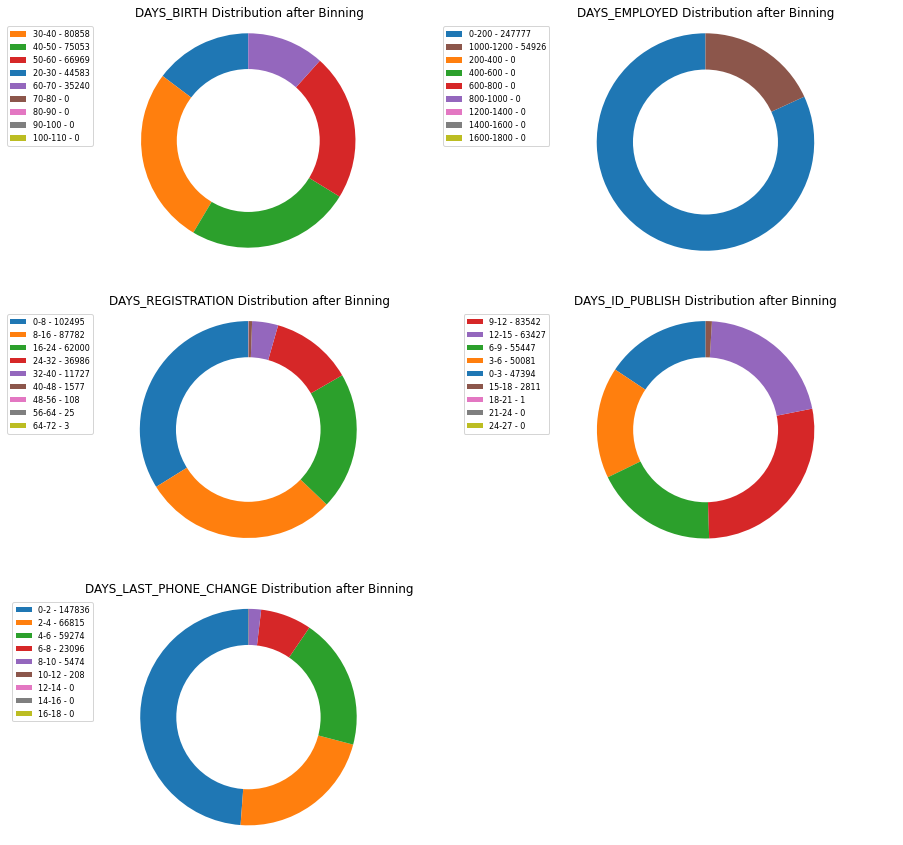

In [59]:
j=1
plt.figure(figsize=(15,15))
for i in dayscols:
    plt.subplot(3,2,j)
    df = app_data[i]/365
        #plt.subplot(4,2,j)
    min_len = df.min()
    max_len = df.max()

   # print(min_len, max_len)
    val = 10**((len(str(round(min_len)))-1))
    min_len = val*round((min_len/val ) )
    val = 10**((len(str(round(max_len)))-1))
    max_len = val*round((max_len/val )+1)
    #print(min_len, max_len)
    quantity = 10
    width = ((min_len+ max_len)/quantity)
    val= 10**((len(str(round(width)))-1))
    width = val*round((width/val))
    bins =[]
    for low in range(min_len,min_len + quantity*width, width):
        bins.append(low)
    bins
    labels = [f'{i:d}-{j:d}' for i, j in zip(bins[:-1], bins[1:])]
    
    df1 = pd.cut(df, bins = bins,labels = labels ,include_lowest = True, precision =0).value_counts().sort_index().to_frame("count")
    #patches, texts = pd.cut(df, bins = bins,include_lowest = True).value_counts().sort_index().plot.pie(startangle=90, radius=1.2)
    patches, texts = plt.pie(df1["count"],  startangle=90, radius=1.2)
    col1 = list(df1.index)
    col2 =df1["count"]
    labels = ['{0} - {1:d}'.format(i,j) for i,j in zip(col1, col2)]

    patches, labels, d =  zip(*sorted(zip(patches, labels, df1["count"]),
                                          key=lambda x: x[2],
                                          reverse=True))

    #Draw circle
    centre_circle = plt.Circle((0,0),0.8,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    
    plt.title(i+" Distribution after Binning")
    plt.legend(patches, labels, bbox_to_anchor=(0.1, 1.),  fontsize=8)
    
    j= j+1
plt.show()

In [60]:
# Analysis of DAYS_EMPLOYED , From above plot we could observe employed years have edges as 200 ,1000 year which is insignificant

print(app_data.shape)
print(app_data.loc[(app_data["DAYS_EMPLOYED"]/365)>=50,["DAYS_EMPLOYED","NAME_INCOME_TYPE"]].value_counts())

print(app_data.loc[(app_data["DAYS_EMPLOYED"]) ==365243,["DAYS_EMPLOYED","NAME_INCOME_TYPE"]].value_counts())
print("Minimum value of Day Employed", app_data["DAYS_EMPLOYED"].min())

(302703, 75)
DAYS_EMPLOYED  NAME_INCOME_TYPE
365243         Pensioner           54904
               Unemployed             22
dtype: int64
DAYS_EMPLOYED  NAME_INCOME_TYPE
365243         Pensioner           54904
               Unemployed             22
dtype: int64
Minimum value of Day Employed 0


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

As value 365243 is only value highly present for income category pensioner&unemployed, we can conclude this value as default for unemployed and pensioner clients.
From above analysis, we could observe this default value exist for records greater than 50
    </b></span>


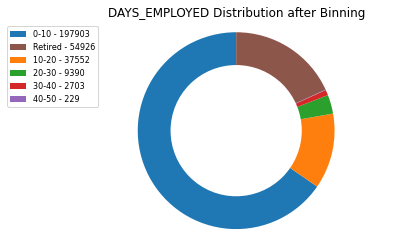

In [61]:
# Displaying graphs after binning process of Days_employed column

i ="DAYS_EMPLOYED"
df = app_data[i]/365   

filterlist = [ (df  >= 0 ) & (df< 10), (df >=10 ) & (df< 20), (df >=20 ) & (df< 30),(df >=30 ) & (df< 40),(df >=40 ) & (df< 50),
               (df >=50)]
labels     = [ "0-10", '10-20', '20-30',"30-40","40-50","Retired" ]
df = np.select(filterlist, labels, default=np.nan)
app_data[i+"_BIN"] = df
#app_data[i+"_BIN"]
df1 = app_data['DAYS_EMPLOYED_BIN'].value_counts().sort_index().to_frame("count")
patches, texts = plt.pie(df1["count"],  startangle=90, radius=1.2)

col1 = list(df1.index)
col2 =df1["count"]
labels = ['{0} - {1:d}'.format(i,j) for i,j in zip(col1, col2)]

patches, labels, d =  zip(*sorted(zip(patches, labels, df1["count"]),
                                  
                                          key=lambda x: x[2],
                                          reverse=True))
centre_circle = plt.Circle((0,0),0.8,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
    
plt.title(i+" Distribution after Binning")
plt.legend(patches, labels, bbox_to_anchor=(0.1, 1.),  fontsize=8)
plt.show()


In [62]:
app_data[['DAYS_EMPLOYED','DAYS_EMPLOYED_BIN']]

,DAYS_EMPLOYED,DAYS_EMPLOYED_BIN
0,637,0-10
1,1188,0-10
2,225,0-10
3,3039,0-10
4,3038,0-10
...,...,...
307506,236,0-10
307507,365243,Retired
307508,7921,20-30
307509,4786,10-20


In [63]:
printCyan("Shape of Datframe after Binning: {}".format(app_data.shape))

  Shape of Datframe after Binning: (302703, 76)


In [72]:
dayscols= [x for x in app_data.columns if ('DAYS' in x) &('BIN' not in x)]
l = ["DAYS_EMPLOYED_BIN","DAYS_EMPLOYED"]
dayscols = [x for x in dayscols if x not in l]
dayscols.extend(['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])
dayscols


['DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS']

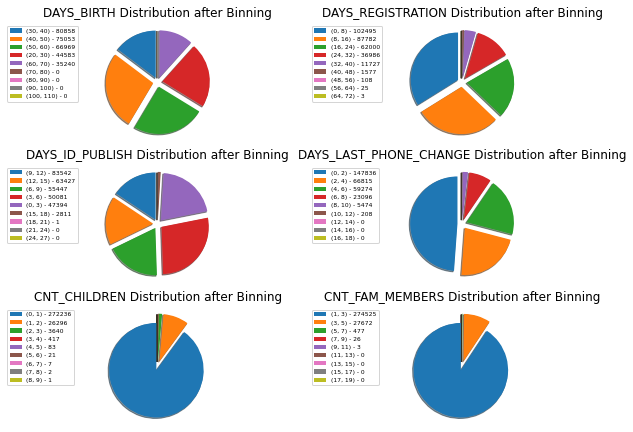

In [74]:
# Displaying graphs after binning process of Days and CNT columns

plt.figure(figsize=(10,10))
j=1
for i in dayscols:
    
    plt.subplot(4,2,j)
    if 'DAYS' in i:
        df = app_data[i]/365
    else:
        df = app_data[i]
    #plt.subplot(4,2,j)
    min_len = df.min()
    max_len = df.max()

   # print(min_len, max_len)
    val = 10**((len(str(round(min_len)))-1))
    min_len = val*round((min_len/val ) )
    val = 10**((len(str(round(max_len)))-1))
    max_len = val*round((max_len/val )+1)
    quantity = 10
    width = ((min_len+ max_len)/quantity)
    val= 10**((len(str(round(width)))-1))
    width = val*round((width/val))
    bins =[]
    col1 =[]
    for low in range(min_len,min_len + quantity*width, width):
        bins.append(low)
        col1.append((low,low+width))
   
    app_data[i+"_BIN"] = pd.cut(df, bins = bins,labels = col1[:len(col1)-1],include_lowest = True)
    df1 = pd.cut(df, bins = bins,labels = col1[:len(col1)-1], include_lowest = True).value_counts().sort_index().to_frame("count")
    #patches, texts = pd.cut(df, bins = bins,include_lowest = True).value_counts().sort_index().plot.pie(startangle=90, radius=1.2)
    explode =(0.1,)*(len(df1))
    
    patches, texts = plt.pie(df1["count"], shadow= True,explode= explode,  startangle=90, radius=1)
    
    col2 =df1["count"]
    labels = ['{0} - {1:d}'.format(i,j) for i,j in zip(col1, col2)]

    patches, labels, d =  zip(*sorted(zip(patches, labels, df1["count"]),
                                          key=lambda x: x[2],
                                          reverse=True))
    
    plt.title(i+" Distribution after Binning")
    plt.legend(patches, loc= "upper left", labels = labels, bbox_to_anchor=(-0.8, 1.),  fontsize=6)
    
    j= j+1
    
plt.show()

In [77]:
printCyan("Shape of Datframe after Binning: {}".format(app_data.shape))

  Shape of Datframe after Binning: (302703, 82)


In [78]:
dayscols= [x for x in app_data.columns if 'DAYS' in x]

app_data[dayscols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_BIN,DAYS_BIRTH_BIN,DAYS_REGISTRATION_BIN,DAYS_ID_PUBLISH_BIN,DAYS_LAST_PHONE_CHANGE_BIN
0,9461,637,3648,2120,1134,"(0, 200)","(20, 30)","(8, 16)","(3, 6)","(2, 4)"
1,16765,1188,1186,291,828,"(0, 200)","(40, 50)","(0, 8)","(0, 3)","(2, 4)"
2,19046,225,4260,2531,815,"(0, 200)","(50, 60)","(8, 16)","(6, 9)","(2, 4)"
3,19005,3039,9833,2437,617,"(0, 200)","(50, 60)","(24, 32)","(6, 9)","(0, 2)"
4,19932,3038,4311,3458,1106,"(0, 200)","(50, 60)","(8, 16)","(9, 12)","(2, 4)"
...,...,...,...,...,...,...,...,...,...,...
307506,9327,236,8456,1982,273,"(0, 200)","(20, 30)","(16, 24)","(3, 6)","(0, 2)"
307507,20775,365243,4388,4090,0,"(1000, 1200)","(50, 60)","(8, 16)","(9, 12)","(0, 2)"
307508,14966,7921,6737,5150,1909,"(0, 200)","(40, 50)","(16, 24)","(12, 15)","(4, 6)"
307509,11961,4786,2562,931,322,"(0, 200)","(30, 40)","(0, 8)","(0, 3)","(0, 2)"


#####  <span style="color : darkred"> <i> Categorical columns </i></span>

In [79]:
# Reteiving categorical Columns information

catcols = list(app_data.select_dtypes(include= 'object').columns)      
l =  [x for x in app_data.columns if 'BIN' in x]
catcols = [x for x in catcols if x not in l]
catcols
app_data[catcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302703 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          302703 non-null  object
 1   CODE_GENDER                 302703 non-null  object
 2   NAME_TYPE_SUITE             302703 non-null  object
 3   NAME_INCOME_TYPE            302703 non-null  object
 4   NAME_EDUCATION_TYPE         302703 non-null  object
 5   NAME_FAMILY_STATUS          302703 non-null  object
 6   NAME_HOUSING_TYPE           302703 non-null  object
 7   OCCUPATION_TYPE             302703 non-null  object
 8   WEEKDAY_APPR_PROCESS_START  302703 non-null  object
 9   ORGANIZATION_TYPE           302703 non-null  object
dtypes: object(10)
memory usage: 25.4+ MB


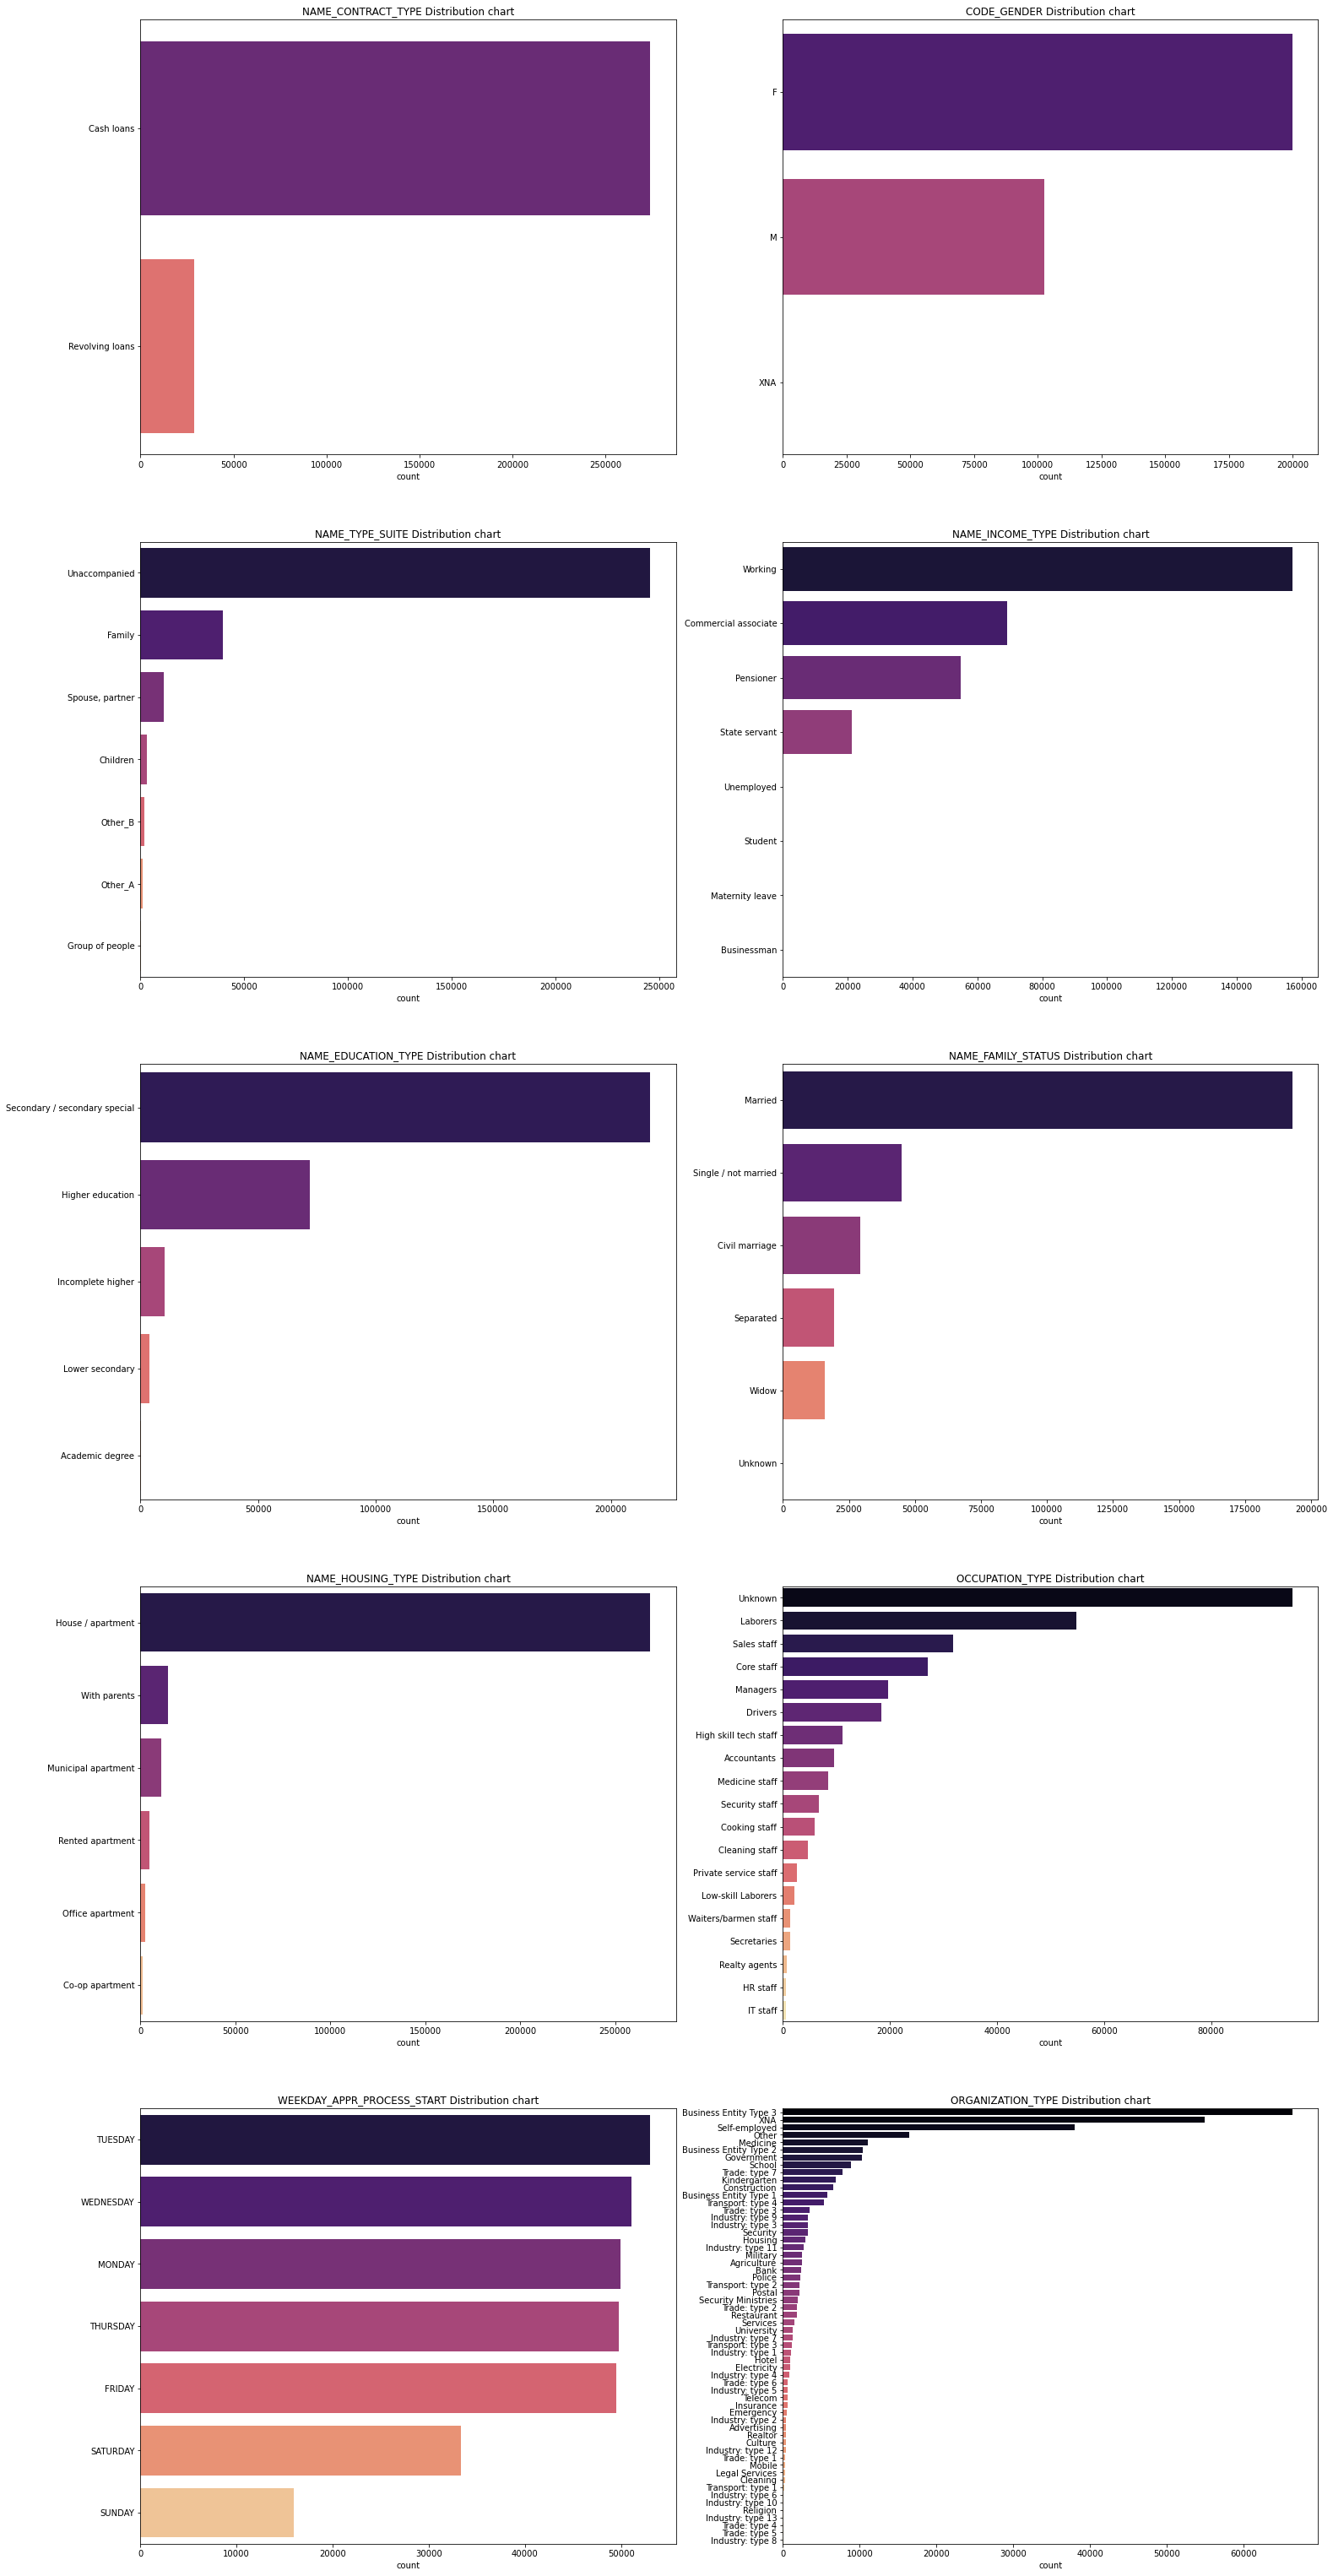

In [81]:
# Plotting Categorcal columns
plt.figure(figsize=(25,55))
j=1
for i in catcols:
    plt.subplot(5,2,j)
    df = app_data[i].value_counts().to_frame("count")
    p1 = sns.barplot(y = df.index, x = "count",data = df, palette="magma", orient ="h")
    #plt.xticks(rotation=90)

    j=j+1
    plt.title(i+" Distribution chart")
plt.show()

In [82]:
# Observations

app_data.shape

(302703, 82)

In [91]:
#CODE GENDER column Analysis
print(app_data["CODE_GENDER"].value_counts())

F    200067
M    102636
Name: CODE_GENDER, dtype: int64


In [92]:
#Replacing XNa with mode of distribution since Female has high frequency value and XNA doesnot mean any value
app_data.loc[app_data["CODE_GENDER"]=="XNA","CODE_GENDER"] = app_data["CODE_GENDER"].mode()[0]
print(app_data["CODE_GENDER"].value_counts())

F    200067
M    102636
Name: CODE_GENDER, dtype: int64


In [93]:
#ORGANIZATION TYPE  analysis

app_data[["ORGANIZATION_TYPE"]].value_counts(normalize =True) #=app_data["CODE_GENDER"].mode()
print(app_data.loc[app_data["ORGANIZATION_TYPE"]=="XNA",['ORGANIZATION_TYPE','OCCUPATION_TYPE',"NAME_INCOME_TYPE"]].value_counts())

Series([], dtype: int64)


In [94]:
##From this part of analysis we can conclude these values are missing not at random, as these are not filled by clients whose income type is Pensioner
print(app_data.loc[app_data["NAME_INCOME_TYPE"]=="Pensioner",['ORGANIZATION_TYPE','OCCUPATION_TYPE',"NAME_INCOME_TYPE"]].value_counts())
# Let us replace these values with specific column value as "Unknown" defining Pensioners
app_data.loc[app_data["ORGANIZATION_TYPE"]=="XNA",'ORGANIZATION_TYPE'] ="Unknown"

ORGANIZATION_TYPE       OCCUPATION_TYPE  NAME_INCOME_TYPE
Unknown                 Unknown          Pensioner           54902
Business Entity Type 3  Unknown          Pensioner               2
Unknown                 Cleaning staff   Pensioner               2
Business Entity Type 2  Unknown          Pensioner               1
Business Entity Type 3  Laborers         Pensioner               1
Industry: type 9        Unknown          Pensioner               1
Medicine                Medicine staff   Pensioner               1
Military                Unknown          Pensioner               1
School                  Unknown          Pensioner               1
Self-employed           Sales staff      Pensioner               1
Trade: type 7           Unknown          Pensioner               1
dtype: int64


## <span style='color:darkblue'>  Task 3 : Data Analysis </span>

### <span style='color:darkred'> Subtask 3.1 Univariate Analysis </span>

In [95]:
print(app_data.shape)
app_data.head()

(302703, 82)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AMT_ANNUITY_BIN,AMT_GOODS_PRICE_BIN,DAYS_EMPLOYED_BIN,DAYS_BIRTH_BIN,DAYS_REGISTRATION_BIN,DAYS_ID_PUBLISH_BIN,DAYS_LAST_PHONE_CHANGE_BIN,CNT_CHILDREN_BIN,CNT_FAM_MEMBERS_BIN
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,180000-250000,70000-470000,15000-25000,60000-460000,"(0, 200)","(20, 30)","(8, 16)","(3, 6)","(2, 4)","(0, 1)","(1, 3)"
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,0.54,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,250000-320000,1270000-1670000,35000-45000,860000-1260000,"(0, 200)","(40, 50)","(0, 8)","(0, 3)","(2, 4)","(0, 1)","(1, 3)"
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.0,0.0,0.0,0.0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40000-110000,70000-470000,5000-15000,60000-460000,"(0, 200)","(50, 60)","(8, 16)","(6, 9)","(2, 4)","(0, 1)","(1, 3)"
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,0.54,2.0,0.0,2.0,0.0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,110000-180000,70000-470000,25000-35000,60000-460000,"(0, 200)","(50, 60)","(24, 32)","(6, 9)","(0, 2)","(0, 1)","(1, 3)"
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,0.54,0.0,0.0,0.0,0.0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,110000-180000,470000-870000,15000-25000,460000-860000,"(0, 200)","(50, 60)","(8, 16)","(9, 12)","(2, 4)","(0, 1)","(1, 3)"


#### <span style='color:darkred '> Distribution of Target Variable</span>
<span style='color:purple '>
    <br>
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)</span>

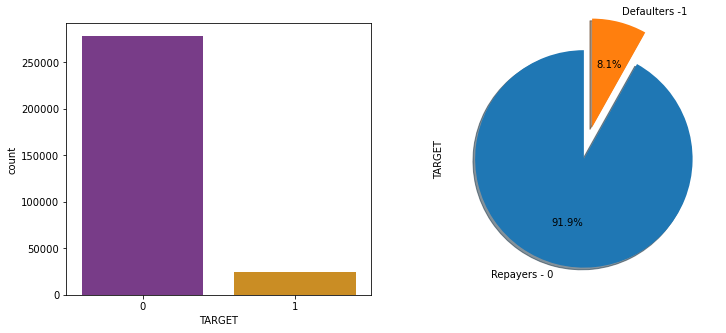

In [97]:
labels = 'Repayers - 0', 'Defaulters -1'
explode = (0, 0.3)
fig,(ax, ax1) = plt.subplots(ncols =2, figsize=(12,5))
sns.countplot( x="TARGET", data=app_data, palette= "CMRmap", ax =ax)
app_data["TARGET"].value_counts().plot.pie(explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, ax =ax1)
plt.show()

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

#### DATA Imbalance :

We could see that there is high distribution of records tends towards Target variable 0 than 1 , therefore imbalance exist in these 2 classes ie Payers with and without payment difficulties.
    </b></span>

In [98]:
#Dividing the imbalance data into 2 dataset for 2 class of values
Defaulters = app_data[app_data["TARGET"]==1]
Repayers = app_data[app_data["TARGET"]==0]
printCyan("Size of Defaulters(Target-1) Dataframe :{}".format( Defaulters.shape ))
printCyan("Size of Repayers(Target-0) Dataframe : {}".format(Repayers.shape ))
printCyan("Ratio of Repayers to Defaulters : {}".format( len(Repayers)/len(Defaulters) ))

  Size of Defaulters(Target-1) Dataframe :(24606, 82)
  Size of Repayers(Target-0) Dataframe : (278097, 82)
  Ratio of Repayers to Defaulters : 11.301999512314069


##### <span style='color:purple '> Analysis of Target variable on other Categorical columns </span>

In [99]:
Repayers['FLAG_MOBIL']

1         1
2         1
3         1
4         1
5         1
         ..
307505    1
307506    1
307507    1
307508    1
307510    1
Name: FLAG_MOBIL, Length: 278097, dtype: int64

In [100]:
# Retreiving list of columns with 2 categorical values

def cattargetpie(catval2,szx, szy, color1, color2):
    j=1
    plt.figure(figsize=(szx,szy))
    
    for i in catval2:
        plt.subplot((len(catval2)/3)+1,3,j)
        df1 = Defaulters
        df1 = Defaulters[i].value_counts(normalize = True).to_frame("Count").rename_axis(i).reset_index()
        df1["Count"] = df1["Count"]*100

        df2 = Repayers
        df2 = Repayers[i].value_counts(normalize = True).to_frame("Count").rename_axis(i).reset_index()
        df2["Count"] = df2["Count"]*100

        labels = list(df1[i].values)
        labels
        exppayed = (0.2,)* len(df1)
        expnotpayed = (0.1,)* len(df2)
        #Plot
        plt.pie(df1["Count"],  labels=labels, autopct='%1.1f%%',colors =color1 ,pctdistance=0.8,shadow=True, startangle=70,frame=True, explode=exppayed,radius=4)

        plt.pie(df2["Count"], autopct='%1.1f%%',colors =  color2, pctdistance=0.4,shadow=True, startangle=70, explode=expnotpayed,radius=2  )
        #Draw circle
        centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal')
        plt.title(i+" vs TARGET")
        j =j+1
        if (j ==4):
            #plt.legend(labels = ("Outer Circle - Not Repayers\n Inner Circle - Repayers"),loc ="upper left", bbox_to_anchor=(0.9,1))
            plt.text(8, 6, 'Outer Circle - Defaulters\n Inner Circle - Repayers',bbox = dict(facecolor = 'white', alpha = 0.5), fontsize = 8)

    plt.show()


                                                                         

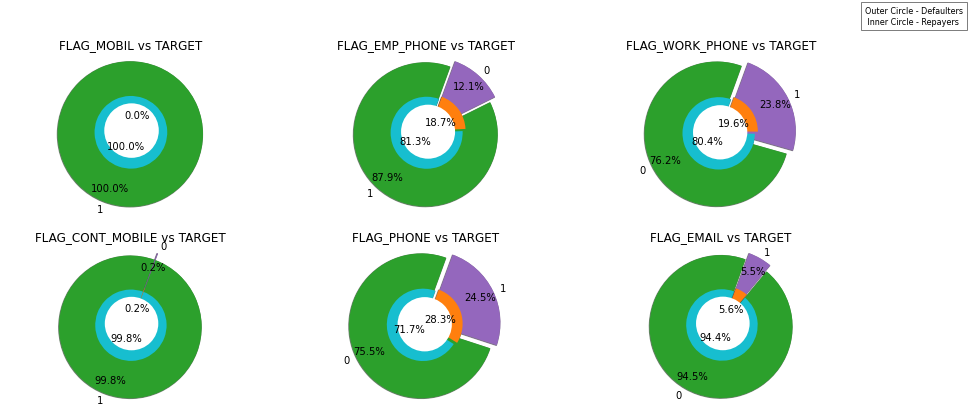

In [101]:
##  Analysis of Flag MOBIL/PHONE columns with Target variable

catval2 = list(app_data.nunique().to_frame("count").query('count<=2').index)
catval2 = [ x for x in catval2 if ('MOBIL' in x) | ('PHONE' in x) | ('EMAIL'in x)]

cattargetpie(catval2,15,10,['tab:green', 'tab:purple'],['tab:cyan', 'tab:orange'])

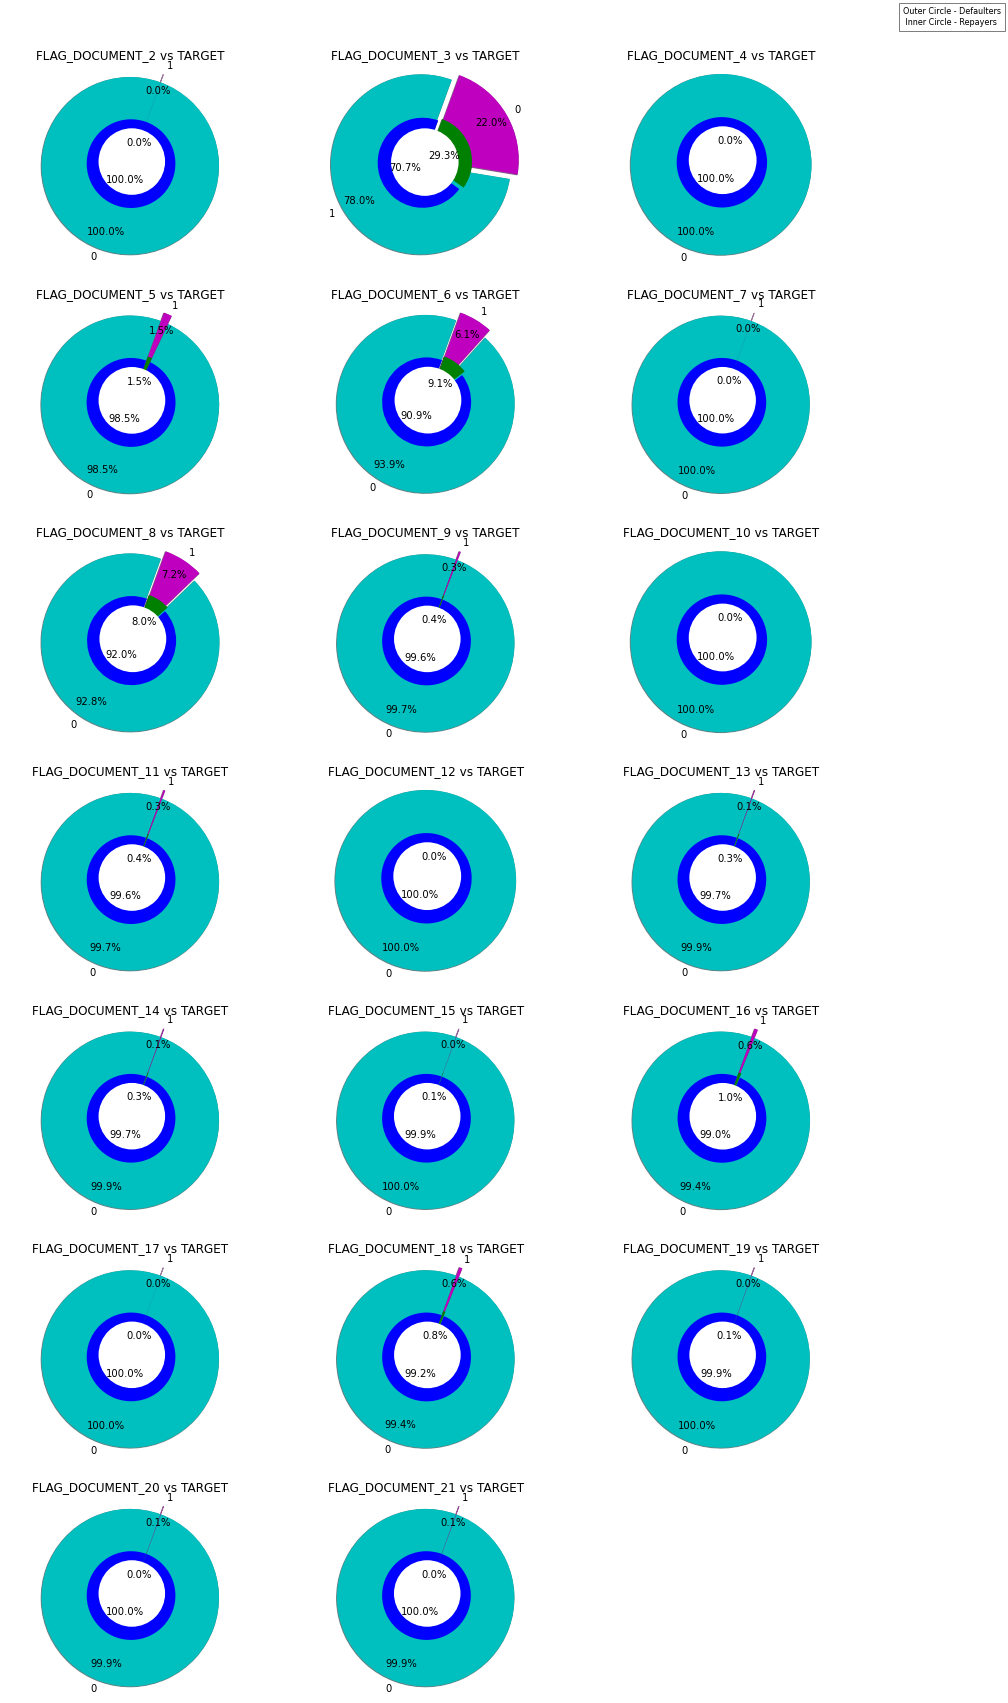

In [102]:
##  Analysis of Flag Document columns with Target variable
catval2 = list(app_data.nunique().to_frame("count").query('count<=2').index)
catval2 = [ x for x in catval2 if ('DOCUMENT' in x) ]
cattargetpie(catval2,15,30,['c', 'm'],['b', 'g'])

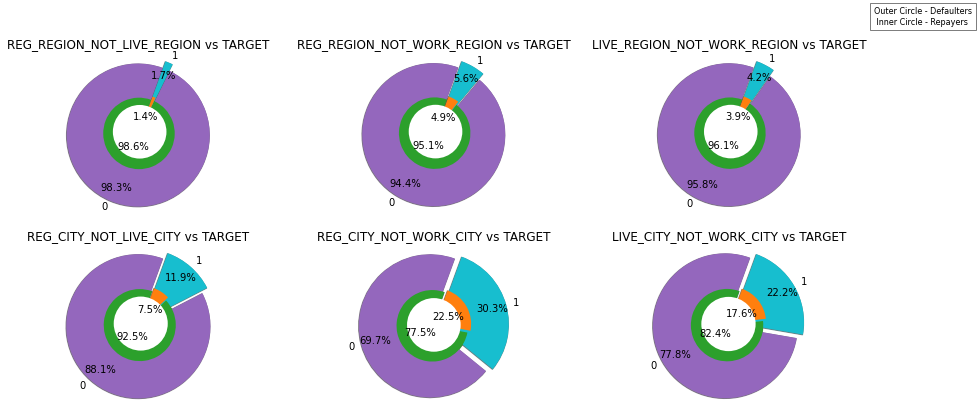

In [103]:
## Univariate anlaysis of Document columns on Target
catval2 = list(app_data.nunique().to_frame("count").query('count<=2').index)
catval2 = [ x for x in catval2 if ('CITY' in x) | ('REGION' in x) ]
cattargetpie(catval2,15,10,['tab:purple', 'tab:cyan'],['tab:green', 'tab:orange'])

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

Document, Mobil/PHONE, CITY/Region column's change in values has little significance on ratio of Daulters to Repayers.
    </b></span>

In [104]:
def catbar(i,szx, szy, colorv,colrv):
    
    fig, ax = plt.subplots (1, 2, figsize=(szx, szy))

    dfm = pd.DataFrame()
    dfmp = pd.DataFrame()
    
    dfm['Defaulters'] =Defaulters[i].value_counts().sort_index()
    dfm['Repayers'] =Repayers[i].value_counts().sort_index()
    dfm = dfm.rename_axis(i).reset_index()
    d = pd.melt(dfm, id_vars=i, var_name="Target", value_name="Count")

    p1 = sns.barplot(y=i, x='Count', hue='Target', orient ="h", data=d, palette = colorv, ax = ax[0])
    #p1.set_xticklabels(labels = d[i],rotation = 90)
    #print(d[i])
    ax[0].set_title(i+" Count")
    
    dfmp['Defaulters'] =round(100*(Defaulters[i].value_counts().sort_index()/len(Defaulters)),2)
    dfmp['Repayers'] =round(100*(Repayers[i].value_counts().sort_index()/len(Repayers)),2)
    #print(dfmp)
    dfmp = dfmp.rename_axis(i).reset_index()
    d = pd.melt(dfmp, id_vars=i, var_name="Target", value_name="Count")

    p2 = sns.barplot(y=i, x='Count', hue='Target',  data=d,orient ="h",  palette = colrv, ax = ax[1])
    #p2.set_xticklabels(labels = d[i], rotation = 90)
    plt.title(i+" Percentage")
    plt.tight_layout()
    plt.show()
    


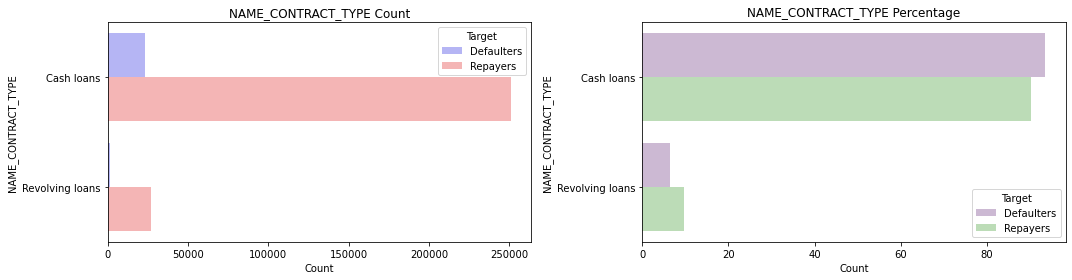

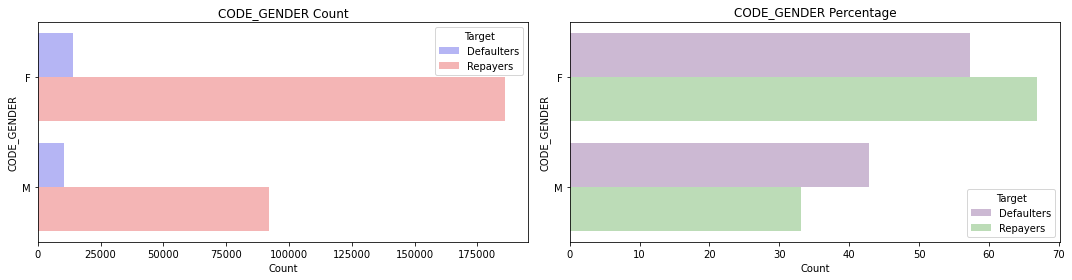

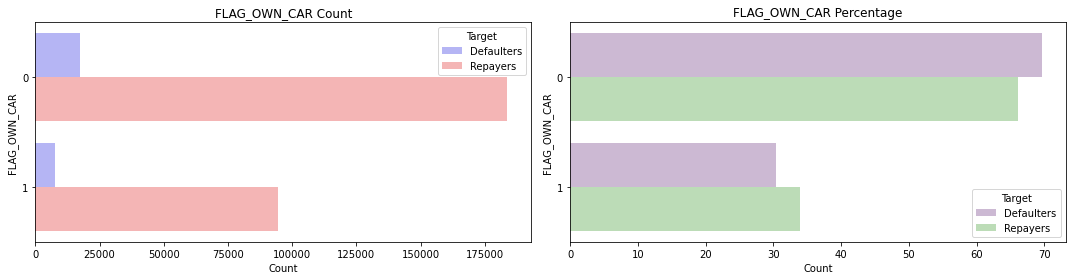

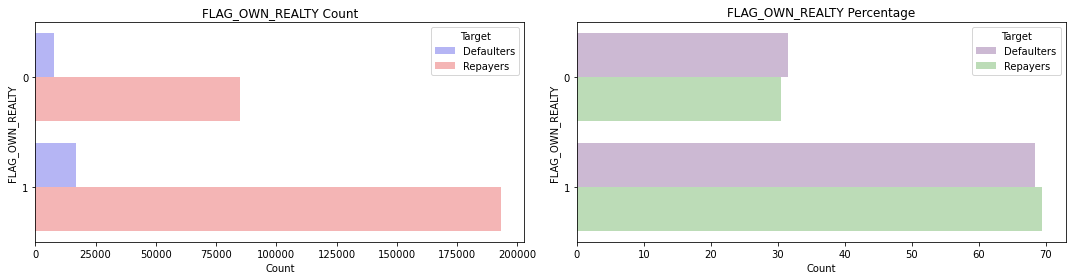

In [105]:
#Ananlysis Binomial Categorical columns
catval2 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for i in catval2:
    catbar(i,15,4, "bwr","PRGn")


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Larger population prefered cash loans than revolving loans, but percentage of defaulters is higher than repayers in cash loans.
2. Though larger population observed to be Female, percentage of defaulters are higher than repayers among Males.
3. Flag-own car -0, means who doesnt own car;  High percentage of ddelauters than repayers found in population who doesnt own car.
4. Flag-own car -0, means who doesnt own house/apartment, slight higher percentage of defaulters than repayers found to be in population who doesnt own house.
    </b></span>


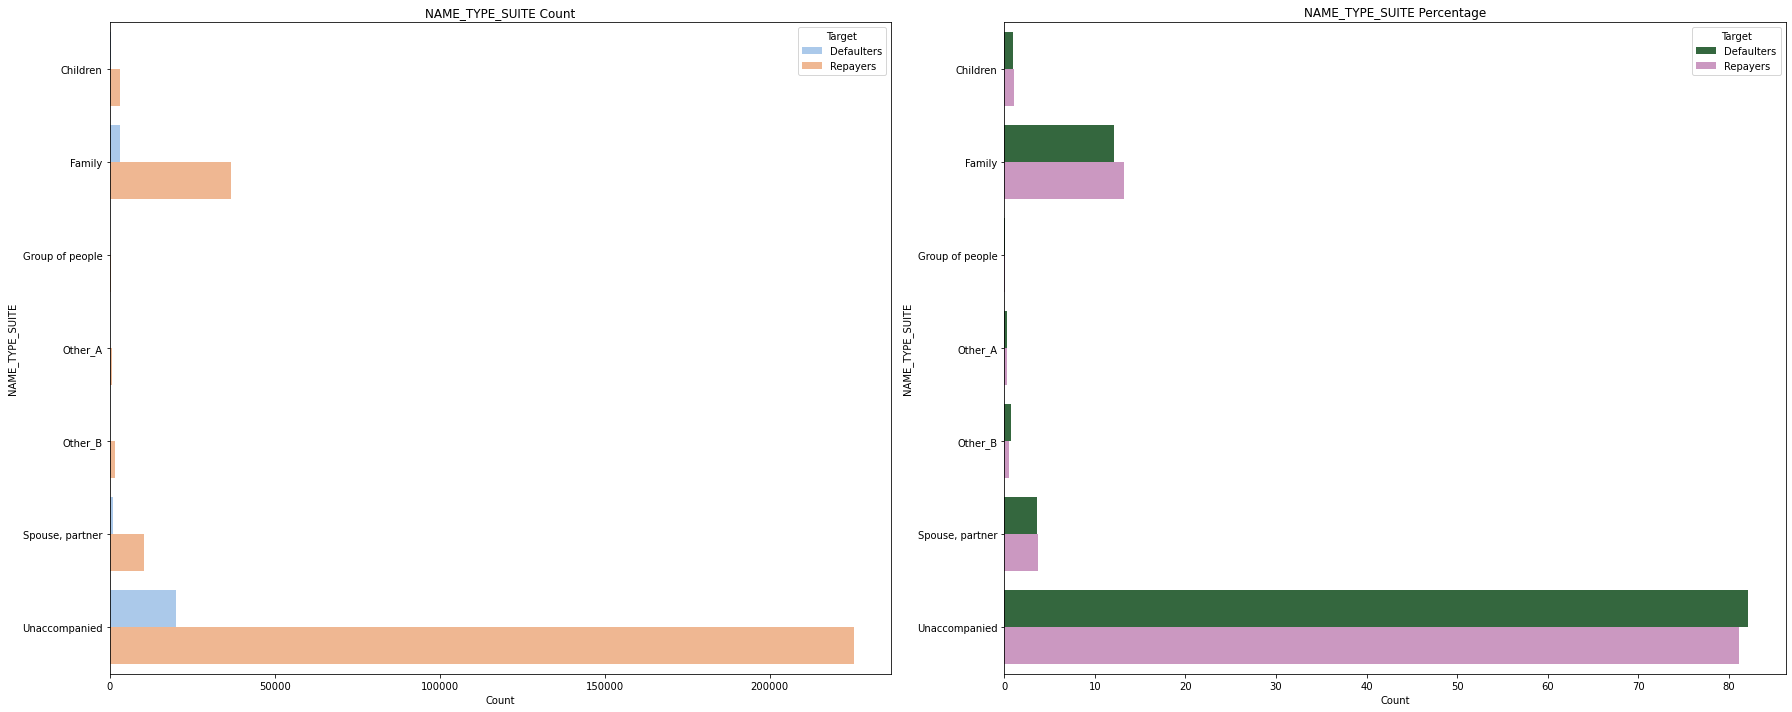

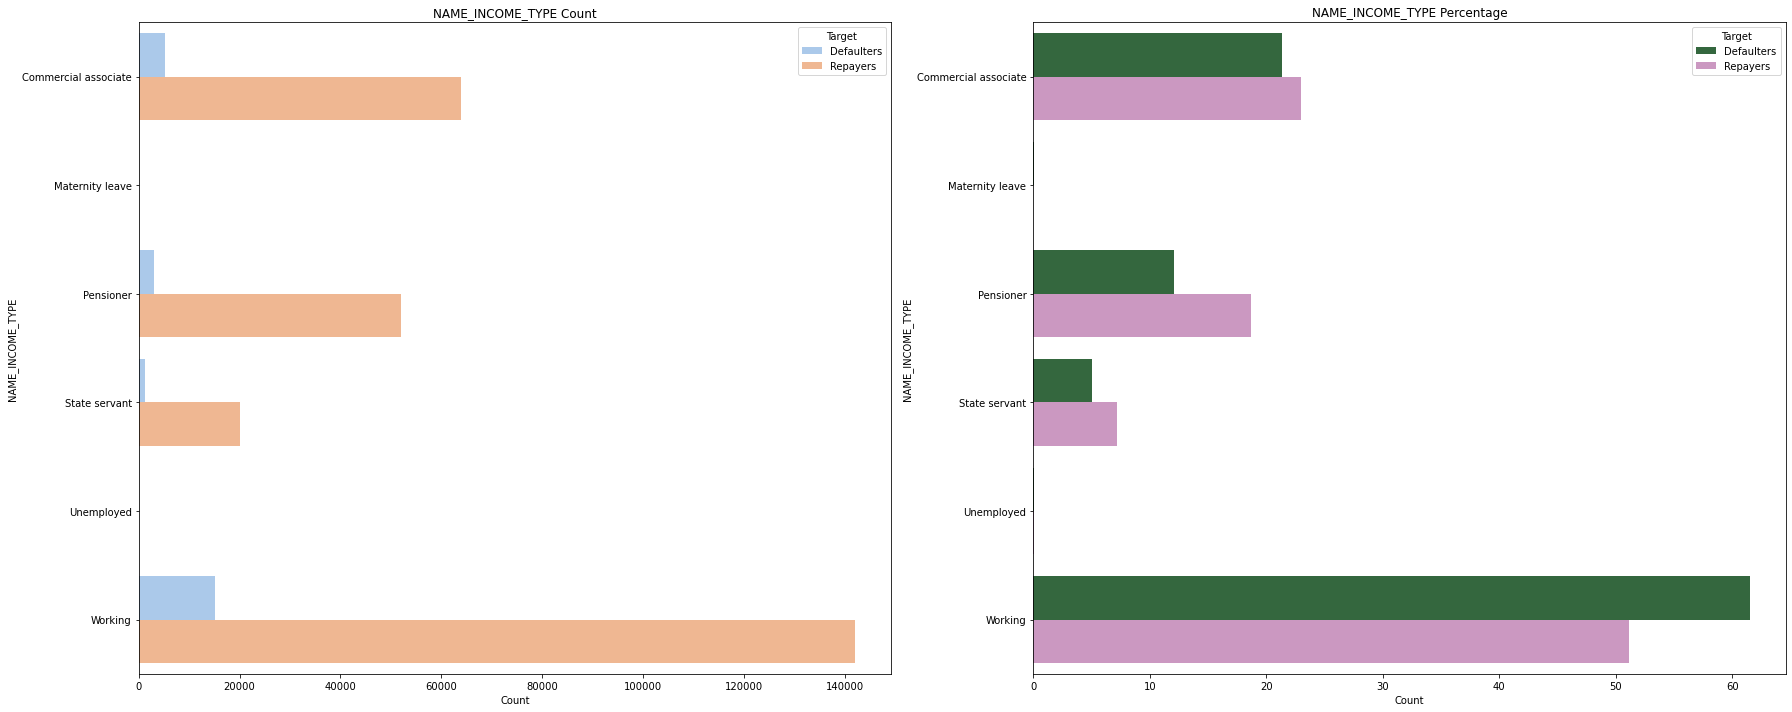

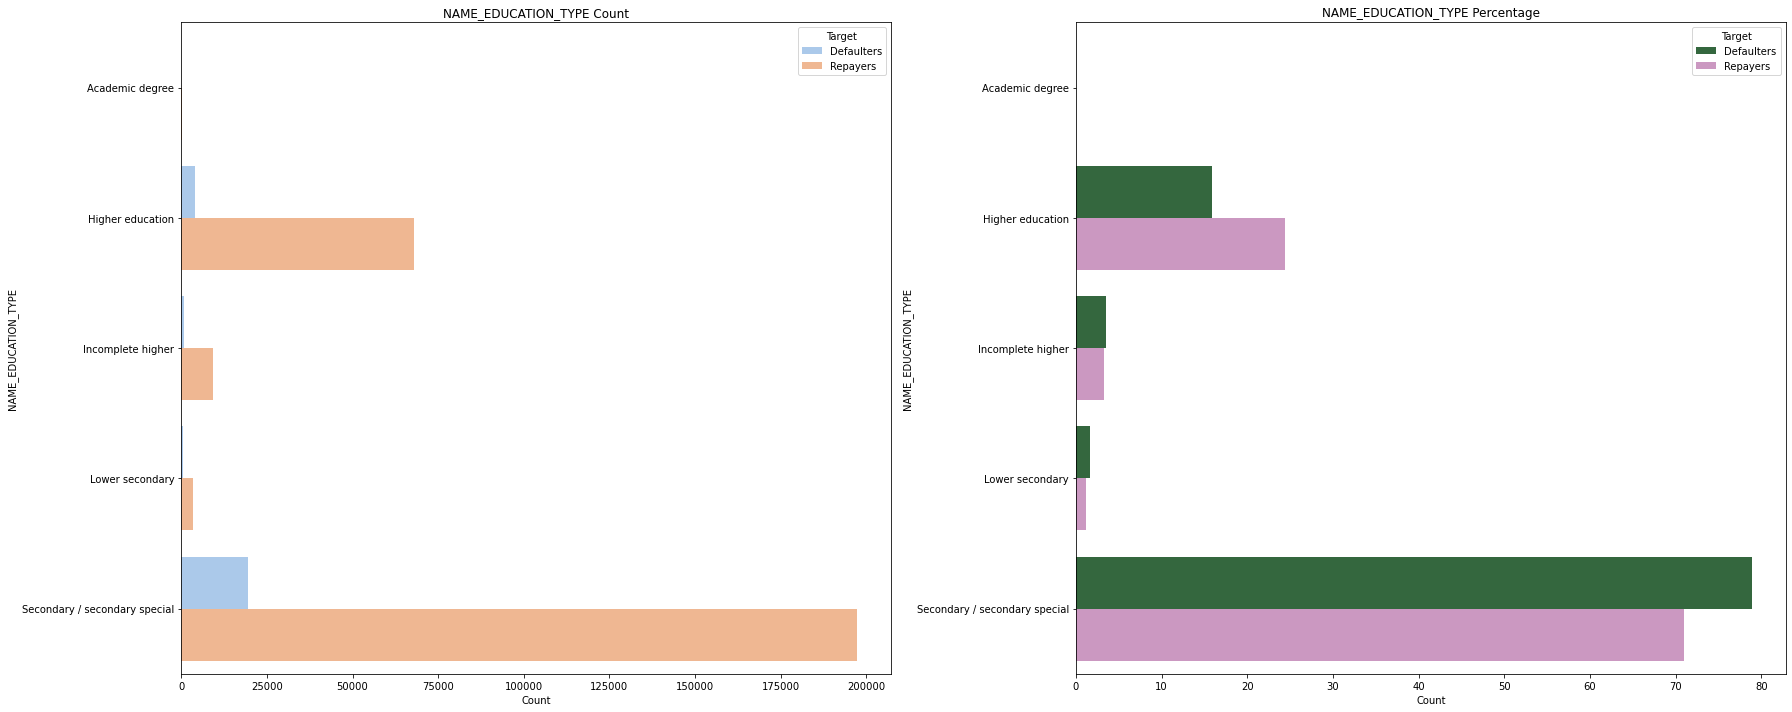

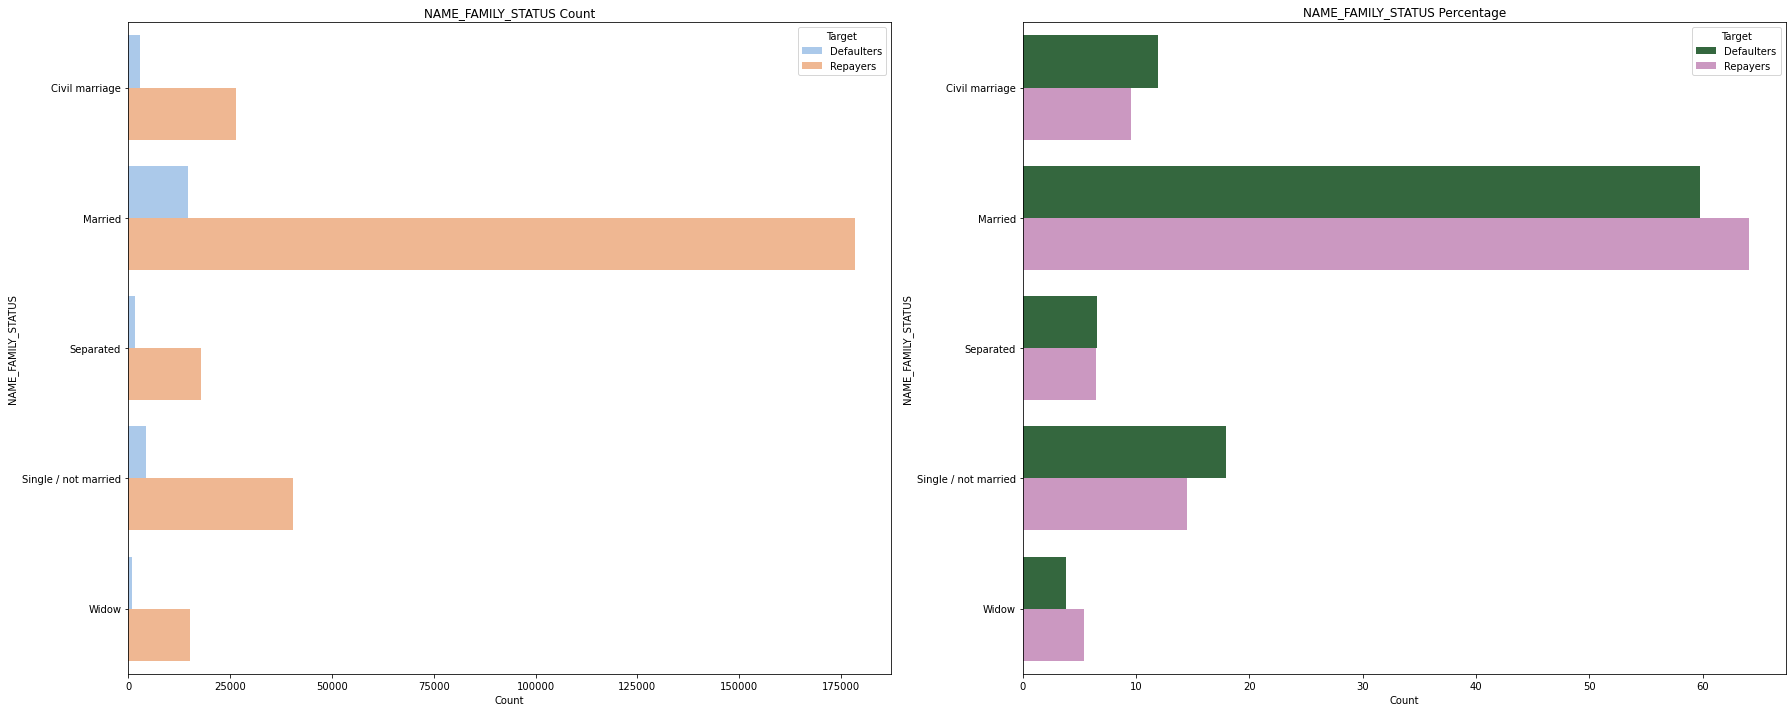

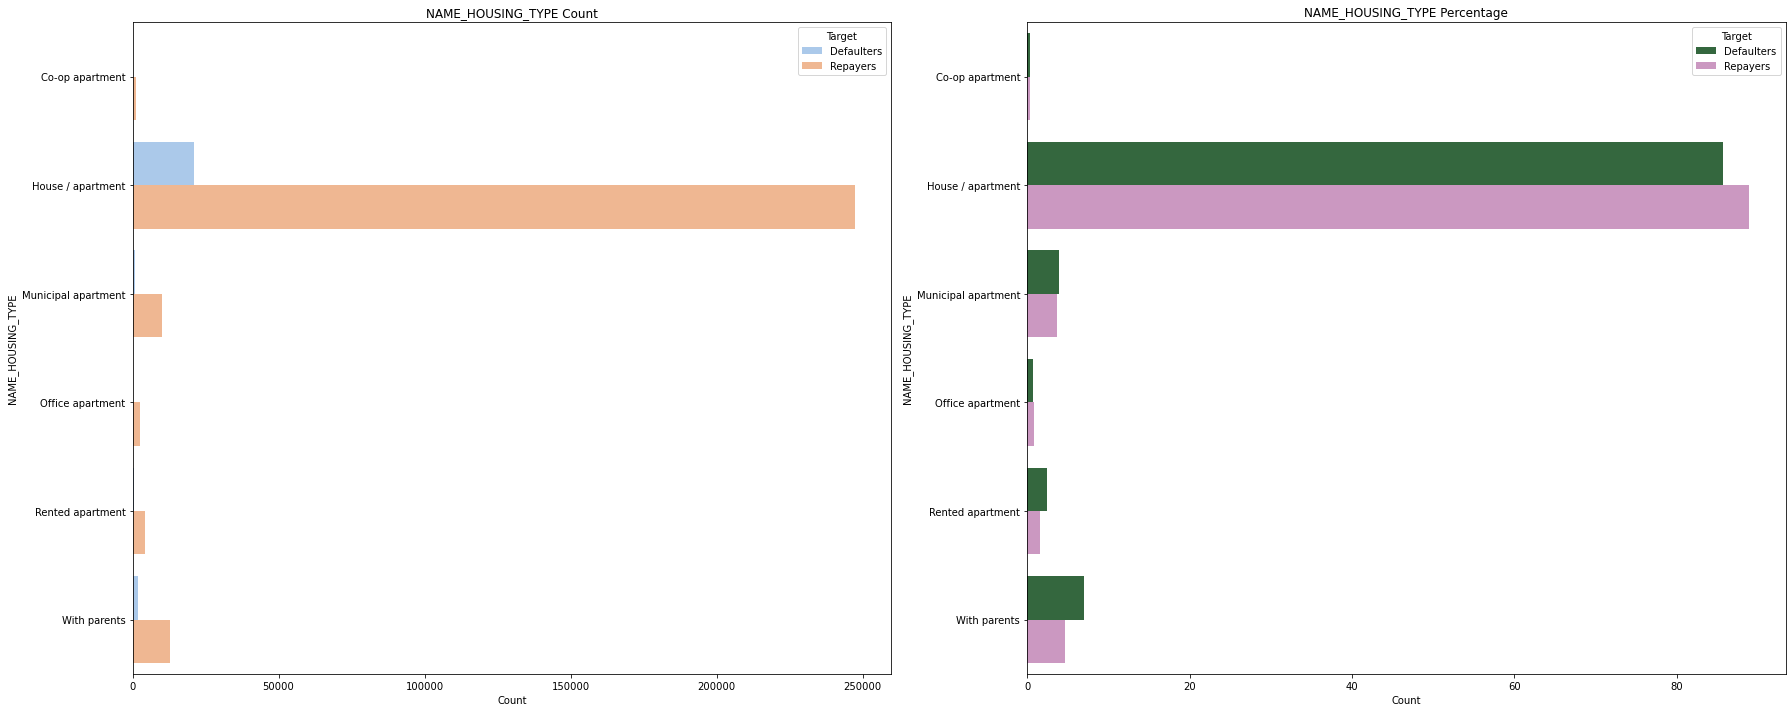

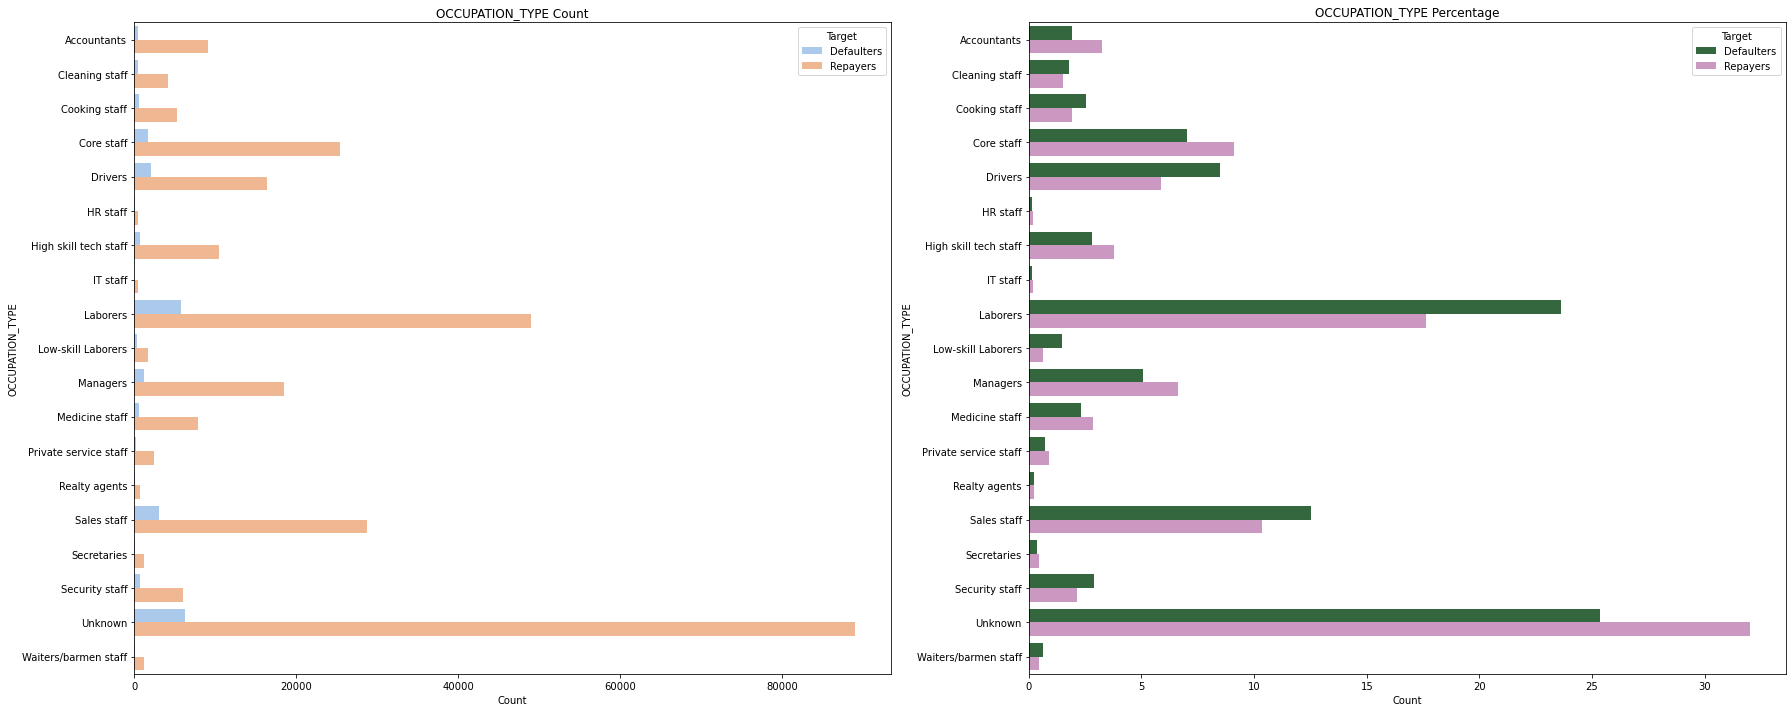

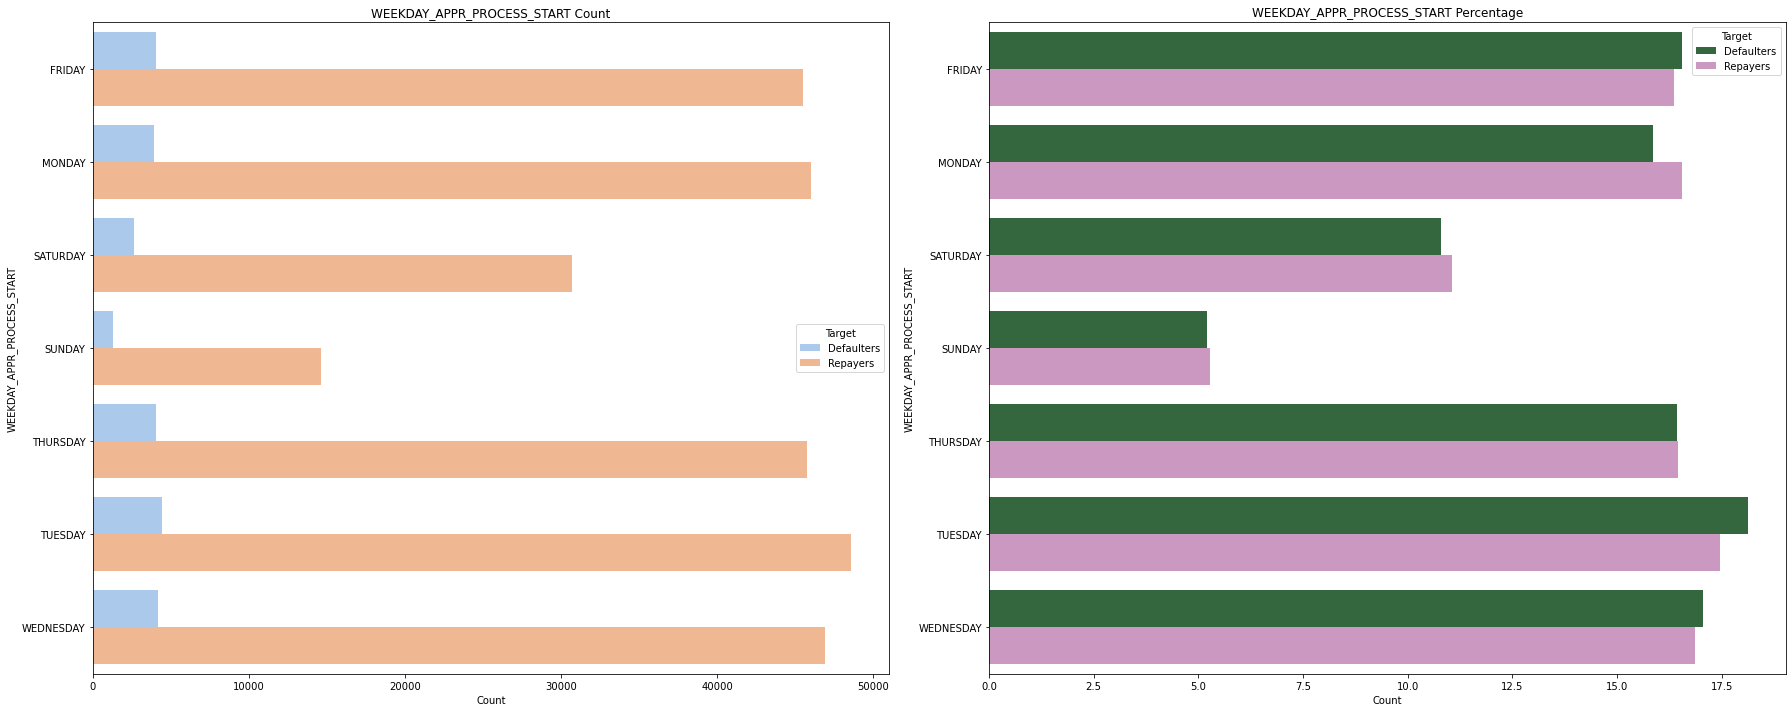

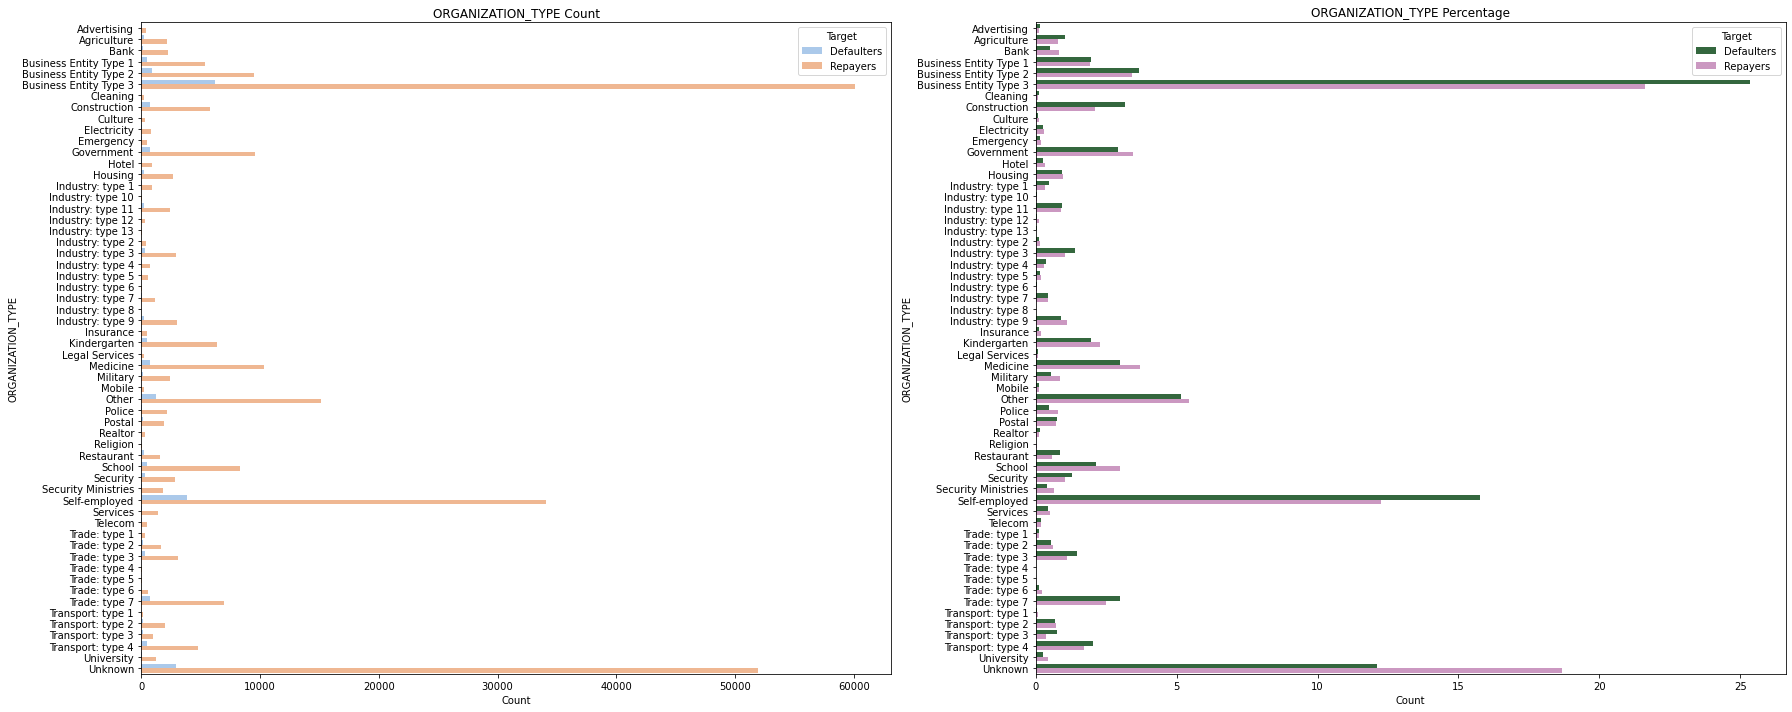

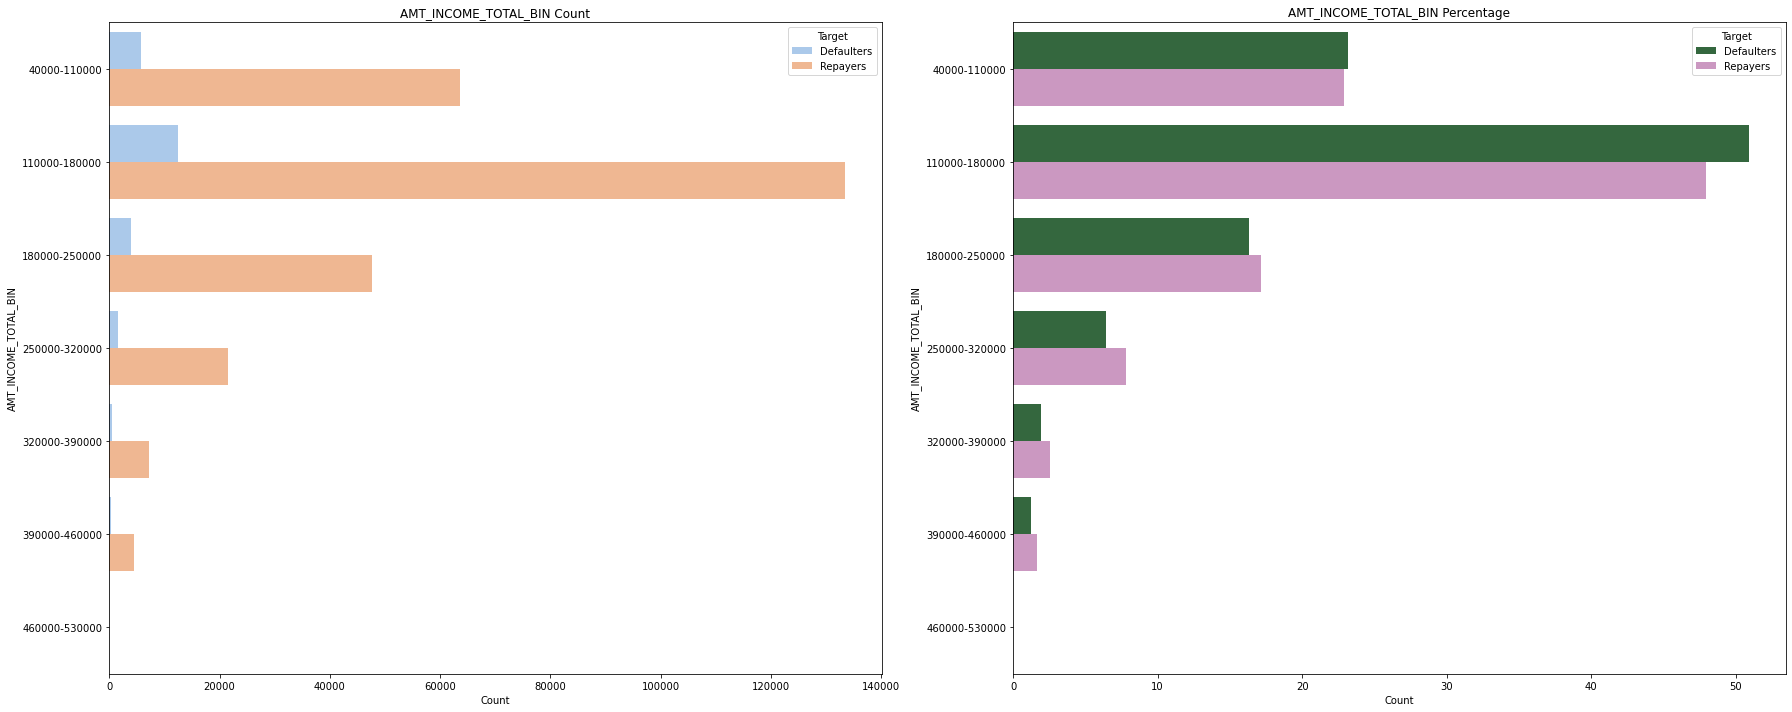

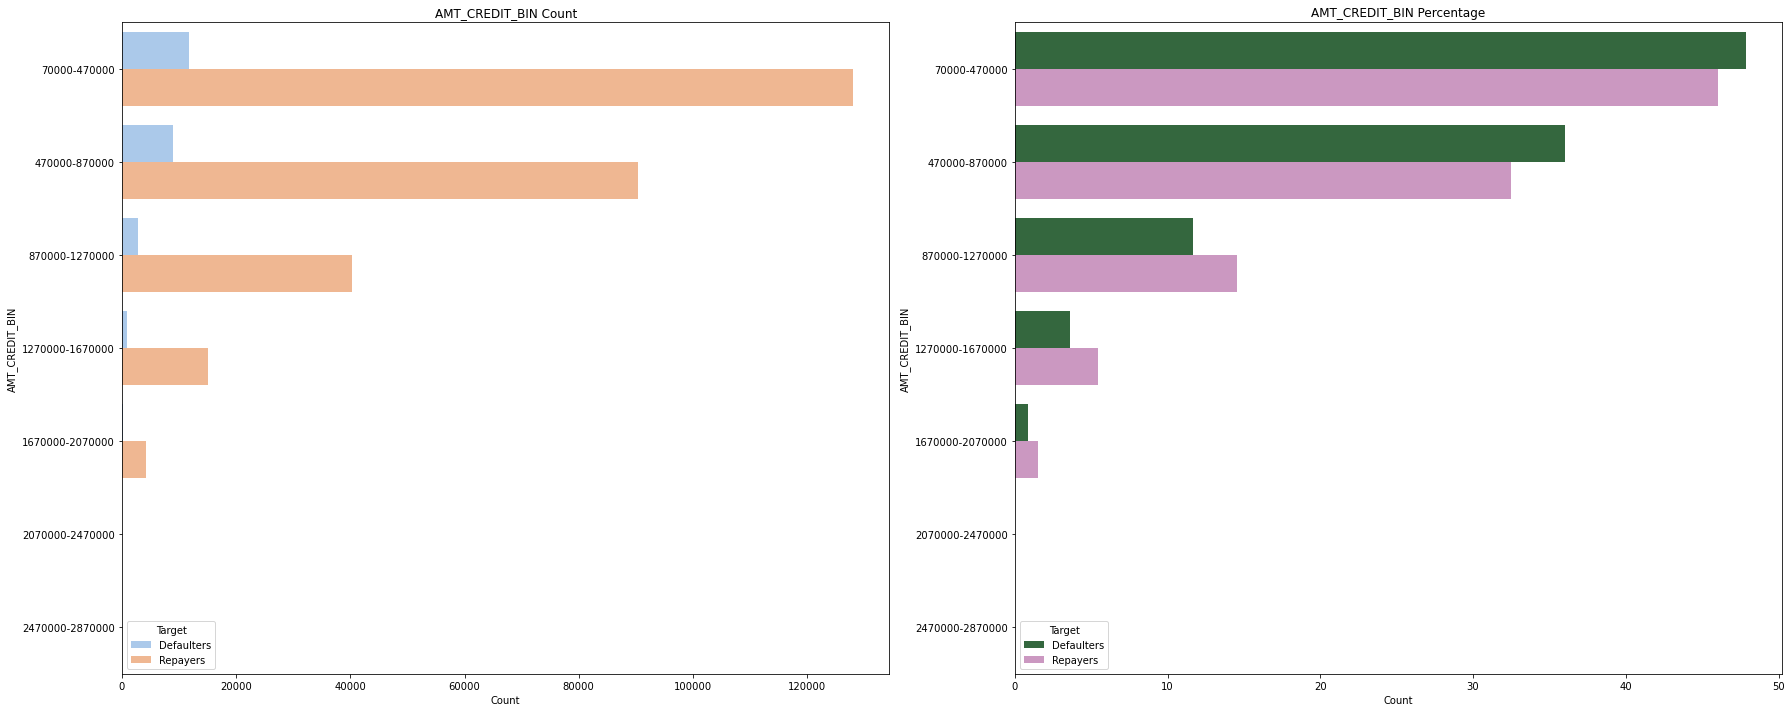

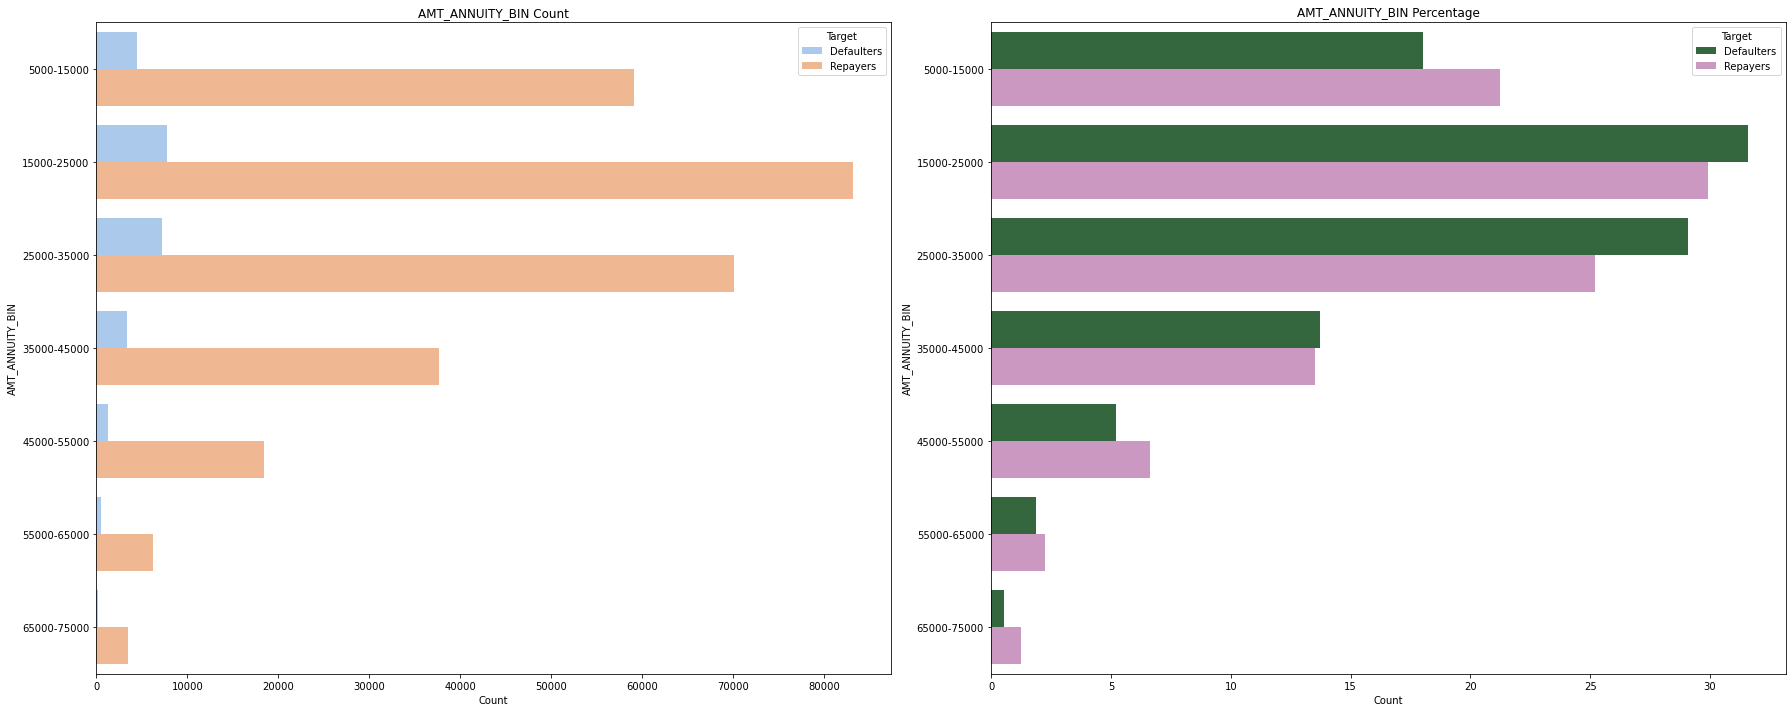

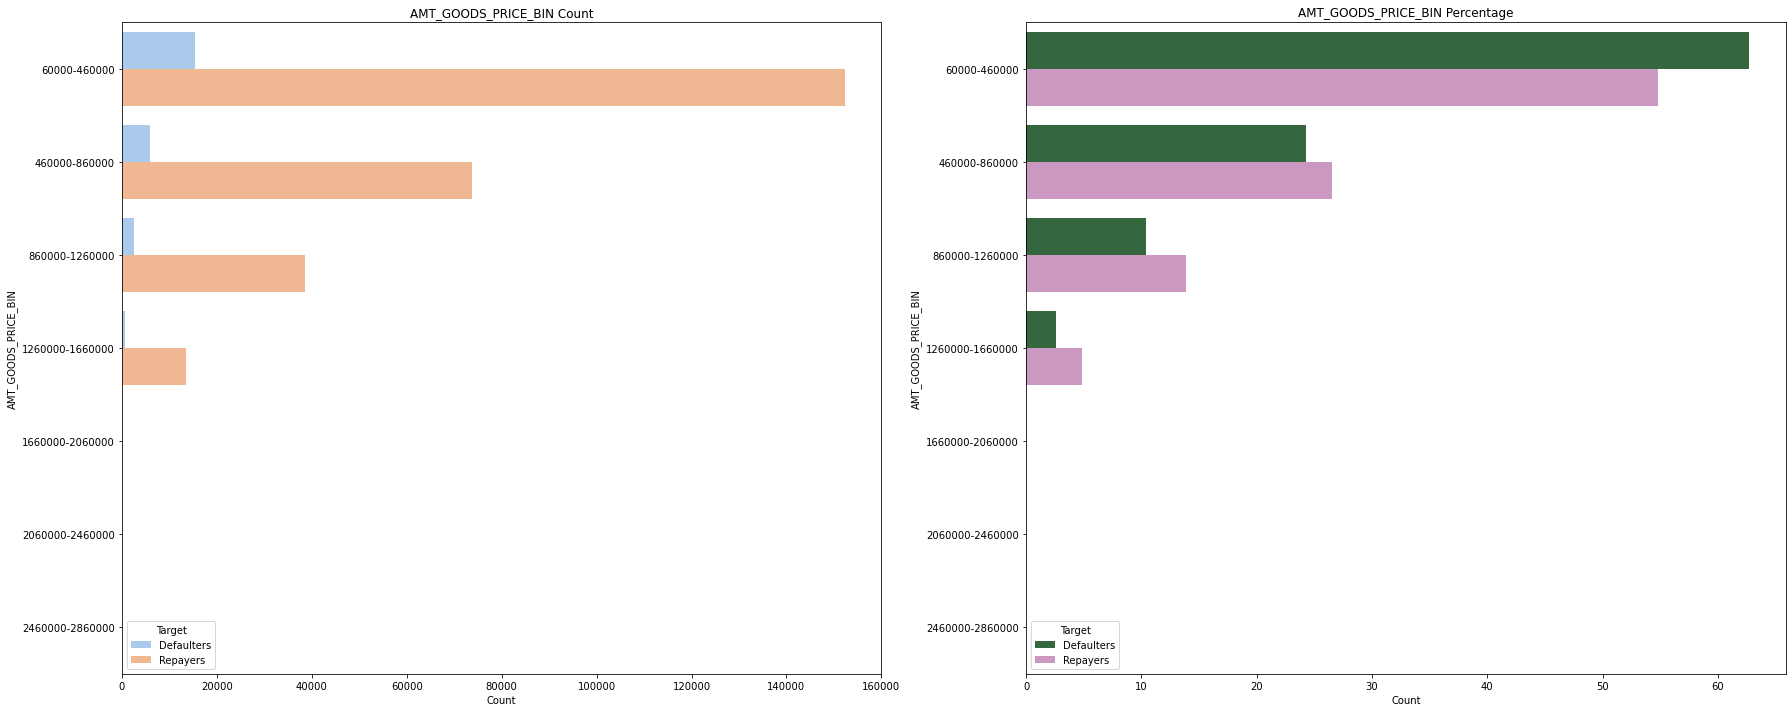

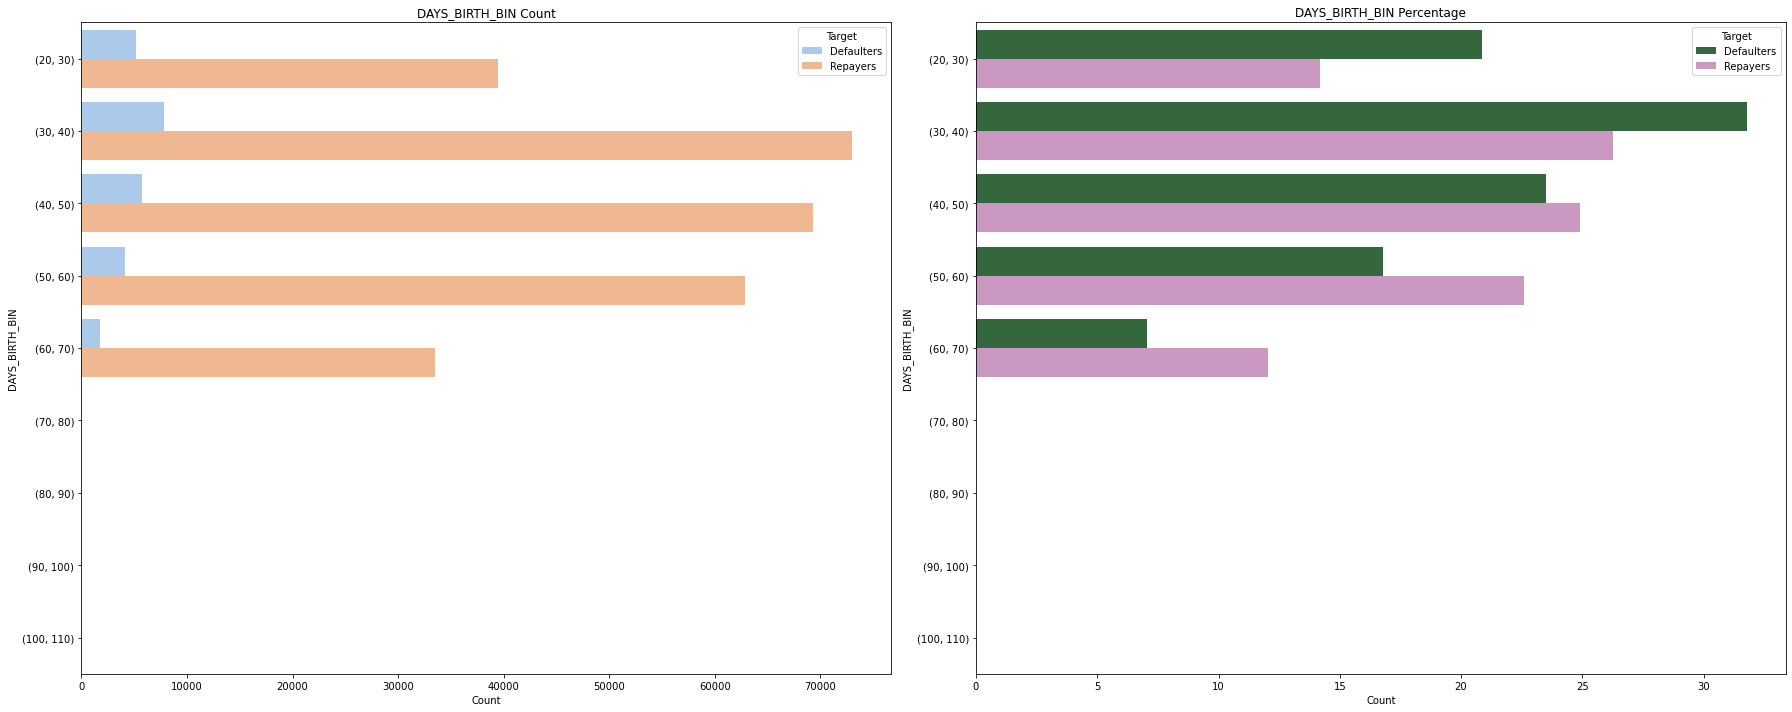

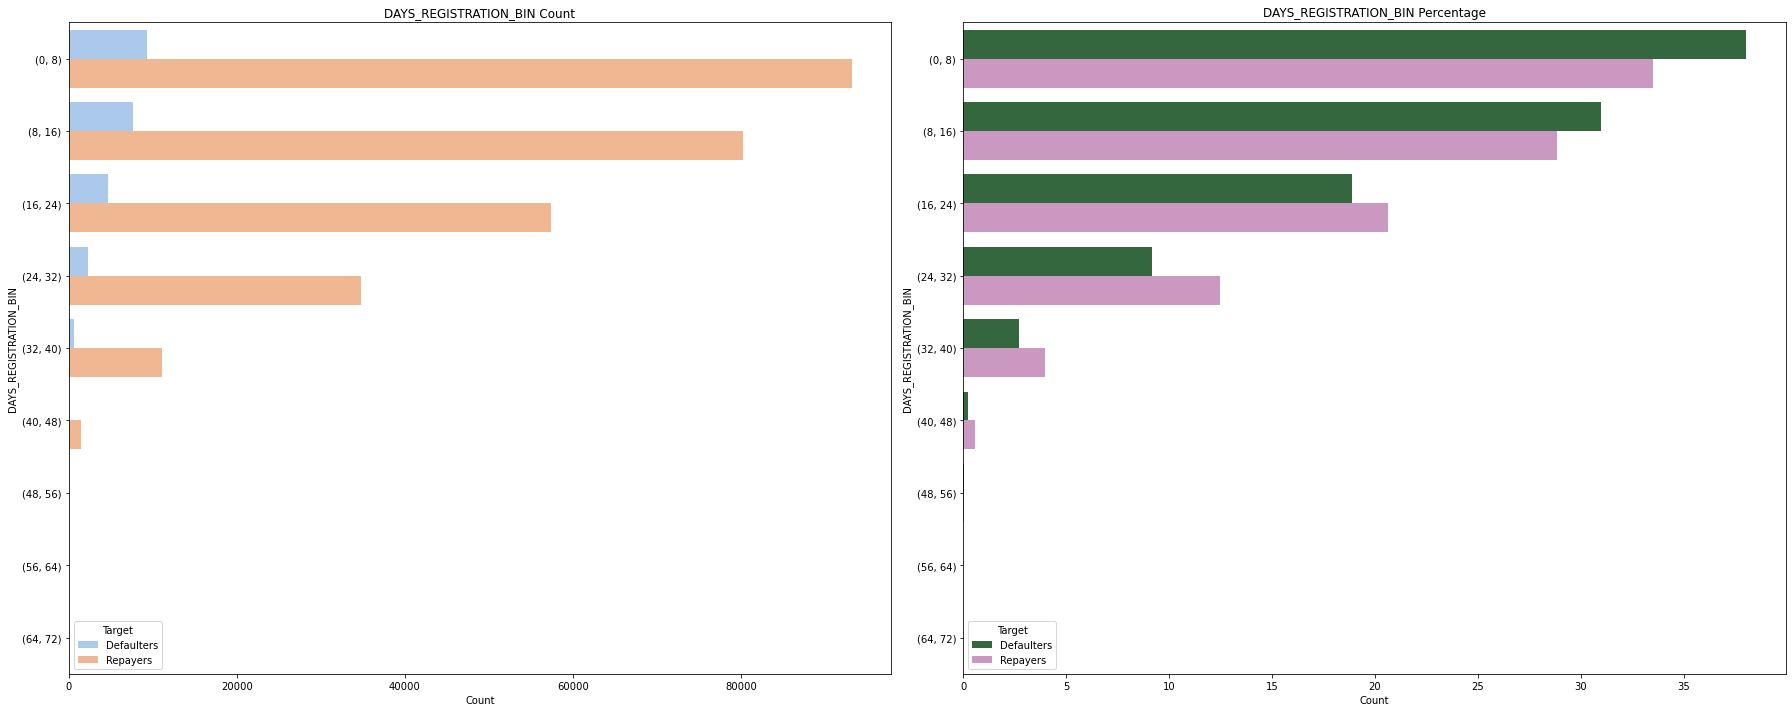

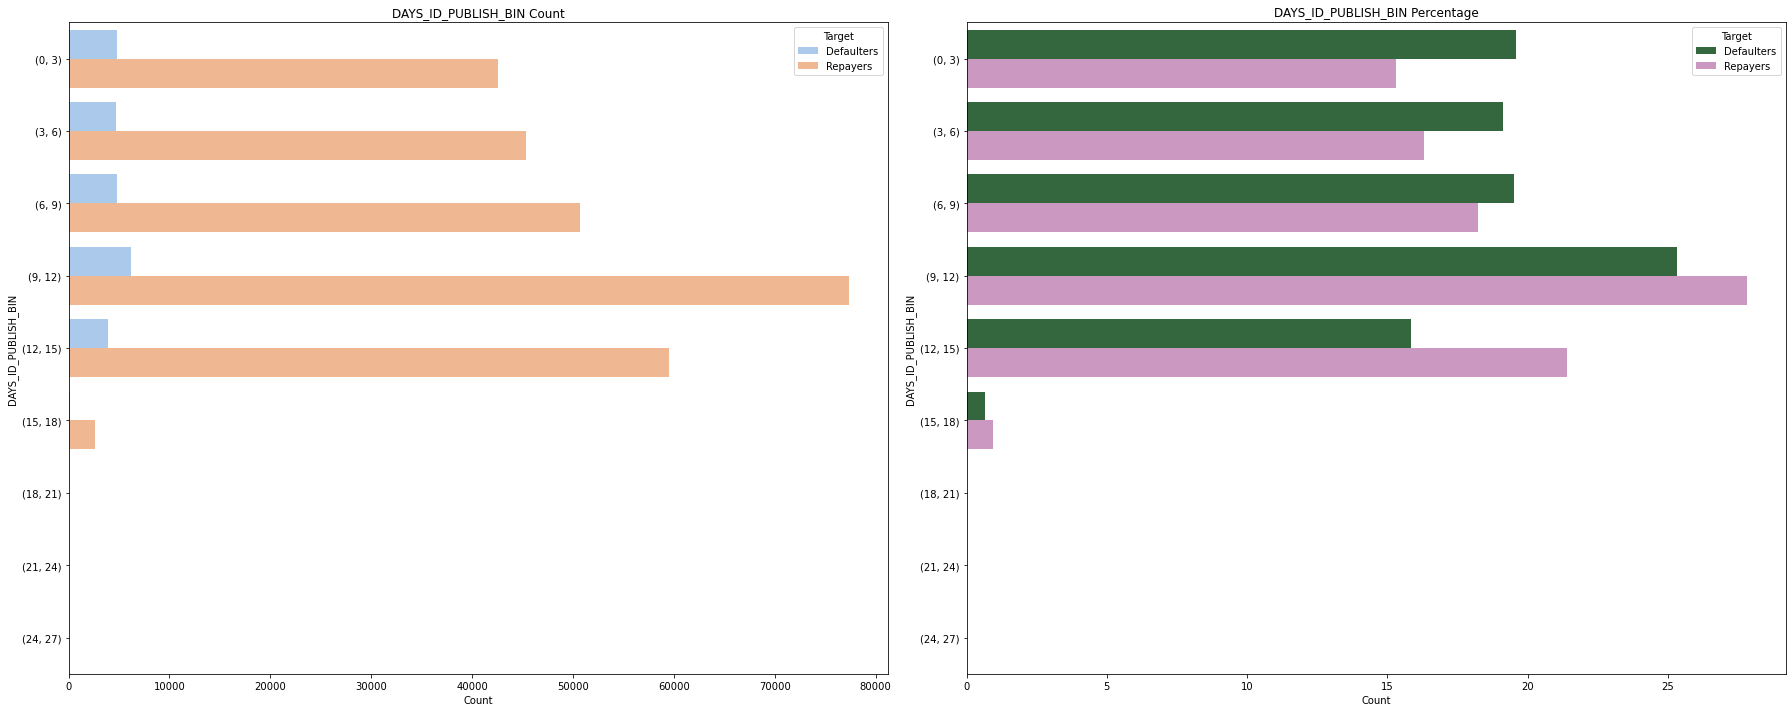

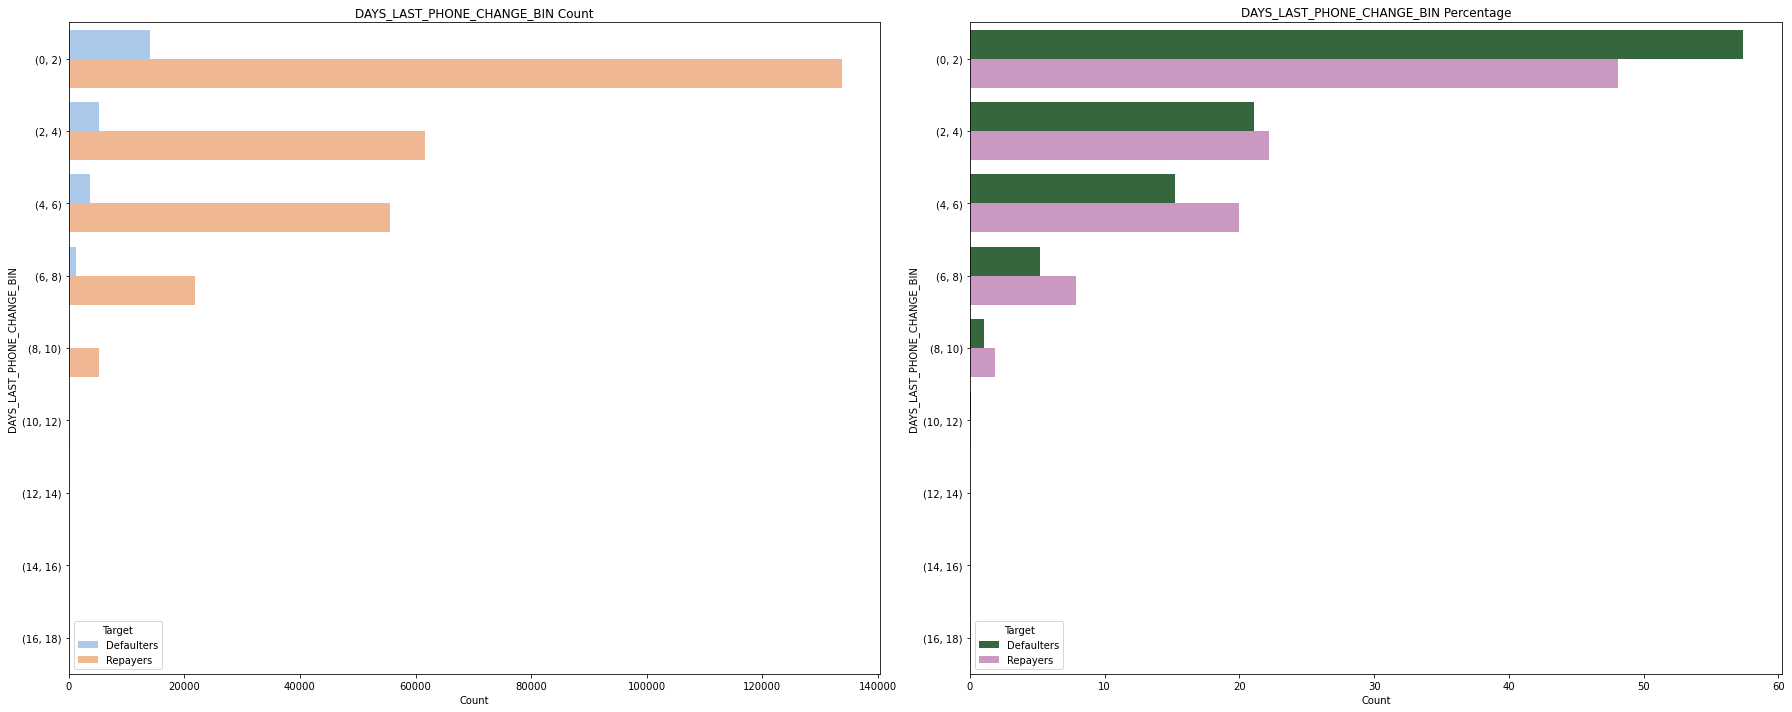

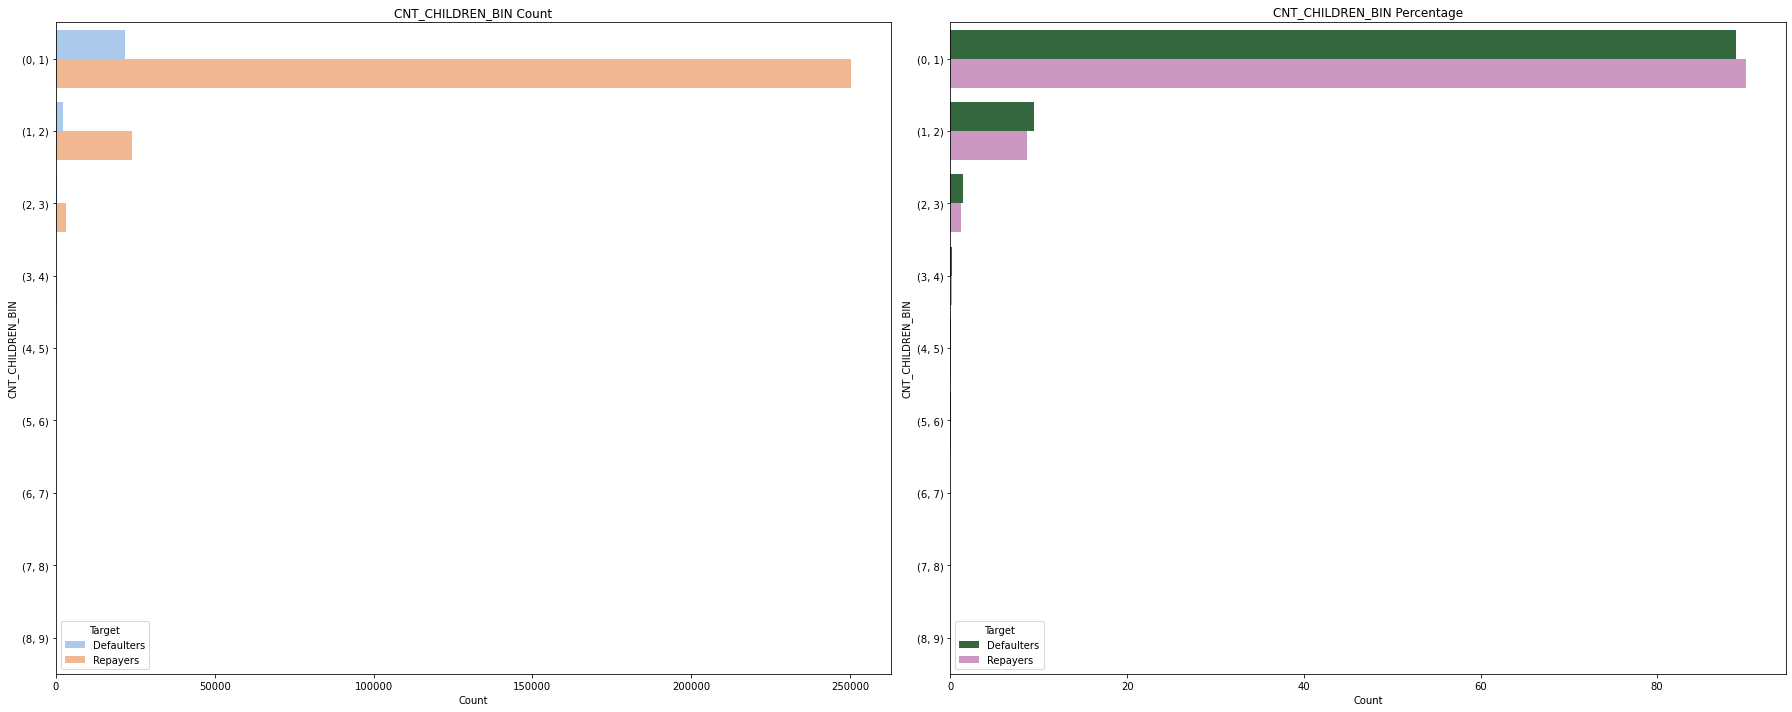

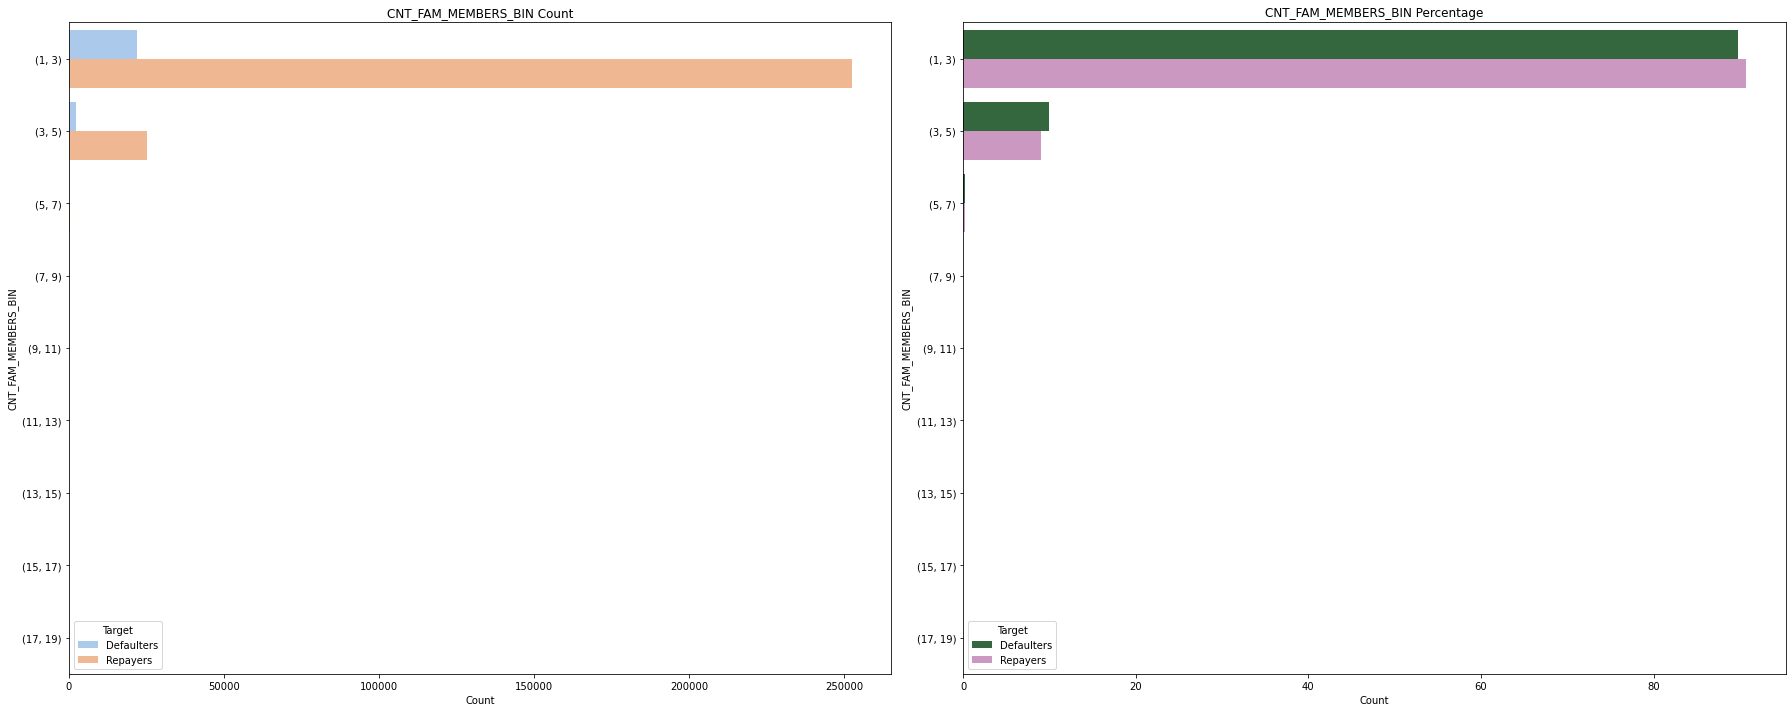

In [106]:
### Analysis of Categorical columns with more than 2 categories 
catval3 = list(app_data.nunique().to_frame("count").query('count>2').index)
catval3 = app_data[catval3].select_dtypes(include= ['object','category'] ).columns
for i in catval3:
    catbar(i,25,10,"pastel","cubehelix")

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Count of clients were "Unaccompanied" during process of loan is higher in population and Repayers class as well, followed by Family. But percentage of unaccompanied clients have higher deafulters than repayers. 
2. Defaulters percentage is higher in Working clients followed by Commercial Associate, also default rate is found to be higher than repayer in Working category, lesser ratio in State Servant.
3. Defaulters percentage is higher in Secondar/secspecial, also defaulters percent is higher than repayers in Secondary/special, lesser in Higher education.
4. Defaulters pecentage is higher in Married than followed by Single/notmarried, lesser in Widow. However defaulter perc is greater than repayers in Single/notmarried and civil mariage.
5. HIgh Default percentage is for House/aprtment followed by with parents, but default perce is higher than repayers observed in with parents.
6. Defaulters percentage is higher in Labourers followed by Sales staff, in both defaulters rate is higher than repayers.
7. Defaulters perc. is higher in BusinessEntity Type3 followed by self emploed, in both defaulters rate is higher than repayers.
8. Defaulters perc is increased in AMT inncome till range of1.8L later tends to decrease ratio/count with higher income salary of client.
9. Lesser than 8.7L defaulter perc is higher than repayers, later count/ratio i slesser than repayers as most people opted lesser credit.
10. Amount annunity between nin 15000-45000 have higher defaulter perc than repayers.
11. Employers with 0--5 experience are found be more defaulters ratio to repayers, also Retiredemployers tends lesser ratio indication of successful repayment. Also defaulters tend to decrease with increase in employers experience 
12. Lesser than age of 40, defaulter rate increased with days birth indicating young people facing higher payment difficulties.
13. Defaulters percentage ratio to repayers increases as CNt_children, Cnt_family increases.
    
    </b></span>

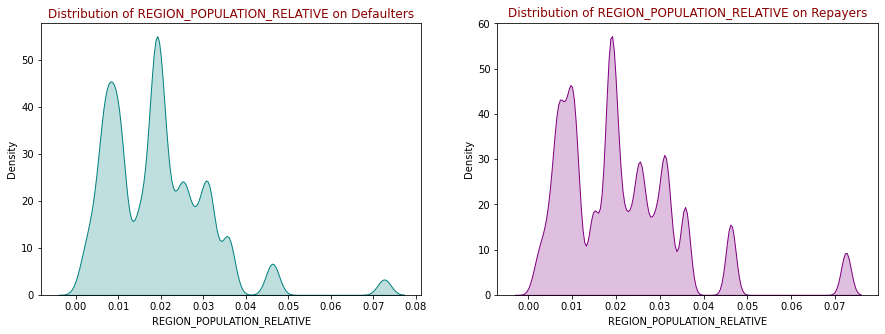

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


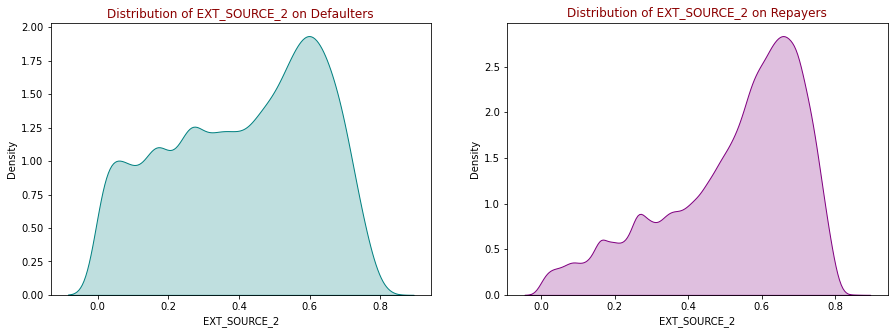

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


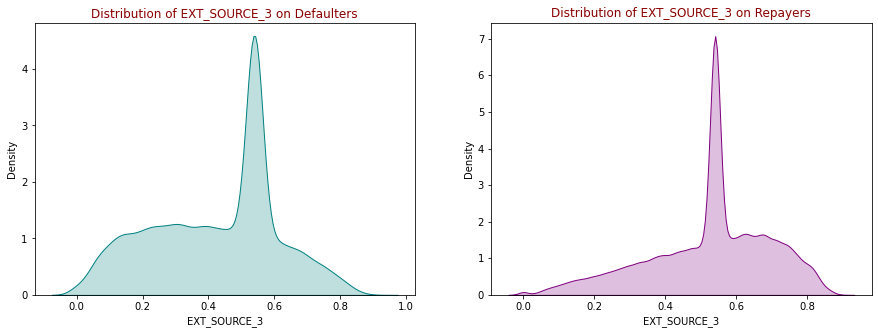

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [107]:
####Numerical Columns

numcols = ['REGION_POPULATION_RELATIVE','EXT_SOURCE_2', 'EXT_SOURCE_3']
#app_data.select_dtypes(exclude  = ['object','category']).columns
for i in numcols:
    fig, ax = plt.subplots (1, 2, figsize=(15, 5))

    sns.kdeplot(data = Defaulters, x=i, fill=True, color ="teal", ax = ax[0])
    ax[0].set_title("Distribution of {} on Defaulters".format(i),color="darkred")

    sns.kdeplot(data = Repayers, x=i, fill=True, color ="purple", ax = ax[1])
    ax[1].set_title("Distribution of {} on Repayers".format(i),color="darkred")
    plt.show()
    print("--"*120)

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Region Population relative has higher distribution later 0.05 for repayers, but at lower region defaulters found to be more.
2. Ext source 2, 3 has high defaulters ratio than repayers for lower observations.
    </b></span>

## <span style='color:darkred '> Subtask 3.2 Bivariate Anlaysis </span>

##### <span style="color : purple"> CODE_GENDER vs NAME_CONTRACT_TYPE </span>

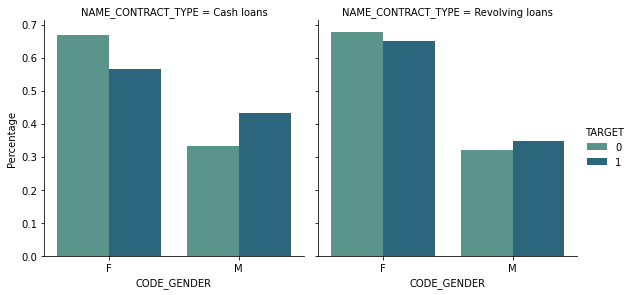

In [108]:
df = app_data[['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["TARGET","NAME_CONTRACT_TYPE"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
sns.factorplot(x = "CODE_GENDER", y = "Percentage", hue = "TARGET", kind = 'bar',col = "NAME_CONTRACT_TYPE", data = df ,size =4,palette = "crest");

##### <span style="color : purple"> CODE_GENDER vs NAME_INCOME_TYPE </span>

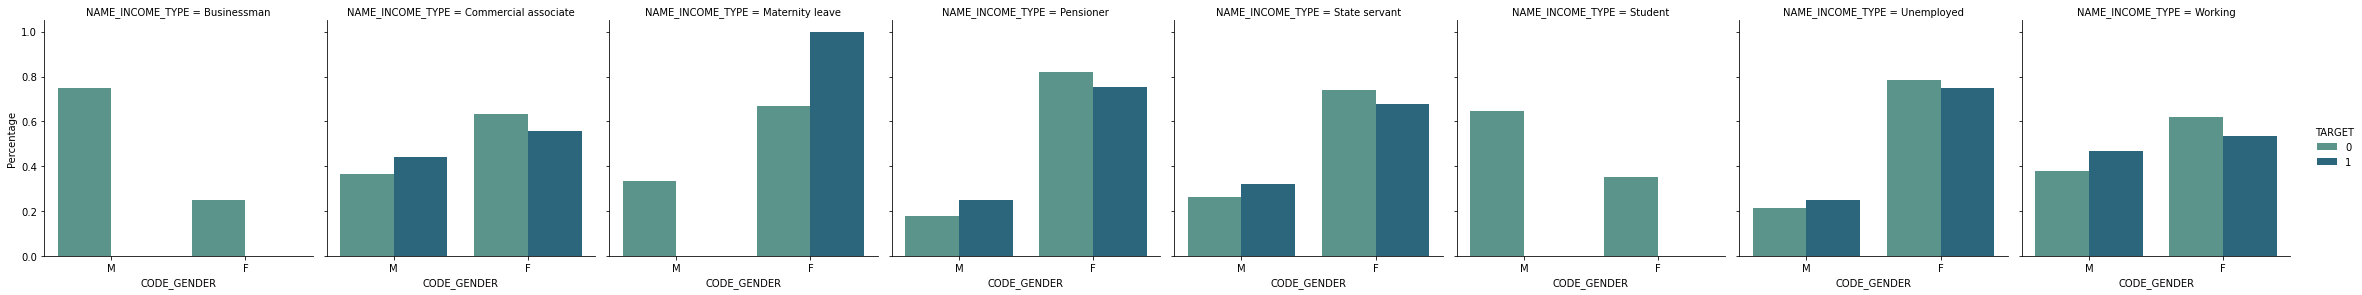

In [109]:
df = app_data[['TARGET','CODE_GENDER','NAME_INCOME_TYPE']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["TARGET","NAME_INCOME_TYPE"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
sns.factorplot(x = "CODE_GENDER", y = "Percentage", hue = "TARGET", kind = 'bar',col = "NAME_INCOME_TYPE", data = df ,size =4,palette = "crest");

##### <span style="color : purple"> DAYS_BIRTH_BIN vs NAME_INCOME_TYPE </span>

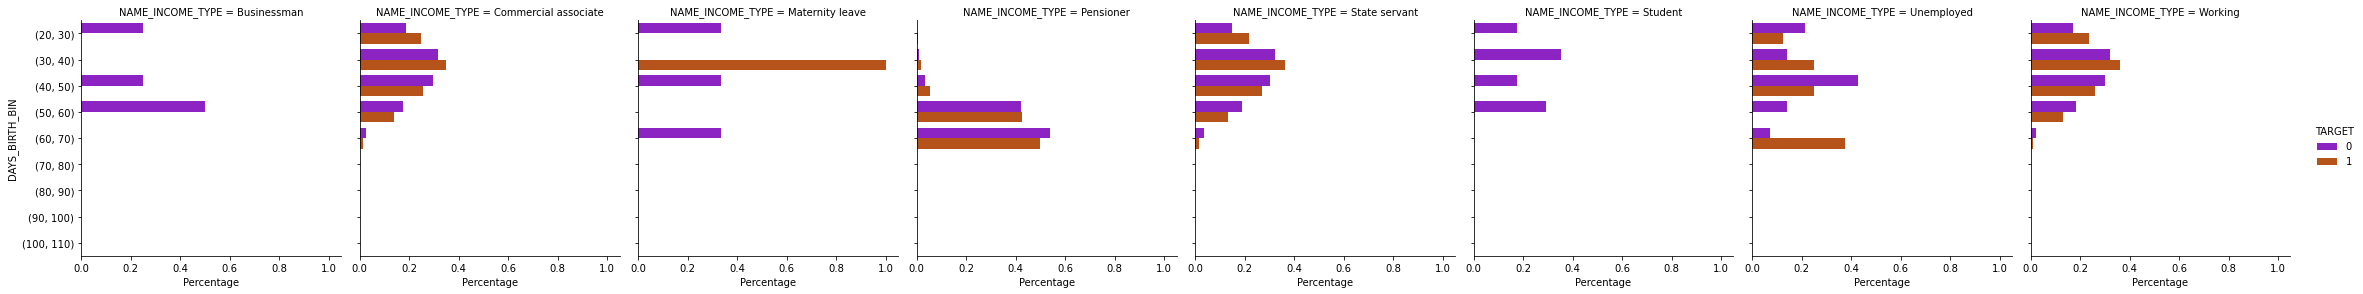

In [111]:

df = app_data[['TARGET','DAYS_BIRTH_BIN','NAME_INCOME_TYPE']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["TARGET","NAME_INCOME_TYPE"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()

sns.factorplot(y = "DAYS_BIRTH_BIN", x = "Percentage", hue = "TARGET",orient ='h', kind = 'bar',col = "NAME_INCOME_TYPE", data = df ,size =4,palette = "gnuplot");

##### <span style="color : purple"> CODE_GENDER vs DAYS_EMPLOYED_BIN </span>

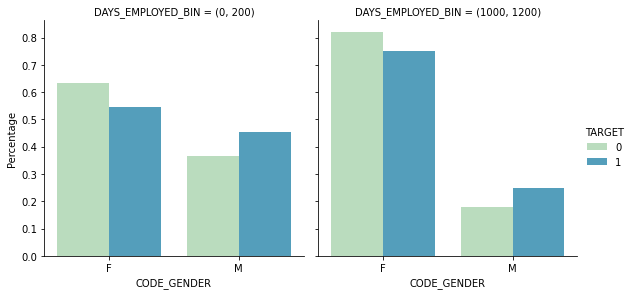

In [112]:
df = app_data[['TARGET','CODE_GENDER','DAYS_EMPLOYED_BIN']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["TARGET","DAYS_EMPLOYED_BIN"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
sns.factorplot(x = "CODE_GENDER", y = "Percentage", hue = "TARGET", kind = 'bar',col = "DAYS_EMPLOYED_BIN", data = df ,size =4
               ,palette = "GnBu");

##### <span style="color : purple"> CODE_GENDER vs NAME_EDUCATION_TYPE </span>

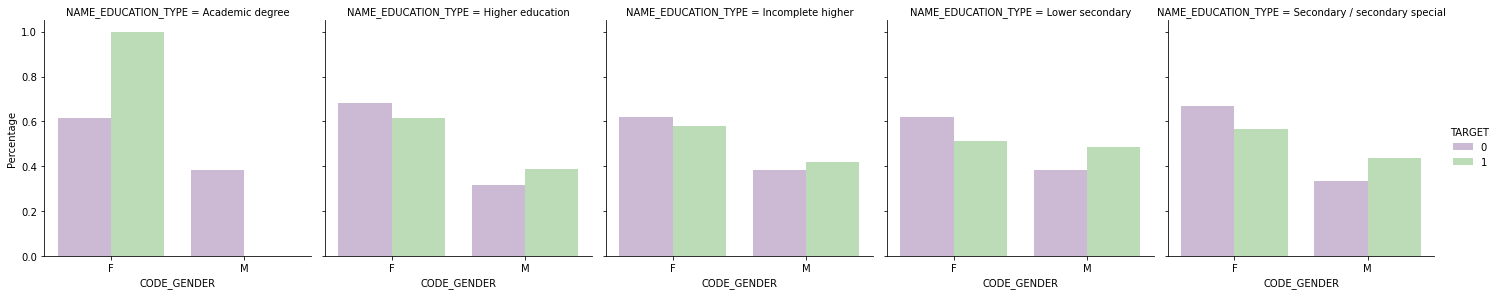

In [113]:

df = app_data[['TARGET','CODE_GENDER','NAME_EDUCATION_TYPE']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["TARGET","NAME_EDUCATION_TYPE"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
sns.factorplot(x = "CODE_GENDER", y = "Percentage", hue = "TARGET", kind = 'bar',col = "NAME_EDUCATION_TYPE", data = df ,size =4
               ,palette = "PRGn")

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Males has higher defaulter percentage than Females on both category of loans.
2. Student and Businessman tend to have significantly less/no defaulters irrespective of gender/age, women on Maternity leave tend to have high defaulters percentage than repayers.
3. Retiredemplyers have no defaulters, indicating the repaying payment without difficulties percentage is more at high aged clients.
4. Irespective of Eduaction type, males tend to have higher deaafulter to repayer ratio, whereas females from Academic degree has this ratio higher than others.
    </b></span>

### <span style='color:darkred '> Multivariate Anlaysis <span>

##### <span style="color : purple"> 'CODE_GENDER' vs 'AMT_CREDIT_BIN' vs'AMT_INCOME_TOTAL_BIN </span>

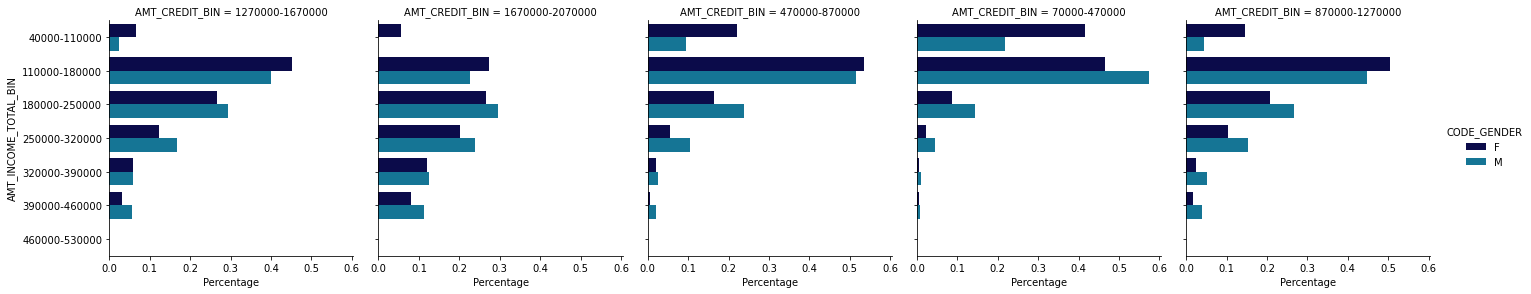

In [114]:
### Multivariate analysis for Repayers Target -1
df =Defaulters[['CODE_GENDER','AMT_CREDIT_BIN','AMT_INCOME_TOTAL_BIN']]
df = df[['CODE_GENDER','AMT_CREDIT_BIN','AMT_INCOME_TOTAL_BIN']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["CODE_GENDER","AMT_CREDIT_BIN"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
df
sns.factorplot(y = "AMT_INCOME_TOTAL_BIN", x = "Percentage", hue = "CODE_GENDER", kind = 'bar',col = "AMT_CREDIT_BIN", data = df ,size =4
               ,palette = "ocean")

##### <span style="color : purple"> CODE_GENDER vs OCCUPATION_TYPE vs AMT_INCOME_TOTAL_BIN </span>

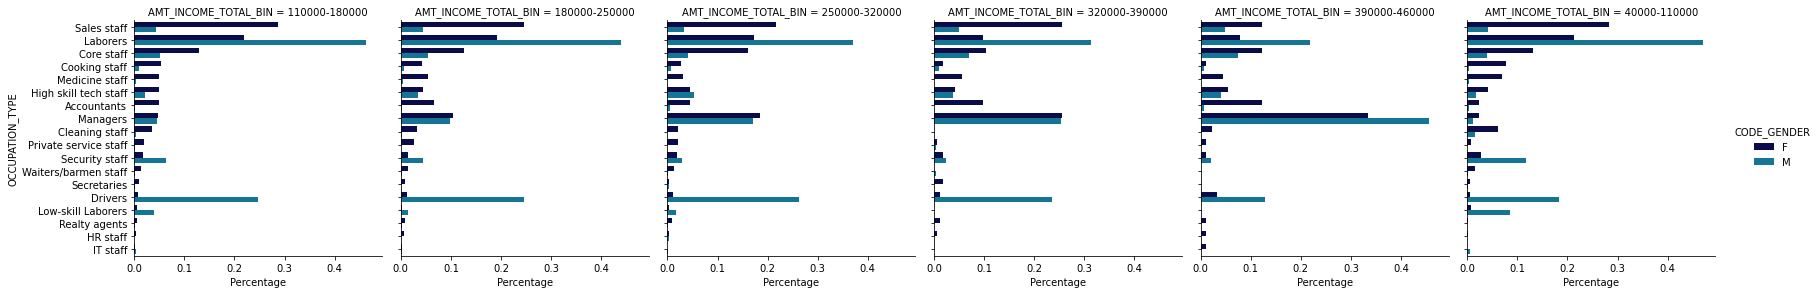

In [115]:
### Multivariate analysis for Repayers Target -1
df =Defaulters.loc[~(Defaulters['OCCUPATION_TYPE'] =="Unknown"), ['CODE_GENDER','OCCUPATION_TYPE','AMT_INCOME_TOTAL_BIN']]
df = df[['CODE_GENDER','OCCUPATION_TYPE','AMT_INCOME_TOTAL_BIN']].value_counts().to_frame('Count')
df = df["Count"].div(df.groupby(["CODE_GENDER","AMT_INCOME_TOTAL_BIN"])["Count"].sum(), axis =0).to_frame('Percentage').reset_index()
df
sns.factorplot(y = "OCCUPATION_TYPE", x = "Percentage", hue = "CODE_GENDER", kind = 'bar',col = "AMT_INCOME_TOTAL_BIN", data = df ,size =4
               ,palette = "ocean")

##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>
    <ol><li> HR and IT staff has less defaulters to repayers ratio irrepsective gender. </li>
    
<li> At lesser income range, laboureers, sales staff and drivers has high deafulters percentage in females followed by males.</li>
    <li> For Lesser Amount income higher loan credit amount of defaulters percentage is higher on both genders  </ol>
    </b></span>

In [116]:
#app_data.columns

l = ['SK_ID_CURR', 'TARGET','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_TOTAL_BIN', 'AMT_CREDIT_BIN', 'AMT_ANNUITY_BIN',
       'AMT_GOODS_PRICE_BIN', 'DAYS_EMPLOYED_BIN', 'DAYS_BIRTH_BIN',
       'DAYS_REGISTRATION_BIN', 'DAYS_ID_PUBLISH_BIN',
       'DAYS_LAST_PHONE_CHANGE_BIN', 'CNT_CHILDREN_BIN',
       'CNT_FAM_MEMBERS_BIN']

##  <span style='color:darkblue '> Task 4: Correlation Analysis</span>

In [117]:
#Dropping less significant columns for analysis in Defaulters

t1 =Defaulters.drop(l,axis = 1)
t1=t1.corr()
t1.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3
FLAG_OWN_CAR,1.000000,0.024352,0.065672,0.193323,0.092175,0.135607,0.095544,0.028566,-0.070810,-0.112476,-0.067841,0.021015,0.108466,-0.009330,-0.006197,0.013378,-0.004672,0.017664,0.019746,-0.009739,0.042318,0.055851,0.042253,-0.024340
FLAG_OWN_REALTY,0.024352,1.000000,0.017964,0.034726,-0.006562,0.006992,-0.016789,0.034324,0.108224,0.056730,0.015087,-0.019265,0.028071,-0.009021,-0.007521,-0.117402,-0.053563,-0.042653,-0.019109,-0.068431,-0.066949,-0.032696,-0.000226,0.021691
CNT_CHILDREN,0.065672,0.017964,1.000000,-0.005131,-0.001879,0.030578,-0.008282,-0.031632,-0.262023,-0.194413,-0.149676,0.031497,0.884046,0.041929,0.044794,-0.024909,-0.023544,-0.019416,-0.010717,0.000183,0.046532,0.053559,-0.013072,-0.024670
AMT_INCOME_TOTAL,0.193323,0.034726,-0.005131,1.000000,0.343799,0.422990,0.345185,0.113576,-0.002455,-0.118053,-0.037484,0.002427,0.003448,-0.165130,-0.180878,0.079353,0.082589,0.160002,0.146597,0.006675,0.017013,0.023009,0.137938,-0.087538
AMT_CREDIT,0.092175,-0.006562,-0.001879,0.343799,1.000000,0.754677,0.982140,0.068275,0.136386,0.004938,0.026788,0.050631,0.052839,-0.056337,-0.068020,0.028548,0.014487,0.030486,0.032706,-0.032815,-0.037680,-0.016861,0.116870,0.050554


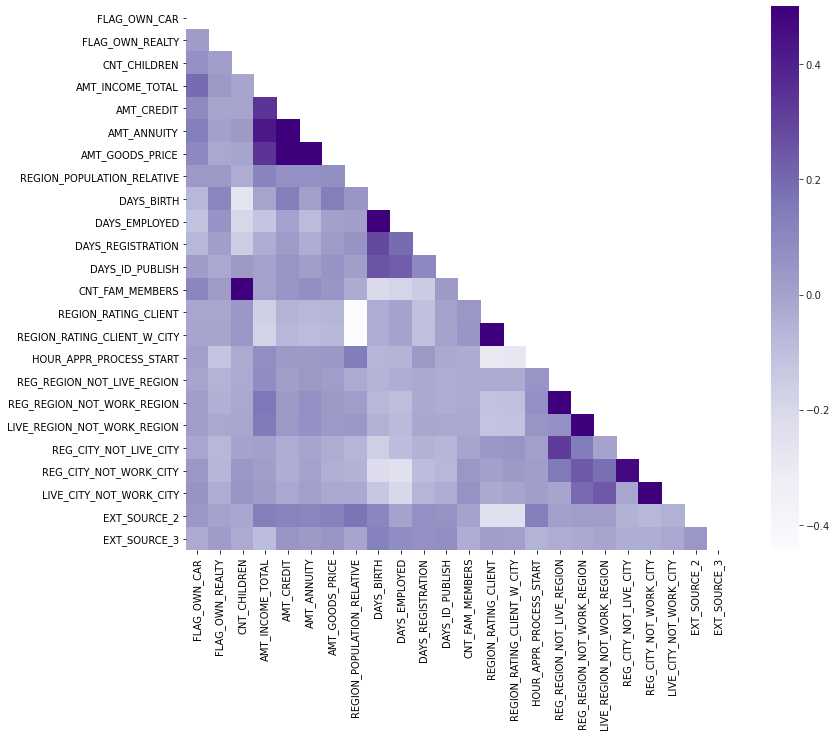

In [118]:
# Correlation of rest of the Numerical columns in app_data dataframe

masklower = np.zeros_like(t1) #Masking values to get lower triangle
masklower[np.triu_indices_from(masklower)] = True
f, axes = plt.subplots(figsize =(15,10))
with sns.axes_style("white"):
    axes = sns.heatmap(t1,mask= masklower,vmax=0.5, square =True , cmap ="Purples")

In [119]:
t1cor = t1.where(np.triu(np.ones(t1.shape), k=1).astype(np.bool))
t1cor = t1cor.unstack().reset_index()

t1cor.columns = ['Columnname1', 'Columnname2', 'CorrelationValue']
t1cor.dropna(subset = ['CorrelationValue'], inplace = True)
t1cor = t1cor.sort_values('CorrelationValue', ascending = False).reset_index(drop = True)
t1cor['Correlationabs'] = abs(t1cor['CorrelationValue'])
t1cor = t1cor.sort_values('Correlationabs', ascending = False)
##### Top 10 Correlation columns frame

t1cor[:10]

,Columnname1,Columnname2,CorrelationValue,Correlationabs
0,AMT_GOODS_PRICE,AMT_CREDIT,0.982140,0.982140
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.957086,0.957086
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.884046,0.884046
3,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.848410,0.848410
4,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778005,0.778005
5,AMT_ANNUITY,AMT_CREDIT,0.754677,0.754677
6,AMT_GOODS_PRICE,AMT_ANNUITY,0.753701,0.753701
7,DAYS_EMPLOYED,DAYS_BIRTH,0.583648,0.583648
8,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497785,0.497785
9,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472059,0.472059


##### <span style="color : purple"> <b> Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. AMT_GOODS_PRICE and AMt_Credit are highly correlated, means higher the AMT_GOODS_PRICE people are appliying higher credit  of loans. 
2. Family Numbers and children positively correlated this is behavioured observation. Also Days employed and days birth also positive correlated feature.
3. We could observe AMT_GOODS_PRICE	& AMT_ANNUITY , AMT_Credit & AMT_ANNUITY highly correlated indicating all 3 has a direct relationship. 
    
</b></span>

In [120]:
##### Understanding Negative correlation top 10 in Ascending order of correlation value
negcorr = t1.where(np.triu(np.ones(t1.shape), k=1).astype(np.bool))
negcorr = negcorr.unstack().reset_index()

negcorr.columns = ['Columnname1', 'Columnname2', 'CorrelationValue']
negcorr.dropna(subset = ['CorrelationValue'], inplace = True)
negcorr = negcorr.sort_values('CorrelationValue', ascending = True).reset_index(drop = True)


negcorr.head(10)

,Columnname1,Columnname2,CorrelationValue
0,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.443551
1,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.439808
2,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,-0.293494
3,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,-0.275551
4,DAYS_BIRTH,CNT_CHILDREN,-0.262023
5,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.247663
6,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,-0.246587
7,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,-0.245913
8,REG_CITY_NOT_WORK_CITY,DAYS_BIRTH,-0.217090
9,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.205094


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

1. Region Population relative is negatively correlated with region rating columns, higher region rating lower the population relative.
2. Similarly Ext Source columns are as well negatively correlated with Region rating columns.
</b></span>

##  <span style='color:darkblue '> Task 5: Data Analysis On Previous application </span>

<span style='color:darkred '> Reading previous application data rom previos_data.csv file </span>

In [127]:
#Read the data in pandas dataframe.
prev_loan_data = pd.read_csv('previous_application.csv')
prev_loan_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#prev_loan_data.shape
printCyan("Shape of the DataFrame : {}" .format(prev_loan_data.shape))

  Shape of the DataFrame : (1670214, 37)


In [129]:
# Print the information about the attributes of data.
prev_loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [130]:
#explore the dataset
print(prev_loan_data.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [131]:
#checking for unique values in each columns
prev_loan_data.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [133]:
# Print the data types information.
prev_loan_data.dtypes


SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

## <span style='color:darkred '>Data quality check </span>


In [152]:
#checking the column with missing values
prev_loan_data.isnull().sum()


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [153]:
#getting the percentage of missig values
prev_loan_data.isnull().sum()/len(prev_loan_data)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [154]:
#handing missing values as we know there are many unnecessary coloumns
prev_loan_data = prev_loan_data.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_loan_data = prev_loan_data.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_loan_data.isnull().sum()/len(prev_loan_data)*100



SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [155]:
#checking the list of columns with 20 percent missing values
print(prev_loan_data.columns[(prev_loan_data.isnull().sum() * 100 / prev_loan_data.shape[0]) > 20])


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [156]:
#Dropping all >20 null value columns
dropcol=prev_loan_data.columns[(prev_loan_data.isnull().sum() * 100 / prev_loan_data.shape[0]) > 20]
prev_loan_data.drop(axis=1, columns=dropcol, inplace=True)
prev_loan_data.shape


(1246320, 26)

In [157]:
#Checking the columns with null values more then 0
prev_loan_data.columns[prev_loan_data.isnull().any()]

Index([], dtype='object')

In [158]:
#Statistical Analysis of the data
prev_loan_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06
mean,1.913834e+06,2.783561e+05,1.605938e+04,2.325942e+05,2.492727e+05,2.326240e+05,1.258250e+01,9.978914e-01,-1.021855e+03,4.056201e+02,1.671954e+01
std,5.340824e+05,1.027801e+05,1.492967e+04,3.186545e+05,3.465843e+05,3.186729e+05,3.326113e+00,4.587116e-02,7.864511e+02,8.246103e+03,1.448712e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.446936e+06,1.893740e+05,6.327990e+03,5.220000e+04,5.157450e+04,5.220000e+04,1.000000e+01,1.000000e+00,-1.534000e+03,-1.000000e+00,6.000000e+00
50%,1.910148e+06,2.787420e+05,1.125000e+04,1.125000e+05,1.161675e+05,1.125000e+05,1.200000e+01,1.000000e+00,-7.660000e+02,2.700000e+01,1.200000e+01
75%,2.377944e+06,3.673812e+05,2.061227e+04,2.475000e+05,2.700000e+05,2.475000e+05,1.500000e+01,1.000000e+00,-3.850000e+02,1.460000e+02,2.400000e+01
max,2.845379e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [159]:
#remove the unneccesary columns
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','CNT_PAYMENT','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_loan_data.drop(axis=1, columns=dropcol, inplace=True)
prev_loan_data.shape

(1246320, 15)

Consumer loans     691432
Cash loans         461563
Revolving loans     93325
Name: NAME_CONTRACT_TYPE, dtype: int64


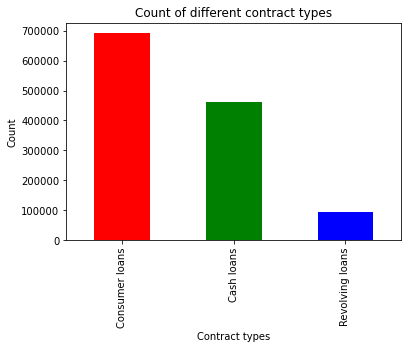

In [160]:
# Single coloumn analysis
#make bar plot of the single coloumn of all the categorical data
#give different color to different values and ligent the values
prev_loan_data['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
#print the value counts of each column
print(prev_loan_data['NAME_CONTRACT_TYPE'].value_counts())
#give the title to the plot
plt.title('Count of different contract types')
#giev the x-axis label
plt.xlabel('Contract types')
#give the y-axis label
plt.ylabel('Count')
#show the plot
plt.show()



Y    1242858
N       3462
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


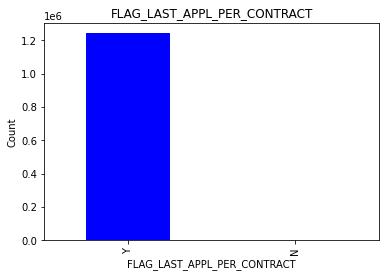

In [161]:
#give different color to different values and ligent the values
prev_loan_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().plot(kind='bar', color=['blue', 'yellow'])
#print the value counts of each column
print(prev_loan_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts())
#give the title to the plot
plt.title('FLAG_LAST_APPL_PER_CONTRACT')
#giev the x-axis label
plt.xlabel('FLAG_LAST_APPL_PER_CONTRACT')
#give the y-axis label
plt.ylabel('Count')
#show the plot
plt.show()


Approved        993938
Refused         240969
Canceled         10503
Unused offer       910
Name: NAME_CONTRACT_STATUS, dtype: int64


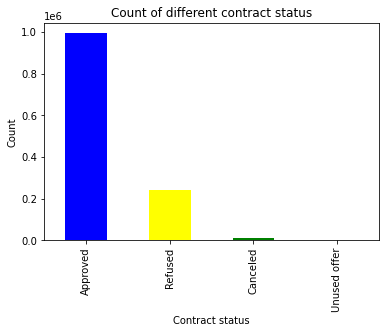

In [162]:
#bar plot of the single coloumn of all the categorical data
prev_loan_data['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar', color=['blue', 'yellow','green'])
#print the value counts of each column
print(prev_loan_data['NAME_CONTRACT_STATUS'].value_counts())
#give the title to the plot
plt.title('Count of different contract status')
#giev the x-axis label
plt.xlabel('Contract status')
#give the y-axis label
plt.ylabel('Count')
#show the plot
plt.show()


Repeater     843841
New          294548
Refreshed    107030
XNA             901
Name: NAME_CLIENT_TYPE, dtype: int64


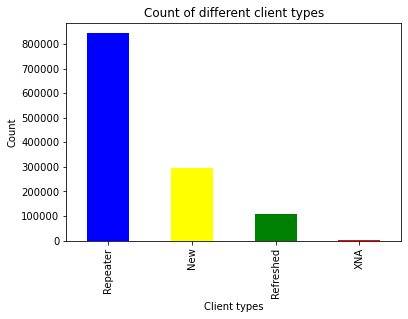

In [163]:
#bar plot of the single coloumn of all the categorical data
prev_loan_data['NAME_CLIENT_TYPE'].value_counts().plot(kind='bar', color=['blue', 'yellow','green','red'])
#print the value counts of each column
print(prev_loan_data['NAME_CLIENT_TYPE'].value_counts())
#give the title to the plot
plt.title('Count of different client types')
#giev the x-axis label
plt.xlabel('Client types')
#give the y-axis label
plt.ylabel('Count')
#show the plot
plt.show()


POS      691007
Cash     461563
Cards     93325
Cars        425
Name: NAME_PORTFOLIO, dtype: int64


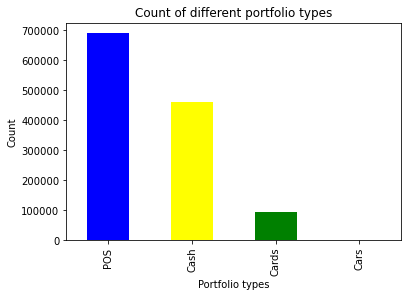

In [164]:
#bar chart for Name_poftfolio
prev_loan_data['NAME_PORTFOLIO'].value_counts().plot(kind='bar', color=['blue', 'yellow','green','red'])
#print the value counts of each column
print(prev_loan_data['NAME_PORTFOLIO'].value_counts())
#give the title to the plot
plt.title('Count of different portfolio types')
#giev the x-axis label
plt.xlabel('Portfolio types')
#give the y-axis label
plt.ylabel('Count')
#show the plot
plt.show()

##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen">  <b>

#1 consumer loan is the highest count in type of contract

#2 Status of loan is motly approved

#3 Client type contain the XNA value which is not a client type

#4 Portfolio type is baised to the POS
    </span>

###  <span style='color:darkred '> Bi-variate analysis</span>


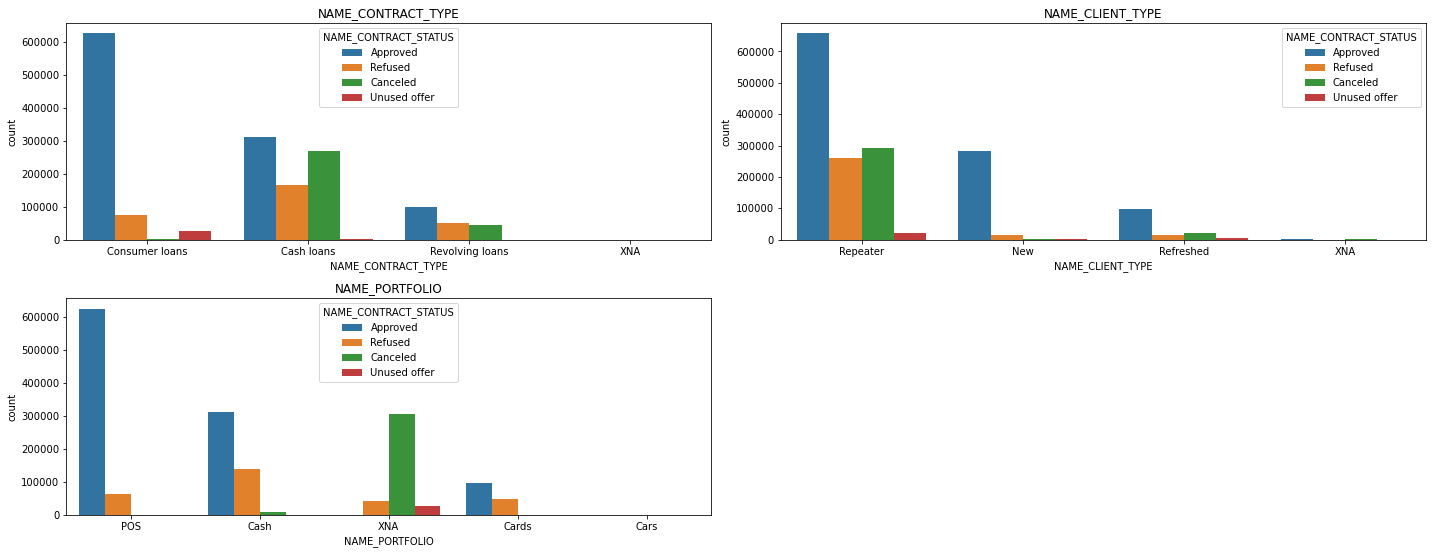

In [135]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_loan_data, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen"> <b> 

#1. In approved category, consumer loan has largest no of applicants. 
    
#2. There seem to be no cancelled loans in cash loan category than consumer loan.
    
#3. More cash loans have been refused than consumer loans.
    
#4. The bank has more repeaters in all approved, refused, unused, cancelled categories
    
#5. POS transactions seem to be consumer loans and similar to point 2 - more cash laons have been refused than POS.
    </span>

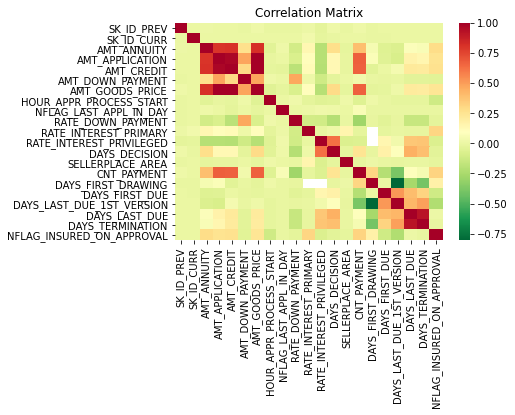

In [137]:
#correlations analysis
#get the correlation matrix
corr = prev_loan_data.corr()
#plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn_r')
#give the title to the plot
plt.title('Correlation Matrix')
#show the plot
plt.show()


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen"> <b> 

1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate
    
2. Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high
    </b>
    </span>

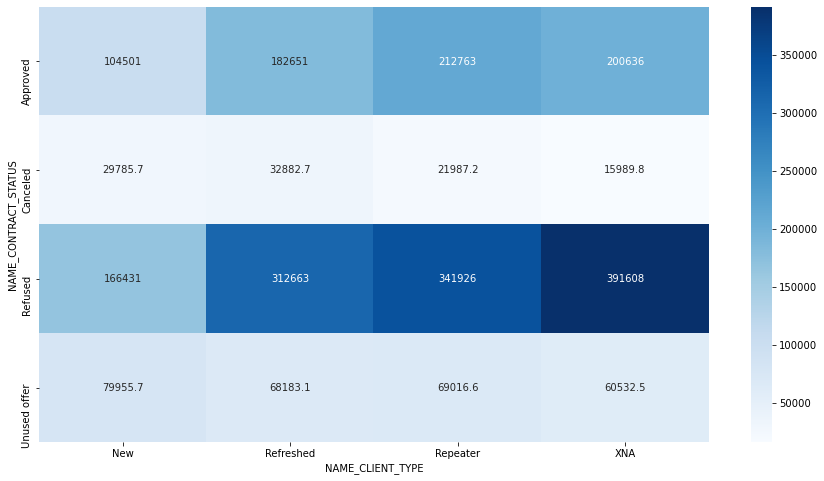

In [139]:
#Multivariate analysis
#get the correlation matrix
# Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=prev_loan_data, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen"> <b> 

#1. The unused offer application amount is low

#2. The cancelled application volume is huge. Firm  may be refusing these possibly as the Debt liability ratio of the consumer must be going high due to the high amount and thus credit default risk.

#3. Repeater's application quantity is rise than the Undecayed clients. This may symbolise that the firm has more favourable policies/rates of earnings etc for repeat candidates
    </span>

In [141]:
#Analysing the data after merge with both current and previous loan data files
#checking if any duplicate values in SK_ID_PREV
duplicate = prev_loan_data[prev_loan_data.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(1331357, 37)

In [142]:
df=pd.merge( app_data,prev_loan_data, how='left', on="SK_ID_CURR")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AMT_ANNUITY_BIN,AMT_GOODS_PRICE_BIN,DAYS_EMPLOYED_BIN,DAYS_BIRTH_BIN,DAYS_REGISTRATION_BIN,DAYS_ID_PUBLISH_BIN,DAYS_LAST_PHONE_CHANGE_BIN,CNT_CHILDREN_BIN,CNT_FAM_MEMBERS_BIN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,180000-250000,70000-470000,15000-25000,60000-460000,"(0, 200)","(20, 30)","(8, 16)","(3, 6)","(2, 4)","(0, 1)","(1, 3)",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,0.54,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,250000-320000,1270000-1670000,35000-45000,860000-1260000,"(0, 200)","(40, 50)","(0, 8)","(0, 3)","(2, 4)","(0, 1)","(1, 3)",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,0.54,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,250000-320000,1270000-1670000,35000-45000,860000-1260000,"(0, 200)","(40, 

In [143]:
df.shape

(1408753, 118)

##### <span style="color : darkred"> <b>Analysis Steps: </b> </span>  
<br>
<span style="color : purple"> <b> 
<ol>
    <li>Checking the distribution of the data </li>
    <li> Checking the skewness of the data </li>
    <li>Checking the correlation of the data </li>
    <li>Checking the missing values </li>
    <li> Checking the outliers</li>
    
   </ol>   </b>  </span>

In [145]:
#checking the name contarct status
df['NAME_CONTRACT_STATUS'].value_counts()
contract_status=df['NAME_CONTRACT_STATUS'].unique()

Target 0 and 1 for :  Approved
0    0.923745
1    0.076255
Name: TARGET, dtype: float64


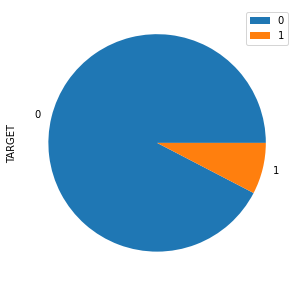

Target 0 and 1 for :  Canceled
0    0.907821
1    0.092179
Name: TARGET, dtype: float64


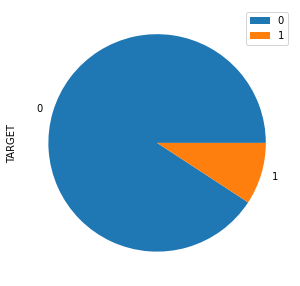

Target 0 and 1 for :  Refused
0    0.879381
1    0.120619
Name: TARGET, dtype: float64


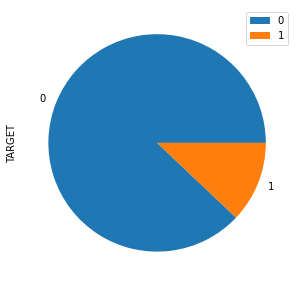

No handles with labels found to put in legend.


Target 0 and 1 for :  nan
Series([], Name: TARGET, dtype: float64)


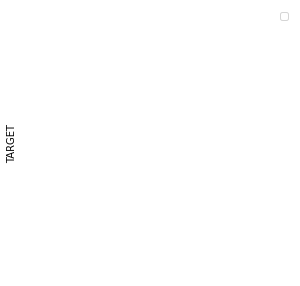

Target 0 and 1 for :  Unused offer
0    0.917077
1    0.082923
Name: TARGET, dtype: float64


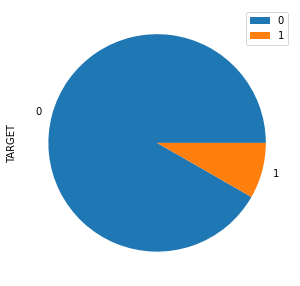

In [146]:
#Analysing the data by plotting the histogram to target variable name contract status
for i in contract_status:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()


    
    


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen"> <b> 

#1. 7.5% of Approved loans have defaults
 

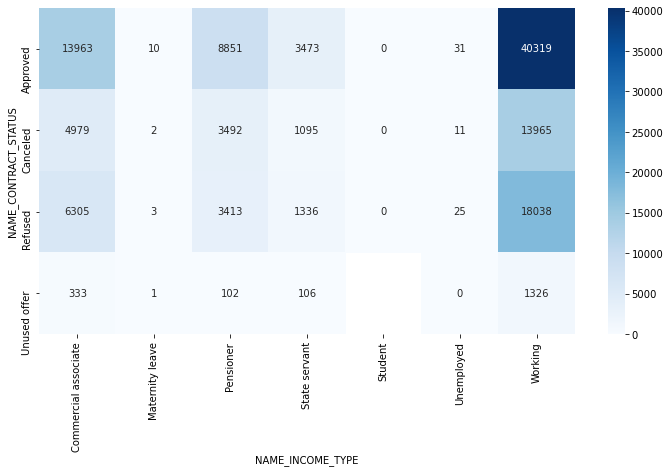

In [148]:
#make the heatmap on Name contract status with aggregating over the Name income type
res=pd.pivot_table(data=df, index="NAME_CONTRACT_STATUS",columns='NAME_INCOME_TYPE',values='TARGET',aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()


##### <span style="color : purple"> <b>Observations: </b> </span>  
<br>
<span style="color : darkgreen"> <b> 

#1. Considering Target 1 is the default, more crucial on the above pattern explicates association to default consumers.

#2. An employed candidate with Approved status possess defaulted in the greatest figures

#3. Previous applications with Refused, Cancelled, Unused loans with a default status is the looking area. This indicates that the financial corporation had Refused/cancelled the previous application, but has passed the current and is risking on these investments.

#4, Candidates of working-class were REFUSED previous and forthwith become defaulted is the main problem in system .
</span>

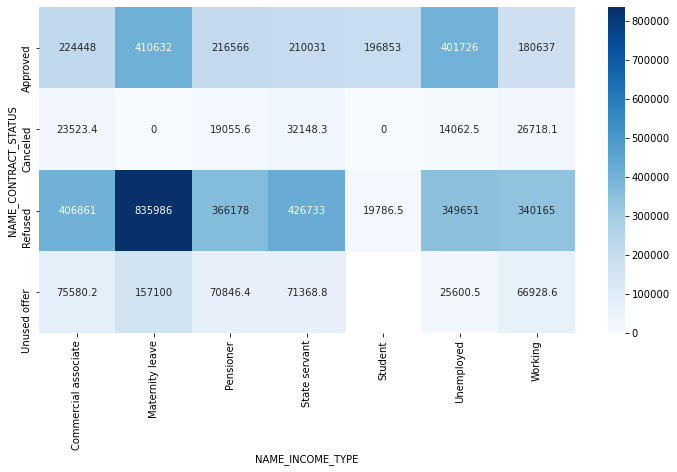

In [150]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

### <b> <span style='color:darkblue '> Summary </span></b>
<br>
<span style="color : darkcyan">  <b>

Low-Risk Loan Factors:

Students were found to be noble repayers, considering numerous factors of employment succeeding their education.
Similarly, businessmen, State servants, Pensioners are unusual repayers with none or fewer complications of the mortgage.
Consumers with long employ experience and age observed to be a tremendous percentage of repayers with no challenges.


High-Risk Loan Factors:

Personalities staying with parents, on maternity leave are found to be big defaulters.
People with income amount trifling than amount credit holds high defaulters.
Consumers with less experience and age were found to have a large defaulters rate.
Professionals with jobs as Labourers, Sales staff and Drivers with more economical income conditions conduce to hold large debtors, opposed to people of noble income such as IT, HR staff etc.
    </b>
</span>